# 1. Importing Libraies

In [178]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import dill
from collections import Counter
# from paretochart import pareto as p
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro, anderson
from scipy.stats import boxcox, yeojohnson
from outliers import smirnov_grubbs as grubbs_test
# from sklearn.linear_model import LinearRegression
# import statsmodels.formula.api as statsmodel
# import statsmodels.api as statsmodel
from prettytable import PrettyTable
import qnorm
from tqdm import tqdm, tqdm_notebook
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
from print_dict import pd as p_dict

# 2. Common Functions

In [2]:
def dill_dump_session(dump_sess_name, dump_folder_name='dill_db'):
    dill.dump_session('D:/BITS/Semester 4/dev/save/{folder_name}/{sess_name}.db'.format(folder_name=dump_folder_name, sess_name=dump_sess_name))

In [3]:
def dill_load_session(dump_load_name, load_folder_name='dill_db'):
    dill.load_session('D:/BITS/Semester 4/dev/save/{folder_name}/{sess_name}.db'.format(folder_name=load_folder_name, sess_name=dump_load_name))

In [9]:
dill_dump_session('2.Common functions')

In [10]:
dill_load_session('2.Common functions')

# 3. Importing dataset

In [11]:
original_df = pd.read_csv('../data/train.csv')

In [5]:
original_df

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                     3.8                     5.3                   3   
1                     8.0                     8.6                   6   
2                     1.1                     8.8                   8   
3                     3.7                     5.2                   3   
4                     4.1                     5.0                   3   
...                   ...                     ...                 ...   
25486                 4.0                     5.7                   2   
25487                 3.7                     4.8                   2   
25488                 3.7                     5.3                   2   
25489                 1.1                     9.6                   6   
25490                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       167                   3              0   
1                       272                   6              0   
2                       282                   4              0   
3                       169                   3              0   
4                       163                   3              0   
...                     ...                 ...            ...   
25486                   151                   3              0   
25487                   160                   3              0   
25488                   143                   3              0   
25489                   280                   4              0   
25490                   158                   3              0   

       promotion_last_5years Department  salary  Attrition  
0                          0      sales     low          1  
1                          0      sales  medium          1  
2                          0      sales  medium          1  
3                          0      sales     low          1  
4                          0      sales     low          1  
...                      ...        ...     ...        ...  
25486                      0    support     low          1  
25487                      0    support     low          1  
25488                      0    support     low          1  
25489                      0    support     low          1  
25490                      0    support     low          1  

[25491 rows x 10 columns]

In [13]:
dill_dump_session('3.Importing dataset')

In [6]:
print(original_df.shape)
original_df.head(10)

(25491, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3              0   
1                   272                   6              0   
2                   282                   4              0   
3                   169                   3              0   
4                   163                   3              0   
5                   257                   4              0   
6                   269                   5              0   
7                   234                   5              0   
8                   152                   3              0   
9                   315                   4              0   

   promotion_last_5years Department  salary  Attrition  
0                      0      sales     low          1  
1                      0      sales  medium          1  
2                      0      sales  medium          1  
3                      0      sales     low          1  
4                      0      sales     low          1  
5                      0      sales     low          1  
6                      0      sales     low          1  
7                      0      sales     low          1  
8                      0      sales     low          1  
9                      0      sales     low          1

# 4. Data Pre-Processing

In [4]:
dill_load_session('3.Importing dataset')

In [14]:
original_dpp_df = original_df
original_dpp_df

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                     3.8                     5.3                   3   
1                     8.0                     8.6                   6   
2                     1.1                     8.8                   8   
3                     3.7                     5.2                   3   
4                     4.1                     5.0                   3   
...                   ...                     ...                 ...   
25486                 4.0                     5.7                   2   
25487                 3.7                     4.8                   2   
25488                 3.7                     5.3                   2   
25489                 1.1                     9.6                   6   
25490                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       167                   3              0   
1                       272                   6              0   
2                       282                   4              0   
3                       169                   3              0   
4                       163                   3              0   
...                     ...                 ...            ...   
25486                   151                   3              0   
25487                   160                   3              0   
25488                   143                   3              0   
25489                   280                   4              0   
25490                   158                   3              0   

       promotion_last_5years Department  salary  Attrition  
0                          0      sales     low          1  
1                          0      sales  medium          1  
2                          0      sales  medium          1  
3                          0      sales     low          1  
4                          0      sales     low          1  
...                      ...        ...     ...        ...  
25486                      0    support     low          1  
25487                      0    support     low          1  
25488                      0    support     low          1  
25489                      0    support     low          1  
25490                      0    support     low          1  

[25491 rows x 10 columns]

## 4.1 Check for missing values

In [15]:
original_dpp_df.isnull()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                   False                   False               False   
1                   False                   False               False   
2                   False                   False               False   
3                   False                   False               False   
4                   False                   False               False   
...                   ...                     ...                 ...   
25486               False                   False               False   
25487               False                   False               False   
25488               False                   False               False   
25489               False                   False               False   
25490               False                   False               False   

       average_montly_hours  time_spend_company  Work_accident  \
0                     False               False          False   
1                     False               False          False   
2                     False               False          False   
3                     False               False          False   
4                     False               False          False   
...                     ...                 ...            ...   
25486                 False               False          False   
25487                 False               False          False   
25488                 False               False          False   
25489                 False               False          False   
25490                 False               False          False   

       promotion_last_5years  Department  salary  Attrition  
0                      False       False   False      False  
1                      False       False   False      False  
2                      False       False   False      False  
3                      False       False   False      False  
4                      False       False   False      False  
...                      ...         ...     ...        ...  
25486                  False       False   False      False  
25487                  False       False   False      False  
25488                  False       False   False      False  
25489                  False       False   False      False  
25490                  False       False   False      False  

[25491 rows x 10 columns]

In [42]:
# being double sure, that no missing values are present..
original_dpp_df.isnull().values.any()

False

In [43]:
# being double sure, that no missing values are present..
original_dpp_df.isnull().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
Department                0
salary                    0
Attrition                 0
dtype: int64

## 4.2 Check for outliers

In [20]:
original_dpp_df

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                     3.8                     5.3                   3   
1                     8.0                     8.6                   6   
2                     1.1                     8.8                   8   
3                     3.7                     5.2                   3   
4                     4.1                     5.0                   3   
...                   ...                     ...                 ...   
25486                 4.0                     5.7                   2   
25487                 3.7                     4.8                   2   
25488                 3.7                     5.3                   2   
25489                 1.1                     9.6                   6   
25490                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       167                   3              0   
1                       272                   6              0   
2                       282                   4              0   
3                       169                   3              0   
4                       163                   3              0   
...                     ...                 ...            ...   
25486                   151                   3              0   
25487                   160                   3              0   
25488                   143                   3              0   
25489                   280                   4              0   
25490                   158                   3              0   

       promotion_last_5years Department  salary  Attrition  
0                          0      sales     low          1  
1                          0      sales  medium          1  
2                          0      sales  medium          1  
3                          0      sales     low          1  
4                          0      sales     low          1  
...                      ...        ...     ...        ...  
25486                      0    support     low          1  
25487                      0    support     low          1  
25488                      0    support     low          1  
25489                      0    support     low          1  
25490                      0    support     low          1  

[25491 rows x 10 columns]

### 4.2.1 Outliers present in satisfaction_level

In [21]:
z_score_satisfaction_level = stats.zscore(original_dpp_df['satisfaction_level'])

In [30]:
z_score_satisfaction_level

array([-0.94024626,  0.7490331 , -2.02621156, ..., -0.98046719,
       -2.02621156, -0.98046719])

In [41]:
sum(z_score_satisfaction_level>3)

0

In [42]:
sum(z_score_satisfaction_level<-3)

0

### 4.2.2 Outliers present in last_evaluation_rating

In [49]:
z_score_last_evaluation_rating = stats.zscore(original_dpp_df['last_evaluation_rating'])

In [50]:
z_score_last_evaluation_rating

array([-1.09183923,  0.83717252,  0.95408232, ..., -1.09183923,
        1.42172153, -1.15029413])

In [52]:
z_score_last_evaluation_rating_round = [round(num, 2) for num in z_score_last_evaluation_rating]

In [55]:
count_of_z_score_last_evaluation_rating_round = {i:z_score_last_evaluation_rating_round.count(i) for i in np.unique(z_score_last_evaluation_rating_round)}
count_of_z_score_last_evaluation_rating_round

{-2.09: 39,
 -2.03: 91,
 -1.97: 83,
 -1.91: 89,
 -1.85: 100,
 -1.79: 97,
 -1.73: 97,
 -1.68: 81,
 -1.62: 71,
 -1.56: 194,
 -1.5: 353,
 -1.44: 292,
 -1.38: 508,
 -1.33: 552,
 -1.27: 593,
 -1.21: 596,
 -1.15: 516,
 -1.09: 549,
 -1.03: 575,
 -0.97: 608,
 -0.92: 541,
 -0.86: 558,
 -0.8: 378,
 -0.74: 450,
 -0.68: 377,
 -0.62: 400,
 -0.57: 395,
 -0.51: 407,
 -0.45: 398,
 -0.39: 337,
 -0.33: 384,
 -0.27: 407,
 -0.22: 366,
 -0.16: 327,
 -0.1: 381,
 -0.04: 342,
 0.02: 365,
 0.08: 383,
 0.14: 447,
 0.19: 399,
 0.25: 370,
 0.31: 422,
 0.37: 366,
 0.43: 397,
 0.49: 427,
 0.54: 430,
 0.6: 407,
 0.66: 461,
 0.72: 510,
 0.78: 547,
 0.84: 462,
 0.9: 566,
 0.95: 397,
 1.01: 504,
 1.07: 536,
 1.13: 485,
 1.19: 466,
 1.25: 463,
 1.3: 452,
 1.36: 433,
 1.42: 426,
 1.48: 460,
 1.54: 447,
 1.6: 457,
 1.66: 474}

In [59]:
print(sum(z_score_last_evaluation_rating>3))
print(sum(z_score_last_evaluation_rating<-3))

0
0


### 4.2.3 Outliers present in projects_worked_on

In [60]:
z_score_projects_worked_on = stats.zscore(original_dpp_df['projects_worked_on'])

In [61]:
z_score_projects_worked_on

array([-0.91766488,  1.34784991,  2.8581931 , ..., -1.67283647,
        1.34784991, -1.67283647])

In [62]:
print(sum(z_score_projects_worked_on>3))
print(sum(z_score_projects_worked_on<-3))

0
0


### 4.2.4 Outliers present in avg_monthly_hours

In [65]:
z_score_avg_monthly_hours = stats.zscore(original_dpp_df['average_montly_hours'])

In [66]:
z_score_avg_monthly_hours

array([-0.76296079,  1.32942577,  1.52870068, ..., -1.24122057,
        1.4888457 , -0.94230821])

In [67]:
print(sum(z_score_avg_monthly_hours>3))
print(sum(z_score_avg_monthly_hours<-3))

0
0


### 4.2.5 Outliers present in time_spend_company

In [68]:
z_score_time_spend_company = stats.zscore(original_dpp_df['time_spend_company'])

In [69]:
z_score_time_spend_company

array([-0.34105817,  1.71699764,  0.34496043, ..., -0.34105817,
        0.34496043, -0.34105817])

In [72]:
print(sum(z_score_time_spend_company>3))
print(sum(z_score_time_spend_company<-3))

625
0


In [86]:
original_dpp_df.shape

(25491, 10)

In [6]:
z_score_time_spend_company_index = list(np.where(z_score_time_spend_company > 3)[0])
z_score_time_spend_company_index[0:10]

[7748, 7749, 7750, 7751, 7752, 7798, 7799, 7824, 7825, 7826]

In [108]:
original_dpp_time_spend_company_outliers_removed_df = original_dpp_df.drop(z_score_time_spend_company_index)

In [109]:
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

### 4.2.6 Outliers present in work_accident

In [110]:
z_score_work_accident = stats.zscore(original_dpp_time_spend_company_outliers_removed_df['Work_accident'])

In [56]:
z_score_work_accident

array([-0.40936816, -0.40936816, -0.40936816, ..., -0.40936816,
       -0.40936816, -0.40936816])

In [57]:
print(sum(z_score_work_accident>3))
print(sum(z_score_work_accident<-3))

0
0


### 4.2.7 Outliers present in promotion_last_5_years

In [143]:
original_dpp_time_spend_company_outliers_removed_df.reset_index(drop=True, inplace=True)
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

In [144]:
z_score_promotion_last_5_years = stats.zscore(original_dpp_time_spend_company_outliers_removed_df['promotion_last_5years'])

In [145]:
z_score_promotion_last_5_years

array([-0.14310317, -0.14310317, -0.14310317, ..., -0.14310317,
       -0.14310317, -0.14310317])

In [146]:
print(sum(z_score_promotion_last_5_years>3))
print(sum(z_score_promotion_last_5_years<-3))

499
0


In [147]:
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

In [7]:
z_score_promotion_last_5_years_index = list(np.where(z_score_promotion_last_5_years > 3)[0])
z_score_promotion_last_5_years_index[0:10]

[198, 390, 507, 682, 3173, 3174, 3175, 3176, 3177, 3178]

In [149]:
len(z_score_promotion_last_5_years_index)

499

In [150]:
original_dpp_promotion_last_5_years_outliers_removed_df = original_dpp_time_spend_company_outliers_removed_df.drop(z_score_promotion_last_5_years_index)

In [151]:
original_dpp_promotion_last_5_years_outliers_removed_df.shape

(24367, 10)

In [152]:
original_dpp_all_outliers_removed_df = original_dpp_promotion_last_5_years_outliers_removed_df
original_dpp_all_outliers_removed_df.shape

(24367, 10)

## 4.3 Check for noise

In [153]:
original_dpp_all_outliers_removed_df['satisfaction_level'].dtypes

dtype('float64')

In [154]:
original_dpp_all_outliers_removed_df['last_evaluation_rating'].dtypes

dtype('float64')

In [155]:
original_dpp_all_outliers_removed_df['projects_worked_on'].dtypes

dtype('int64')

In [156]:
original_dpp_all_outliers_removed_df['average_montly_hours'].dtypes

dtype('int64')

In [157]:
original_dpp_all_outliers_removed_df['time_spend_company'].dtypes

dtype('int64')

In [158]:
original_dpp_all_outliers_removed_df['Work_accident'].dtypes

dtype('int64')

In [159]:
original_dpp_all_outliers_removed_df['promotion_last_5years'].dtypes

dtype('int64')

In [55]:
original_dpp_all_outliers_removed_df.to_csv('../save/csv/4.2_4.3_original_dpp_all_outliers_and_noise_removed_df.csv', index=False)

## 4.4 Create dummy variables

In [59]:
print(original_dpp_all_outliers_removed_df.shape)
original_dpp_all_outliers_removed_df.head(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3          False   
1                   272                   6          False   
2                   282                   4          False   
3                   169                   3          False   
4                   163                   3          False   
5                   257                   4          False   
6                   269                   5          False   
7                   234                   5          False   
8                   152                   3          False   
9                   315                   4          False   

   promotion_last_5years Department  salary  Attrition  
0                  False      sales     low          1  
1                  False      sales  medium          1  
2                  False      sales  medium          1  
3                  False      sales     low          1  
4                  False      sales     low          1  
5                  False      sales     low          1  
6                  False      sales     low          1  
7                  False      sales     low          1  
8                  False      sales     low          1  
9                  False      sales     low          1

In [186]:
# promotion_last_5years = original_dpp_all_outliers_removed_df['promotion_last_5years'].replace({0:False, 1:True})
# original_dpp_all_outliers_removed_df['promotion_last_5years'] = promotion_last_5years
# original_dpp_all_outliers_removed_df.head(10)

In [187]:
# work_accident = original_dpp_all_outliers_removed_df['Work_accident'].replace({0:False, 1:True})
# original_dpp_all_outliers_removed_df['Work_accident'] = work_accident
# original_dpp_all_outliers_removed_df.head(10)

In [44]:
print(original_dpp_all_outliers_removed_df.shape)

(24367, 10)


In [184]:
original_dpp_dummy_variables_df = pd.get_dummies(original_dpp_all_outliers_removed_df, columns=['Work_accident', 'promotion_last_5years', 'Department', 'salary'])

In [45]:
print(original_dpp_dummy_variables_df.shape)
original_dpp_dummy_variables_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [190]:
dill_dump_session('4.4_Create_dummy_variables')

In [54]:
original_dpp_dummy_variables_df.to_csv('../save/csv/4.4_original_dpp_dummy_variables_df.csv', index=False)

In [6]:
original_dpp_all_outliers_removed_df.columns

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'Attrition'],
      dtype='object')


In [7]:
original_dpp_dummy_variables_df.columns

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Attrition',
       'Work_accident_False', 'Work_accident_True',
       'promotion_last_5years_False', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

## 4.5 Normalizing the dataset

In [28]:
dill_load_session('4.4_Create_dummy_variables')

In [30]:
original_dpp_normalized_df = original_dpp_dummy_variables_df.copy()

In [31]:
original_dpp_normalized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [32]:
original_dpp_normalized_df.dtypes

satisfaction_level             float64
last_evaluation_rating         float64
projects_worked_on               int64
average_montly_hours             int64
time_spend_company               int64
Attrition                        int64
Work_accident_False              uint8
Work_accident_True               uint8
promotion_last_5years_False      uint8
Department_IT                    uint8
Department_RandD                 uint8
Department_accounting            uint8
Department_hr                    uint8
Department_management            uint8
Department_marketing             uint8
Department_product_mng           uint8
Department_sales                 uint8
Department_support               uint8
Department_technical             uint8
salary_high                      uint8
salary_low                       uint8
salary_medium                    uint8
dtype: object

In [33]:
normalize_these_columns = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [34]:
min_max_scaler = MinMaxScaler()
original_dpp_normalized_df[normalize_these_columns] = min_max_scaler.fit_transform(original_dpp_normalized_df[normalize_these_columns])

In [35]:
# original_dpp_normalized_df[normalize_these_columns] = original_dpp_normalized_df[normalize_these_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [36]:
original_dpp_normalized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [53]:
original_dpp_normalized_df.to_csv('../save/csv/4.5_original_dpp_normalized_df.csv', index=False)

## 4.6 Standardizing the dataset

In [39]:
original_dpp_standardized_df = original_dpp_dummy_variables_df.copy()

In [40]:
original_dpp_standardized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [41]:
standardize_these_columns = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [42]:
std_scaler = StandardScaler()

In [43]:
original_dpp_standardized_df[standardize_these_columns] = std_scaler.fit_transform(original_dpp_standardized_df[standardize_these_columns])

In [44]:
original_dpp_standardized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [52]:
original_dpp_standardized_df.to_csv('../save/csv/4.6_original_dpp_standardized_df.csv', index=False)

In [58]:
dill_dump_session('4.6_all_data_preprocessing_completed')

# 5. EDA & Feature Correlation Plots

In [62]:
# dill_load_session('4.6_all_data_preprocessing_completed')

In [91]:
eda_df = original_dpp_dummy_variables_df.copy()

## 5.1 Statistical Overview

In [68]:
eda_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [69]:
eda_df.describe()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
count         24367.00000            24367.000000        24367.000000   
mean              6.11367                7.168051            4.218944   
std               2.49921                1.713454            1.333112   
min               0.90000                3.600000            2.000000   
25%               4.40000                5.600000            3.000000   
50%               6.40000                7.200000            4.000000   
75%               8.20000                8.700000            5.000000   
max              10.00000               10.000000            8.000000   

       average_montly_hours  time_spend_company     Attrition  \
count          24367.000000        24367.000000  24367.000000   
mean             205.416137            3.347109      0.244757   
std               50.273714            1.142088      0.429952   
min               96.000000            2.000000      0.000000   
25%              160.000000            3.000000      0.000000   
50%              204.000000            3.000000      0.000000   
75%              250.000000            4.000000      0.000000   
max              320.000000            7.000000      1.000000   

       Work_accident_False  Work_accident_True  promotion_last_5years_False  \
count         24367.000000        24367.000000                      24367.0   
mean              0.858579            0.141421                          1.0   
std               0.348462            0.348462                          0.0   
min               0.000000            0.000000                          1.0   
25%               1.000000            0.000000                          1.0   
50%               1.000000            0.000000                          1.0   
75%               1.000000            0.000000                          1.0   
max               1.000000            1.000000                          1.0   

       Department_IT  Department_RandD  Department_accounting  Department_hr  \
count   24367.000000      24367.000000           24367.000000   24367.000000   
mean        0.084582          0.052284               0.051627       0.050642   
std         0.278264          0.222603               0.221278       0.219271   
min         0.000000          0.000000               0.000000       0.000000   
25%         0.000000          0.000000               0.000000       0.000000   
50%         0.000000          0.000000               0.000000       0.000000   
75%         0.000000          0.000000               0.000000       0.000000   
max         1.000000          1.000000               1.000000       1.000000   

       Department_management  Department_marketing  Department_product_mng  \
count           24367.000000          24367.000000            24367.000000   
mean                0.033898              0.054869                0.060984   
std                 0.180971              0.227730                0.239306   
min                 0.000000              0.000000                0.000000   
25%                 0.000000              0.000000                0.000000   
50%                 0.000000              0.000000                0.000000   
75%                 0.000000              0.000000                0.000000   
max                 1.000000              1.000000                1.000000   

       Department_sales  Department_support  Department_technical  \
count      24367.000000        24367.000000          24367.000000   
mean           0.272171            0.152050              0.186892   
std            0.445087            0.359077              0.389833   
min            0.000000            0.000000              0.000000   
25%            0.000000            0.000000              0.000000   
50%            0.000000            0.000000              0.000000   
75%            1.000000            0.000000              0.000000   
max            1.000000            1.000000              1.000000   

     

In [70]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24367 entries, 0 to 24865
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   satisfaction_level           24367 non-null  float64
 1   last_evaluation_rating       24367 non-null  float64
 2   projects_worked_on           24367 non-null  int64  
 3   average_montly_hours         24367 non-null  int64  
 4   time_spend_company           24367 non-null  int64  
 5   Attrition                    24367 non-null  int64  
 6   Work_accident_False          24367 non-null  uint8  
 7   Work_accident_True           24367 non-null  uint8  
 8   promotion_last_5years_False  24367 non-null  uint8  
 9   Department_IT                24367 non-null  uint8  
 10  Department_RandD             24367 non-null  uint8  
 11  Department_accounting        24367 non-null  uint8  
 12  Department_hr                24367 non-null  uint8  
 13  Department_manag

## 5.2 Correlation Analysis - Checking For Multi-Collinearity

<AxesSubplot:>

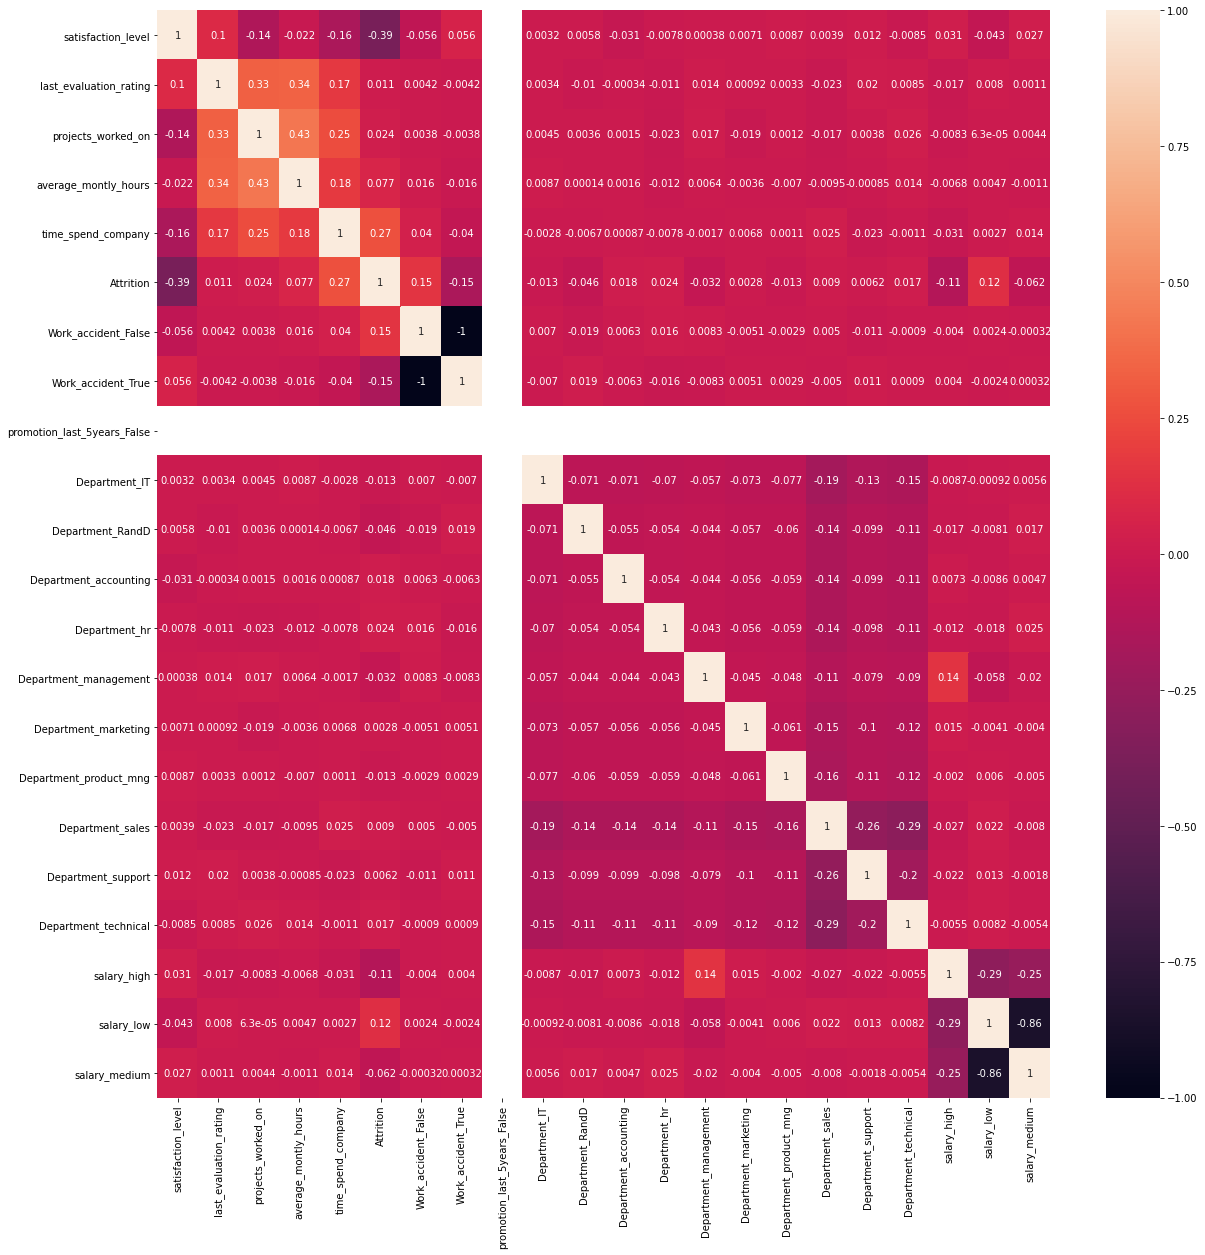

In [94]:
plt.subplots(figsize=(20, 20))
sns.heatmap(eda_df.corr(), annot = True)

In [73]:
eda_df.corr()

satisfaction_level  last_evaluation_rating  \
satisfaction_level                     1.000000                0.101427   
last_evaluation_rating                 0.101427                1.000000   
projects_worked_on                    -0.137219                0.332876   
average_montly_hours                  -0.021733                0.340919   
time_spend_company                    -0.155074                0.168917   
Attrition                             -0.388589                0.010660   
Work_accident_False                   -0.055815                0.004207   
Work_accident_True                     0.055815               -0.004207   
promotion_last_5years_False                 NaN                     NaN   
Department_IT                          0.003230                0.003395   
Department_RandD                       0.005834               -0.010351   
Department_accounting                 -0.030917               -0.000336   
Department_hr                         -0.007801               -0.010888   
Department_management                  0.000382                0.014015   
Department_marketing                   0.007083                0.000917   
Department_product_mng                 0.008735                0.003291   
Department_sales                       0.003861               -0.022694   
Department_support                     0.011582                0.019683   
Department_technical                  -0.008452                0.008522   
salary_high                            0.031023               -0.017002   
salary_low                            -0.042851                0.008002   
salary_medium                          0.026557                0.001102   

                             projects_worked_on  average_montly_hours  \
satisfaction_level                    -0.137219             -0.021733   
last_evaluation_rating                 0.332876              0.340919   
projects_worked_on                     1.000000              0.429424   
average_montly_hours                   0.429424              1.000000   
time_spend_company                     0.253738              0.177453   
Attrition                              0.024074              0.076901   
Work_accident_False                    0.003753              0.015572   
Work_accident_True                    -0.003753             -0.015572   
promotion_last_5years_False                 NaN                   NaN   
Department_IT                          0.004509              0.008749   
Department_RandD                       0.003605              0.000142   
Department_accounting                  0.001470              0.001644   
Department_hr                         -0.023191             -0.011502   
Department_management                  0.016527              0.006407   
Department_marketing                  -0.019430             -0.003618   
Department_product_mng                 0.001241             -0.007001   
Department_sales                      -0.017018             -0.009491   
Department_support                     0.003756             -0.000852   
Department_technical                   0.025818              0.014269   
salary_high                           -0.008333             -0.006829   
salary_low                             0.000063              0.004713   
salary_medium                          0.004442             -0.001073   

                             time_spend_company  Attrition  \
satisfaction_level                    -0.155074  -0.388589   
last_evaluation_rating                 0.168917   0.010660   
projects_worked_on                     0.253738   0.024074   
average_montly_hours                   0.177453   0.076901   
time_spend_company                     1.000000   0.268358   
Attrition                              0.268358   1.000000   
Work_accident_False                    0.039923   0.154342   
Work_accident_True                    -0.039923  -0.154342   
promotion_last_5years_False                 NaN        NaN   
Dep

<AxesSubplot:>

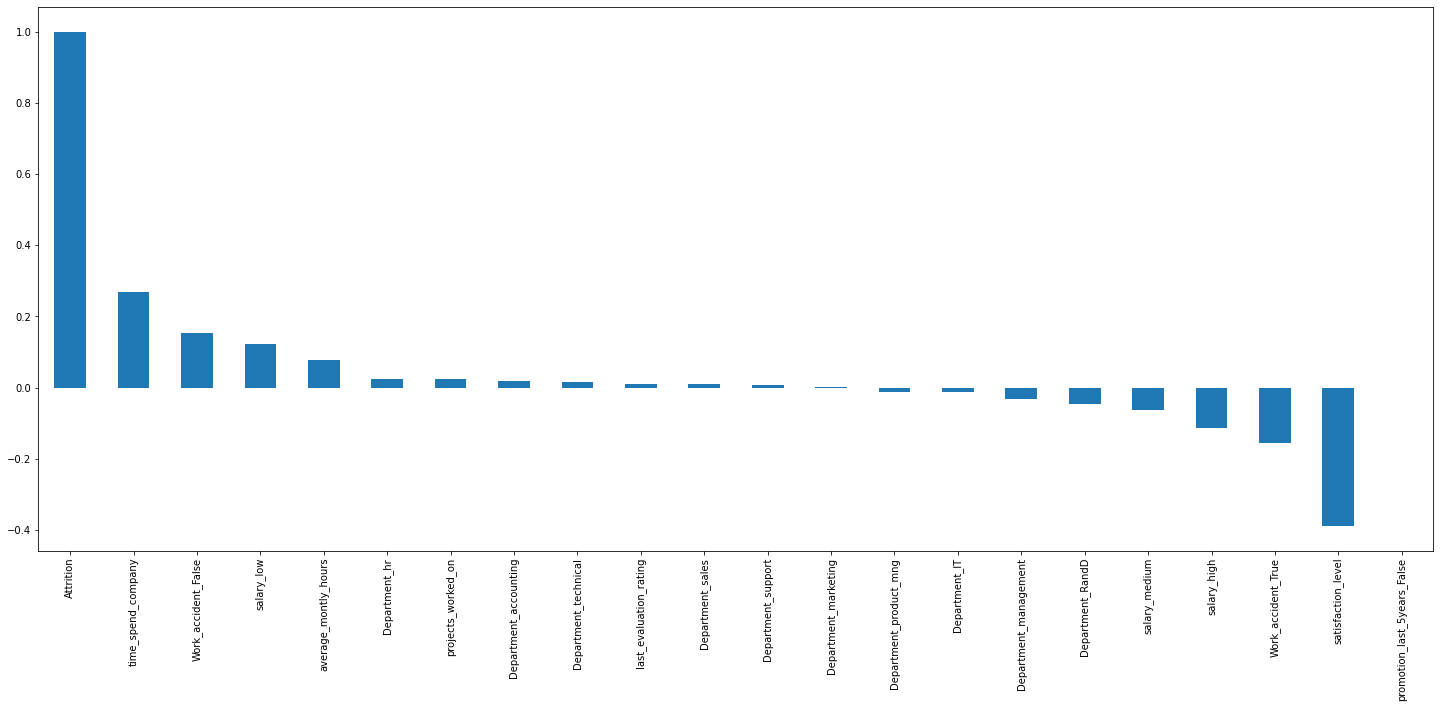

In [26]:
plt.subplots(figsize=(25, 10))
eda_df.corr()['Attrition'].sort_values(ascending=False).plot(kind='bar')

## 5.3 Uni-Variate & Bi-Variate Analysis

### 5.3.1 Histogram + Distribution Plots

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

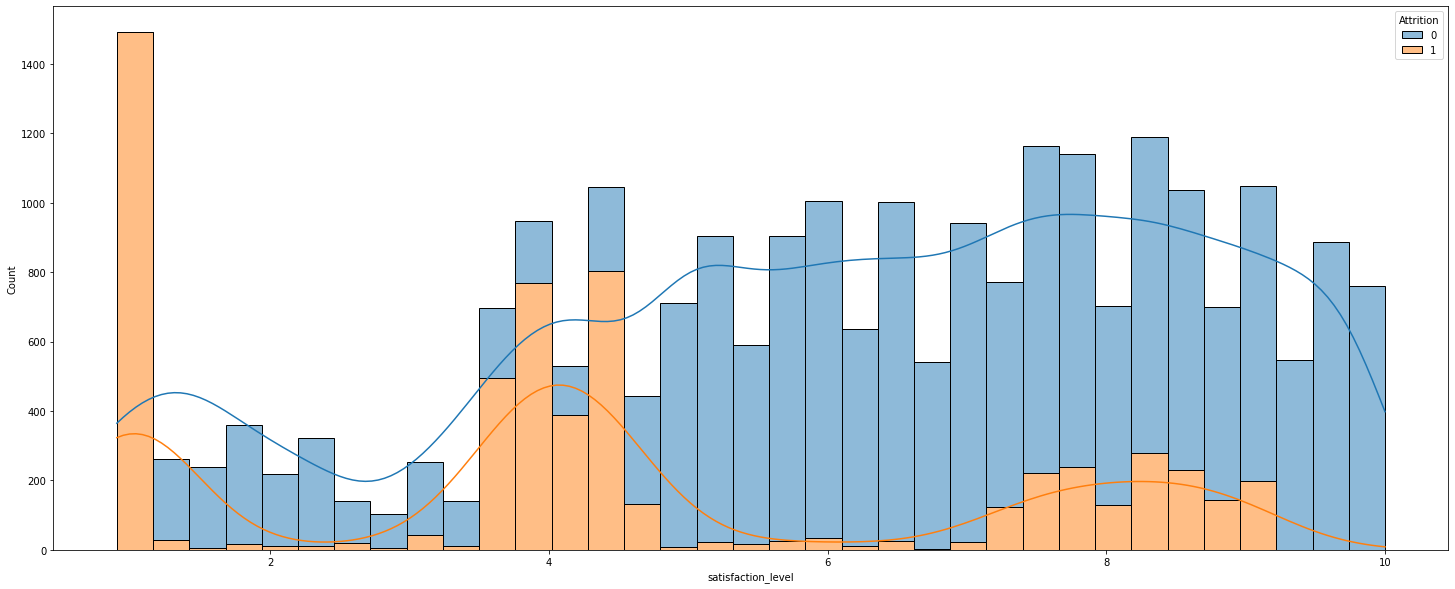

In [21]:
plt.subplots(figsize=(25, 10))

sns.histplot(data=eda_df, x="satisfaction_level", kde=True, hue=eda_df['Attrition'], multiple="stack")
## this is bimodal kde..kernel density estimation..

# eda_df.groupby('Attrition').satisfaction_level.hist(legend=True)

<AxesSubplot:xlabel='last_evaluation_rating', ylabel='Count'>

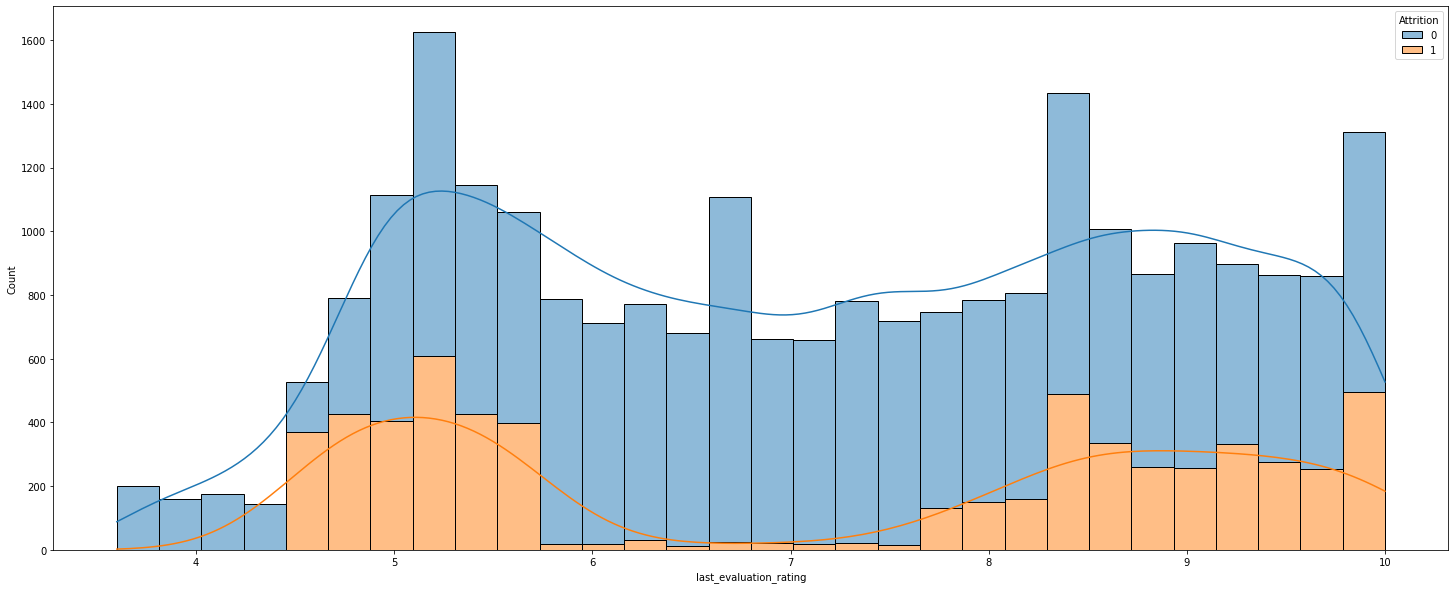

In [161]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="last_evaluation_rating", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='projects_worked_on', ylabel='Count'>

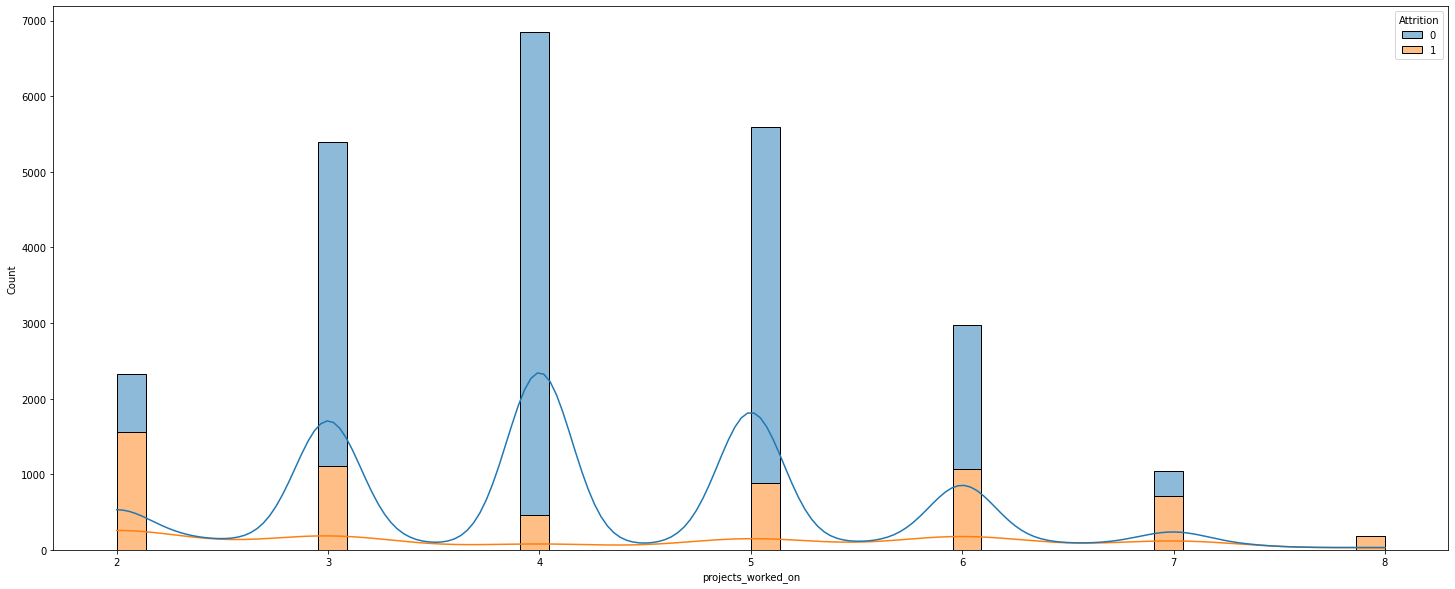

In [159]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="projects_worked_on", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

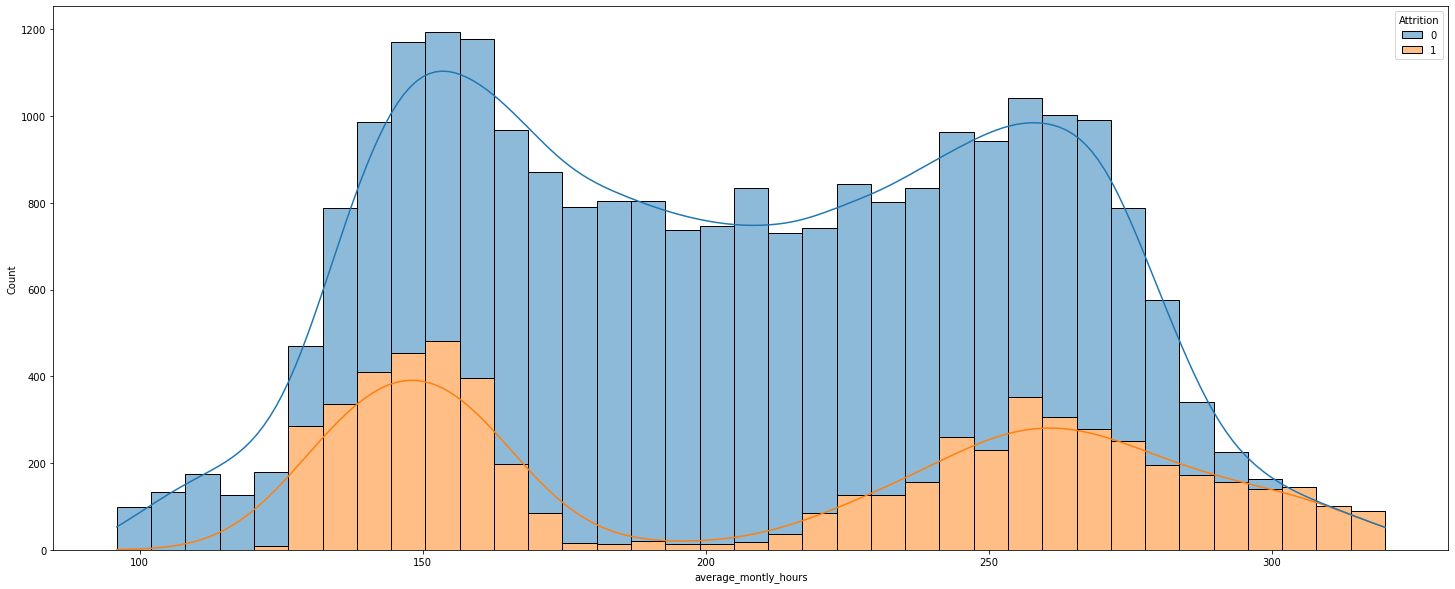

In [162]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="average_montly_hours", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

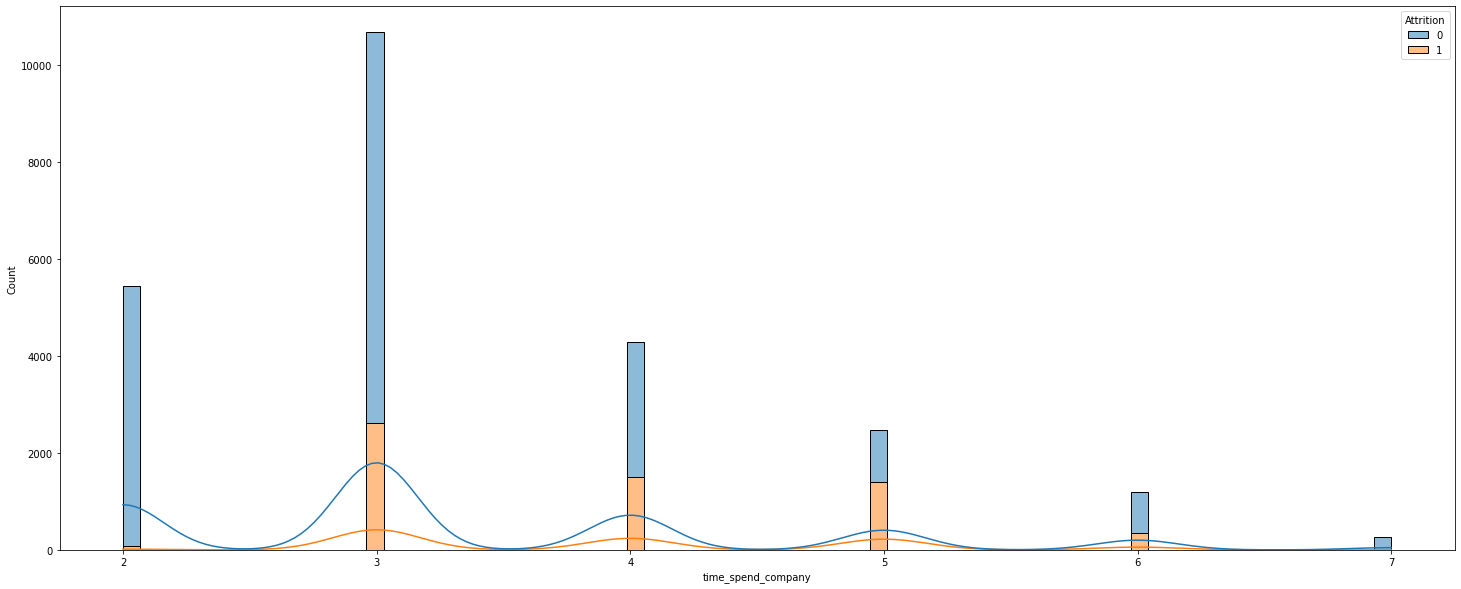

In [163]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="time_spend_company", kde=True, hue=eda_df['Attrition'], multiple="stack")

In [117]:
original_dpp_all_outliers_removed_df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3          False   
1                   272                   6          False   
2                   282                   4          False   
3                   169                   3          False   
4                   163                   3          False   

   promotion_last_5years Department  salary  Attrition  
0                  False      sales     low          1  
1                  False      sales  medium          1  
2                  False      sales  medium          1  
3                  False      sales     low          1  
4                  False      sales     low          1

In [130]:
eda_df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2                 1                   0                     0            0   
3                 1                   0                     0            0   
4                 1                   0                     0            0   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

### 5.3.2 Count Plots

<AxesSubplot:xlabel='Department', ylabel='count'>

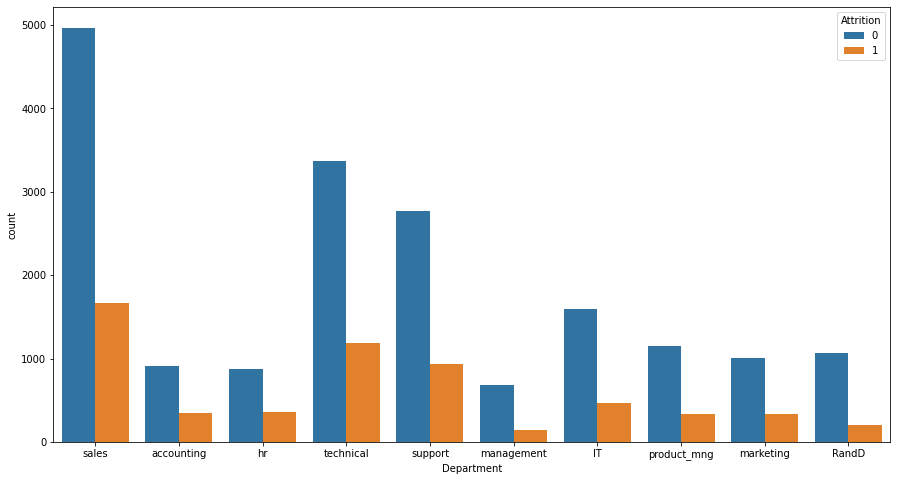

In [168]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="Department", hue="Attrition", data=original_dpp_all_outliers_removed_df)

<AxesSubplot:xlabel='salary', ylabel='count'>

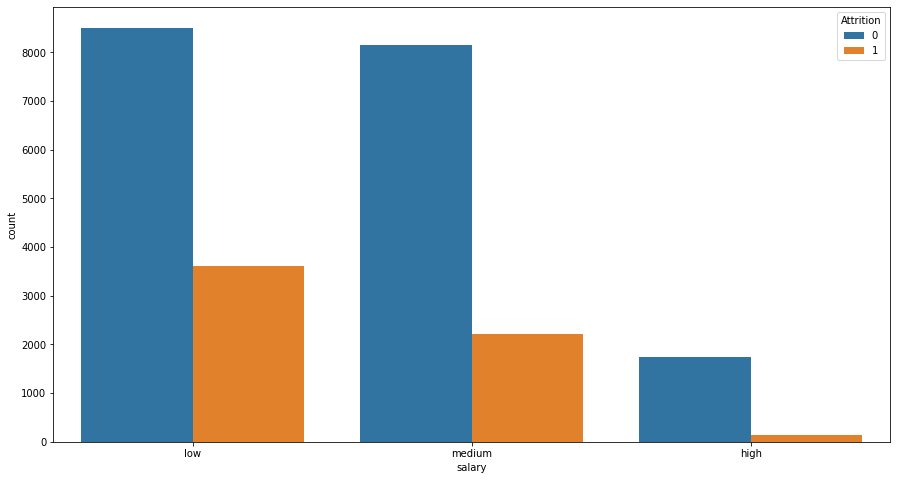

In [169]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="salary", hue="Attrition", data=original_dpp_all_outliers_removed_df)

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

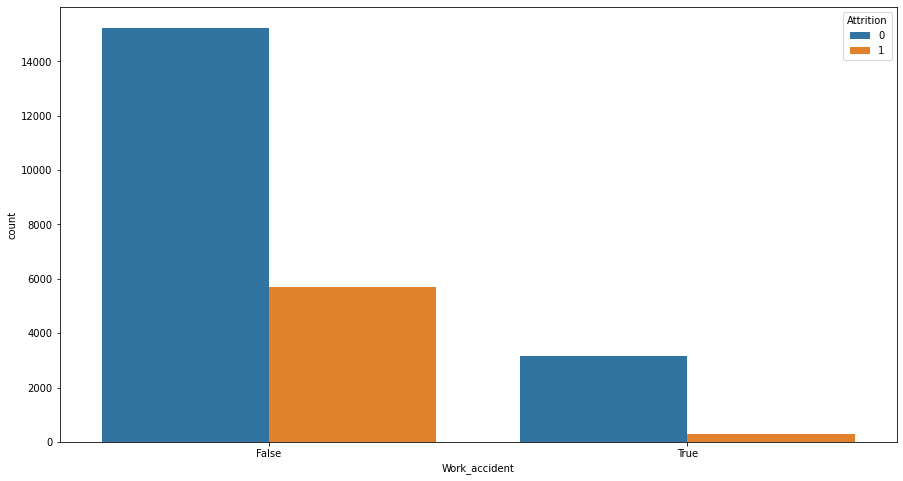

In [170]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="Work_accident", hue="Attrition", data=original_dpp_all_outliers_removed_df)

### 5.3.3 Pair Plots

c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


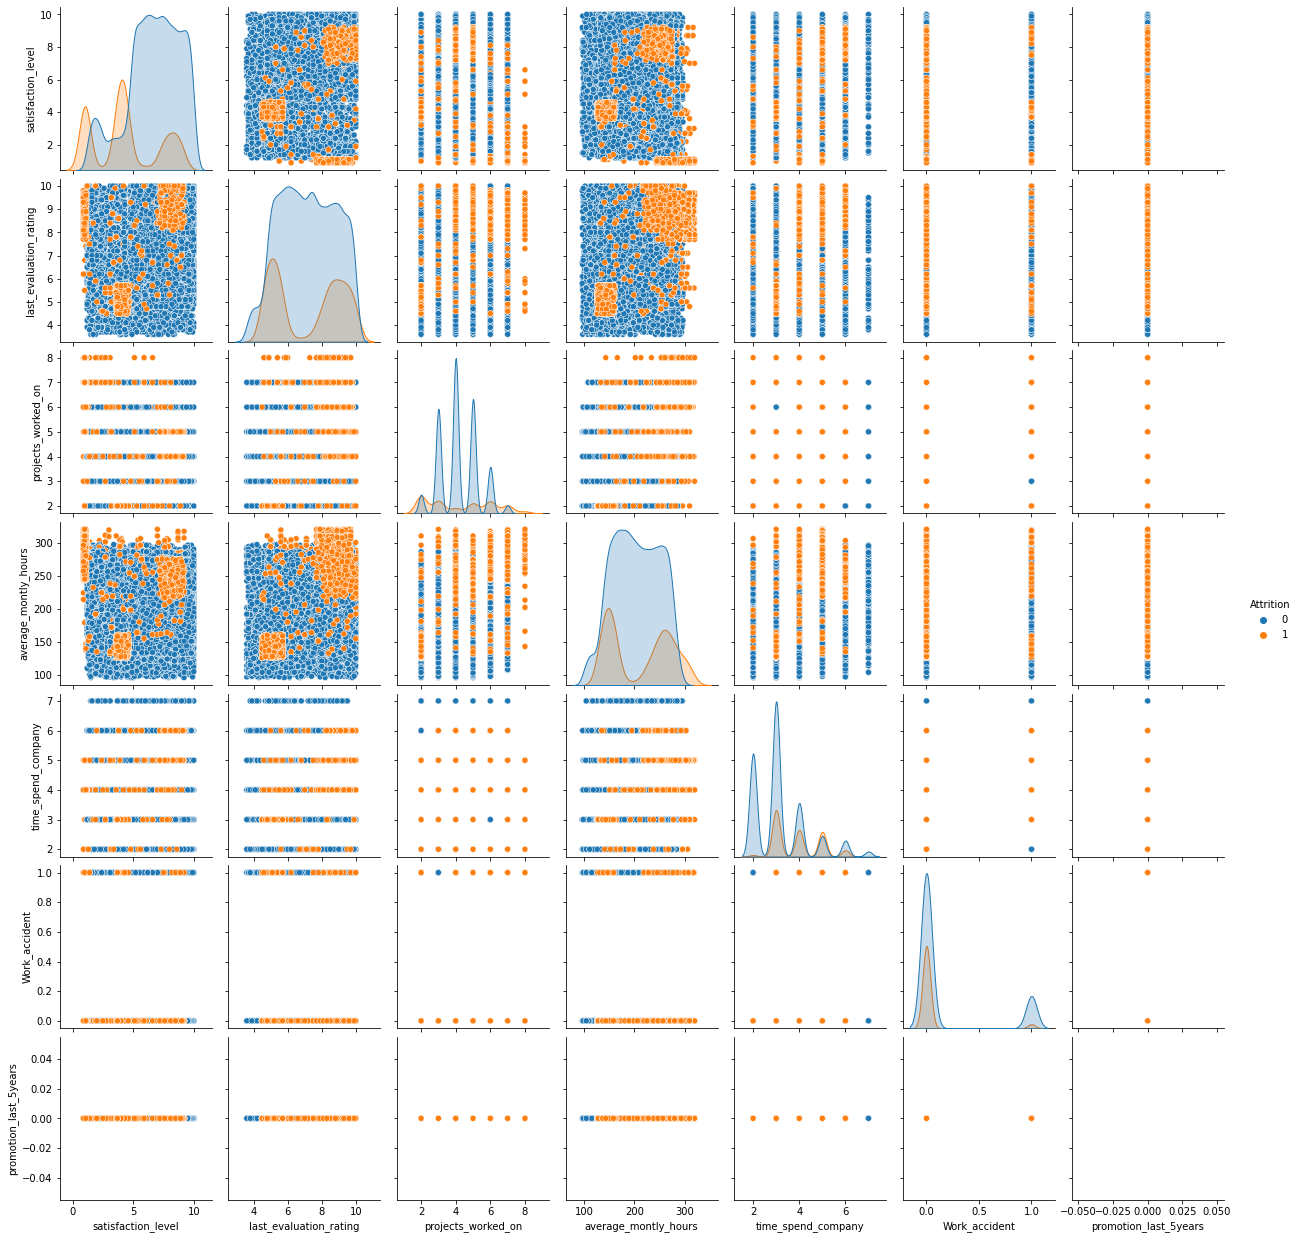

In [33]:
sns.pairplot(original_dpp_all_outliers_removed_df, hue="Attrition")

### 5.3.4 Box Plots

<AxesSubplot:xlabel='Attrition', ylabel='satisfaction_level'>

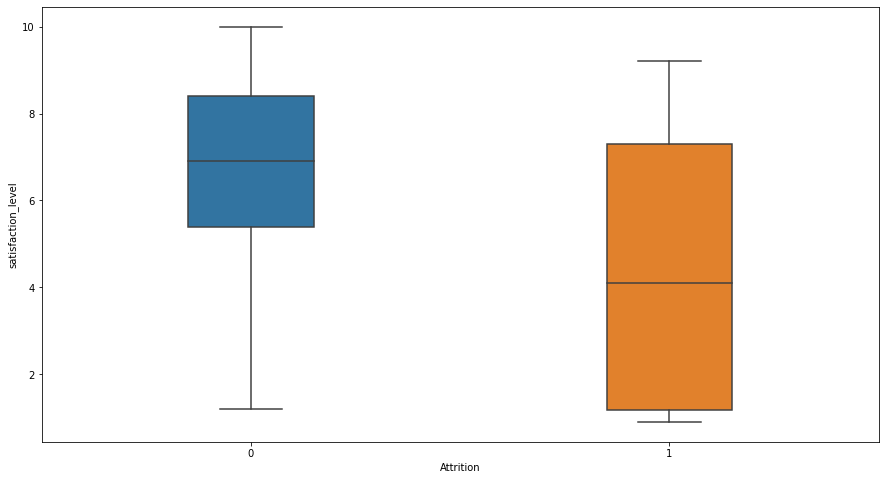

In [17]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, width=0.3)

## this is taking lot of time to run..
# sns.swarmplot(x='Attrition', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, color=".25")

<AxesSubplot:xlabel='Department', ylabel='satisfaction_level'>

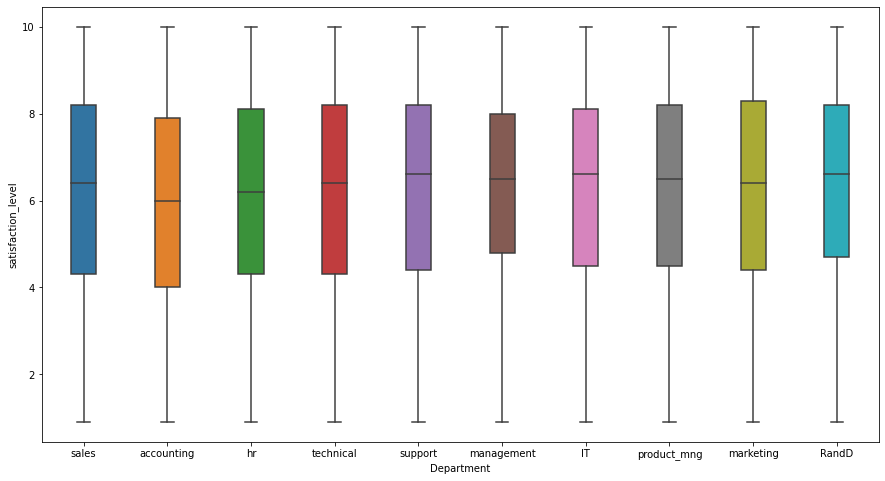

In [8]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

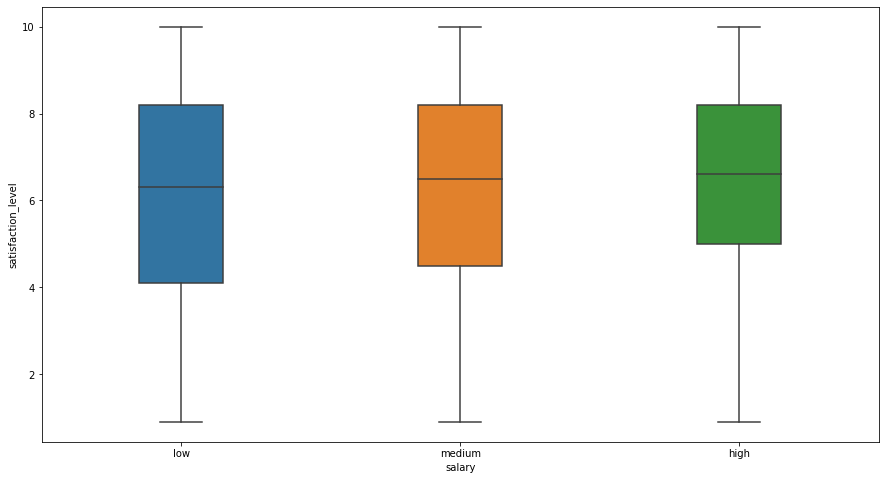

In [42]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='last_evaluation_rating'>

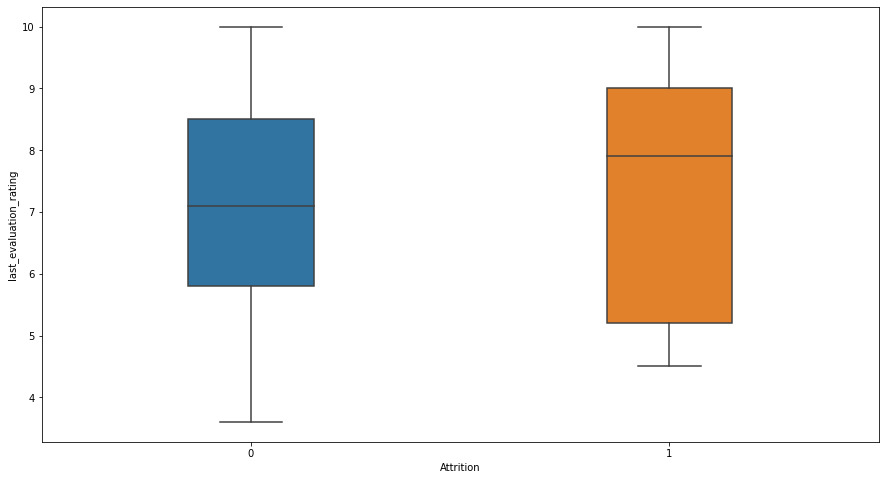

In [43]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='last_evaluation_rating', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='last_evaluation_rating'>

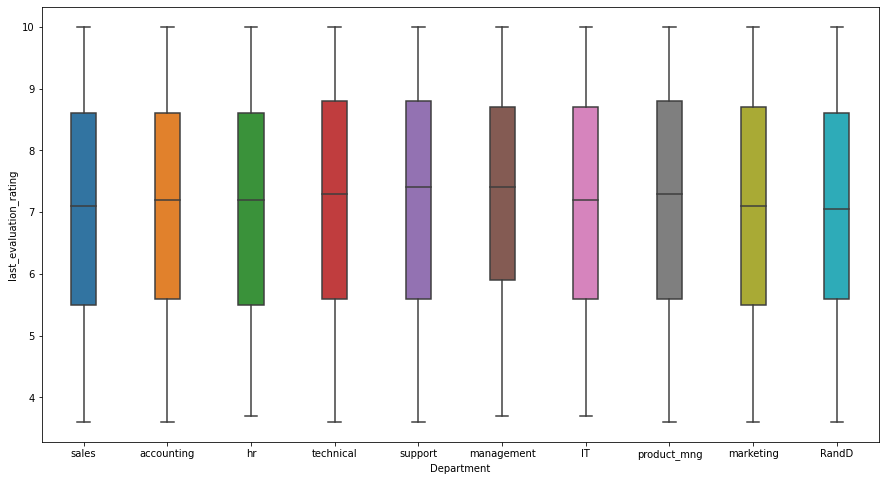

In [44]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='last_evaluation_rating', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='last_evaluation_rating'>

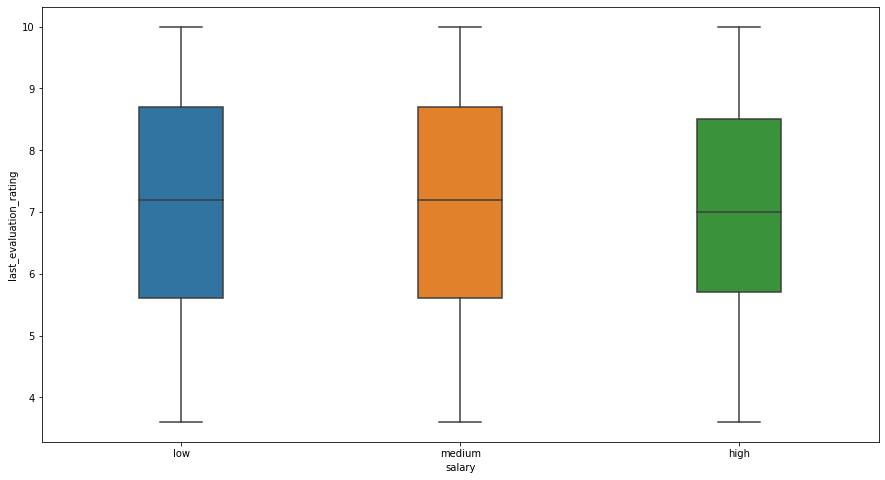

In [45]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='last_evaluation_rating', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='projects_worked_on'>

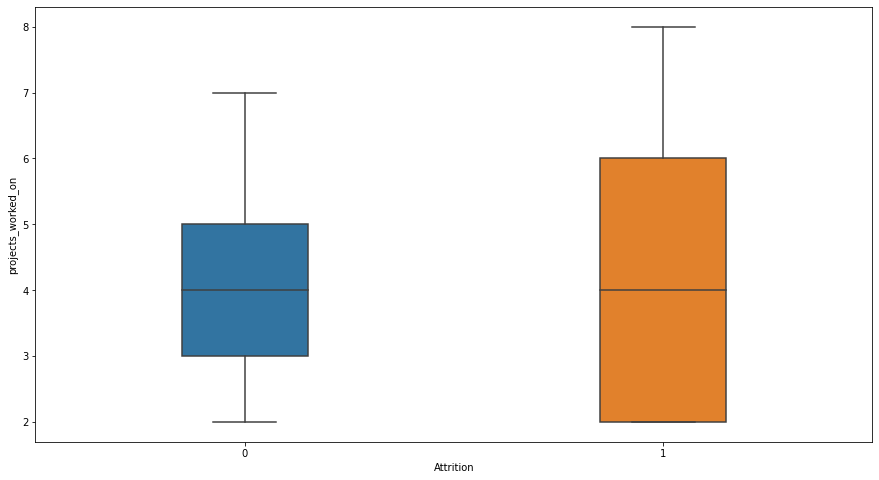

In [46]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='projects_worked_on', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='projects_worked_on'>

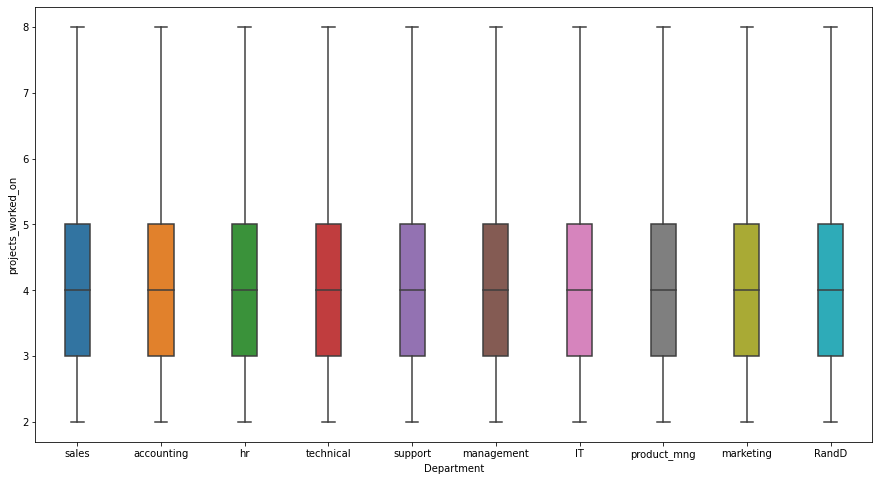

In [47]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='projects_worked_on', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='projects_worked_on'>

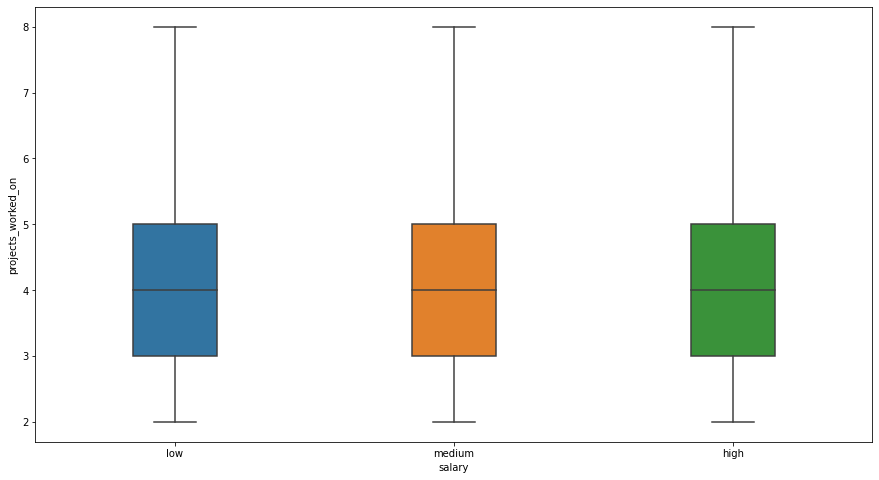

In [48]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='projects_worked_on', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='average_montly_hours'>

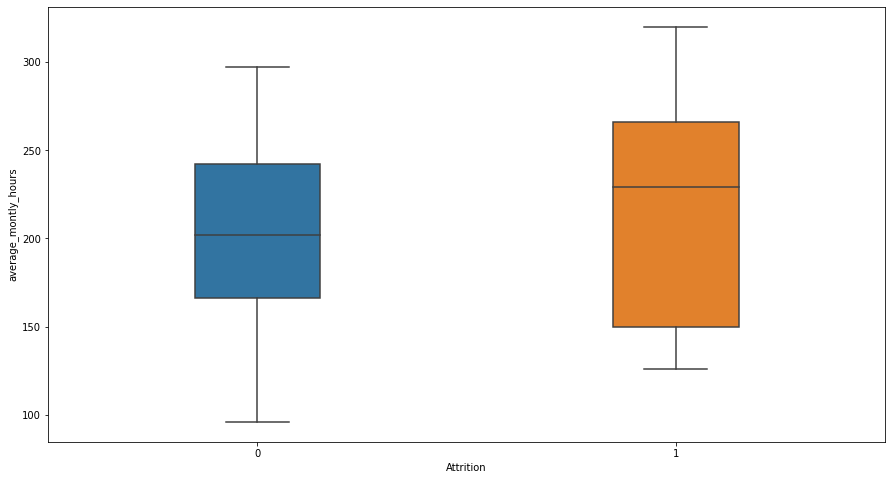

In [49]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='average_montly_hours', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='average_montly_hours'>

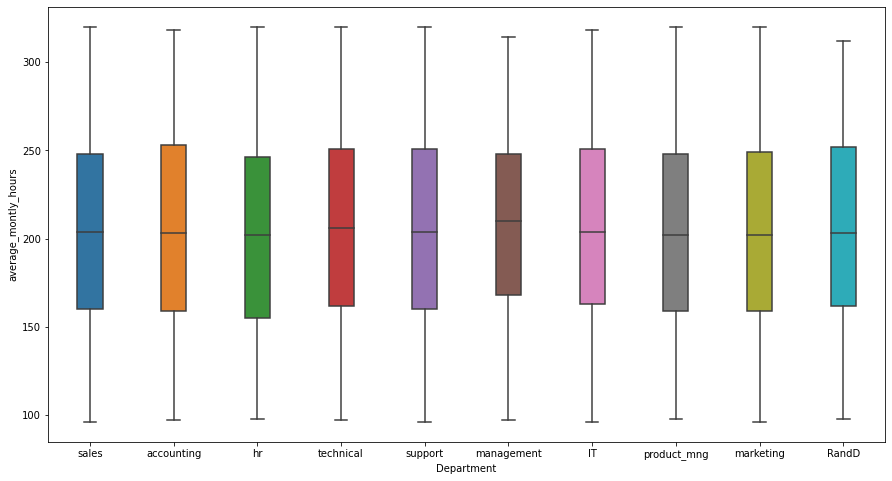

In [50]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='average_montly_hours', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

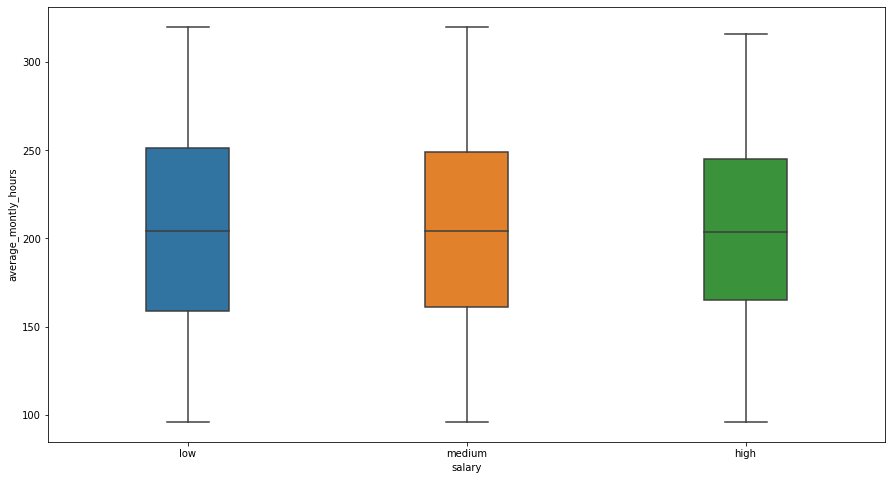

In [51]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='average_montly_hours', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='time_spend_company'>

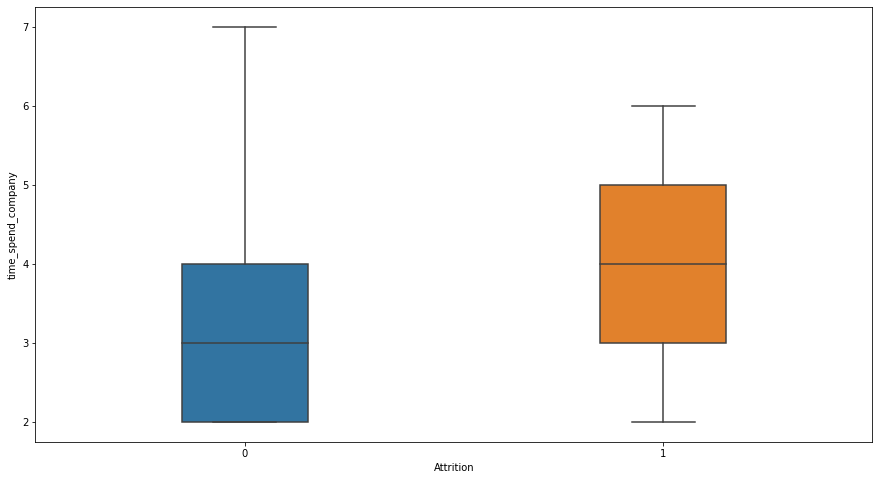

In [56]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='time_spend_company', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='time_spend_company'>

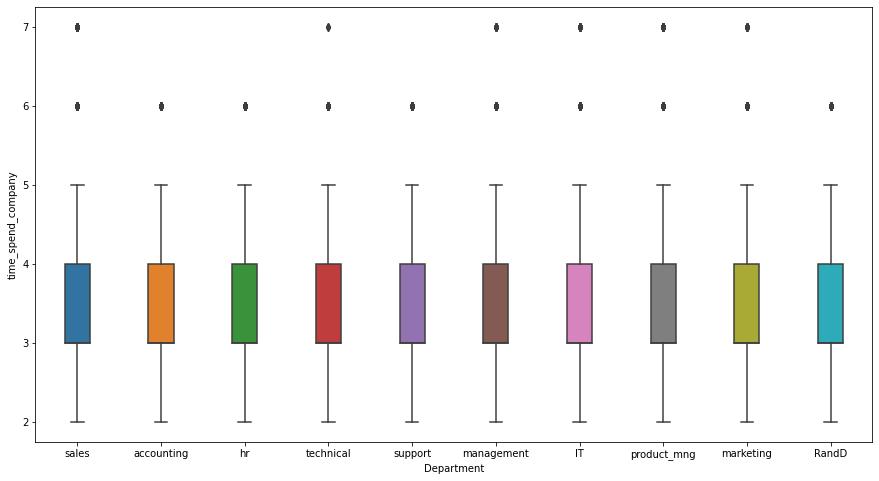

In [53]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='time_spend_company', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='time_spend_company'>

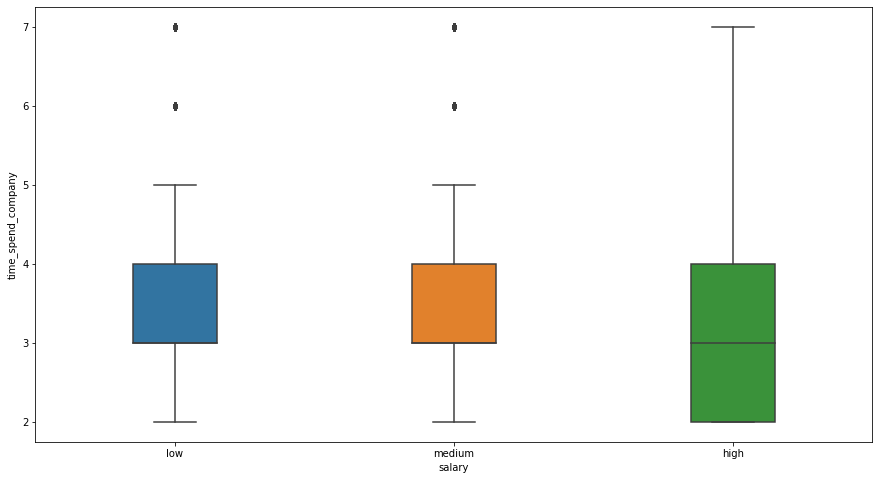

In [54]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='time_spend_company', data=original_dpp_all_outliers_removed_df, width=0.3)

### 5.3.5 Scatter Plots

<AxesSubplot:xlabel='satisfaction_level', ylabel='Attrition'>

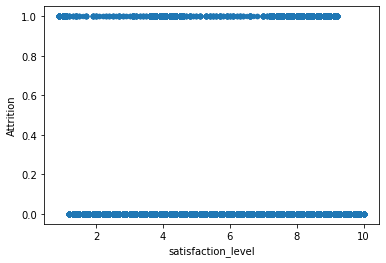

In [62]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='satisfaction_level', y='Attrition')

<AxesSubplot:xlabel='last_evaluation_rating', ylabel='Attrition'>

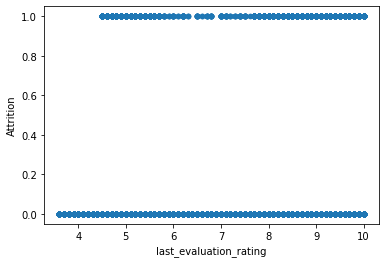

In [63]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='last_evaluation_rating', y='Attrition')

<AxesSubplot:xlabel='projects_worked_on', ylabel='Attrition'>

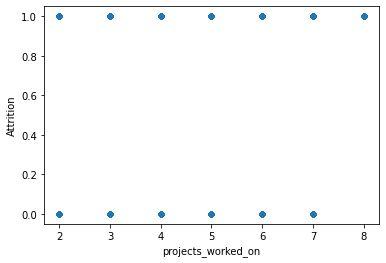

In [64]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='projects_worked_on', y='Attrition')

<AxesSubplot:xlabel='average_montly_hours', ylabel='Attrition'>

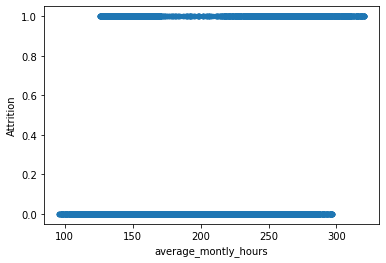

In [65]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='average_montly_hours', y='Attrition')

<AxesSubplot:xlabel='time_spend_company', ylabel='Attrition'>

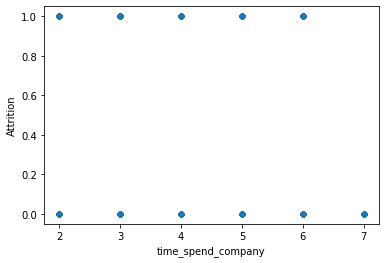

In [66]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='time_spend_company', y='Attrition')

## 5.4 PDF & CDF Analysis

### 5.4.1 PDF & CDF Plots

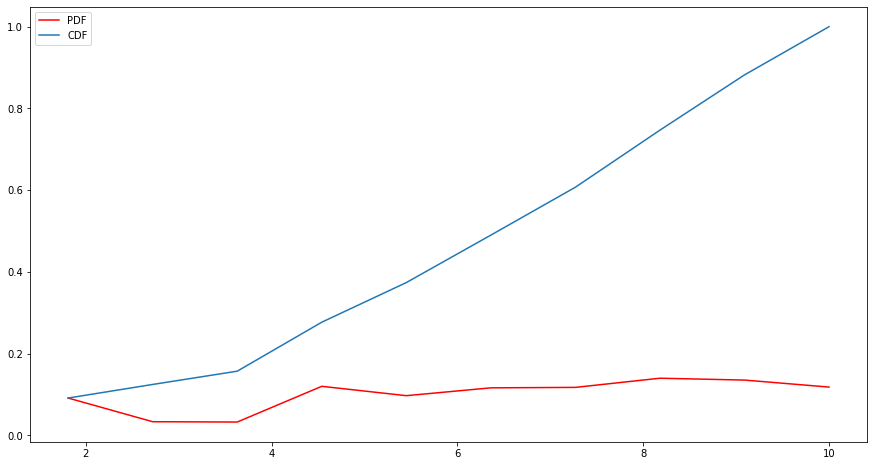

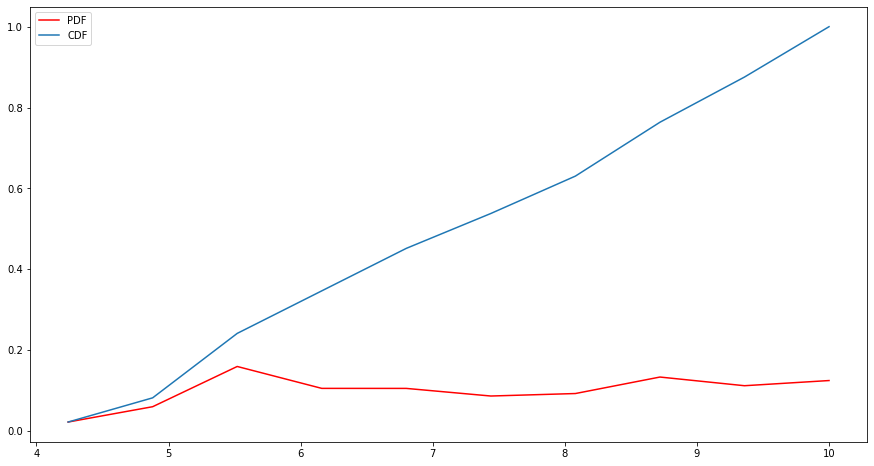

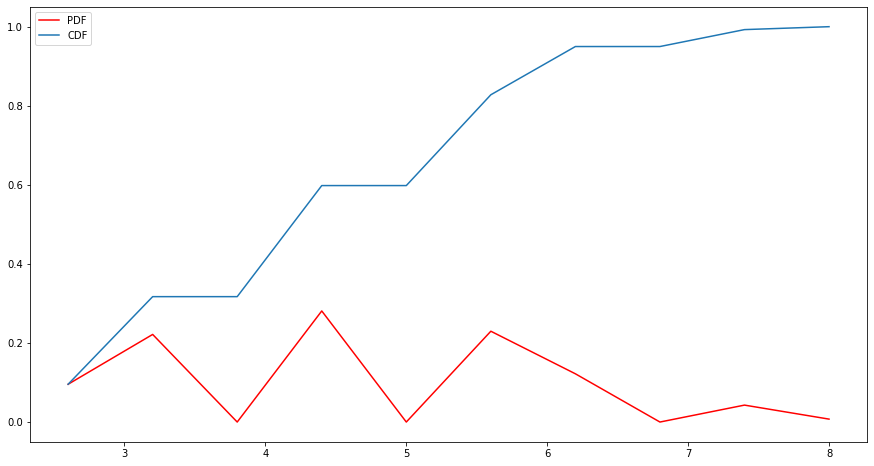

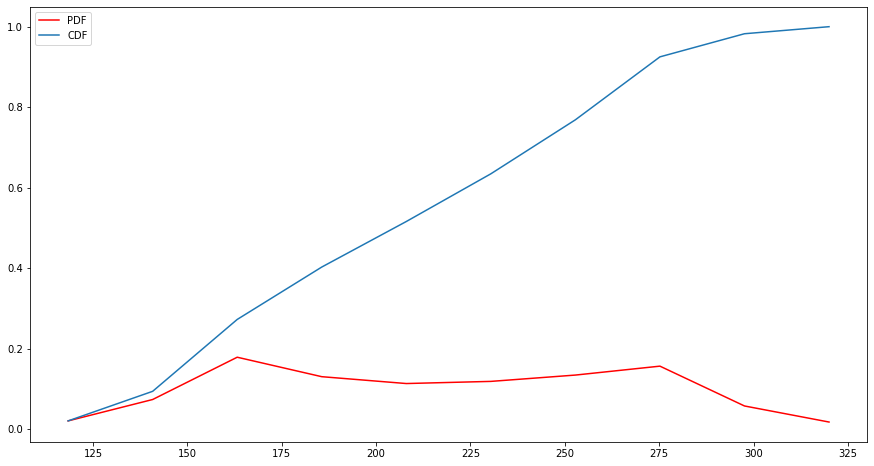

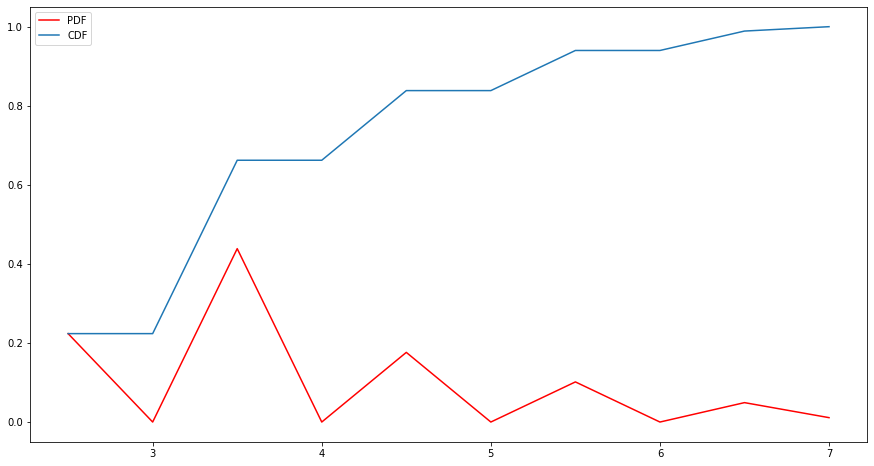

In [10]:
### TODO:
#### set title inside for loop..

for column in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    count, bins_count = np.histogram(original_dpp_all_outliers_removed_df[column], bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.subplots(figsize=(15, 8))
    plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.legend()

### 5.4.2 Pareto Plots

In [51]:
# pareto(original_dpp_all_outliers_removed_df['salary'], ['low', 'medium', 'high'], cumplot=True, data_kw={'width': 0.5, 'color': 'g'})
# plt.title('Data without cum. line, green bar width=0.5', fontsize=10)

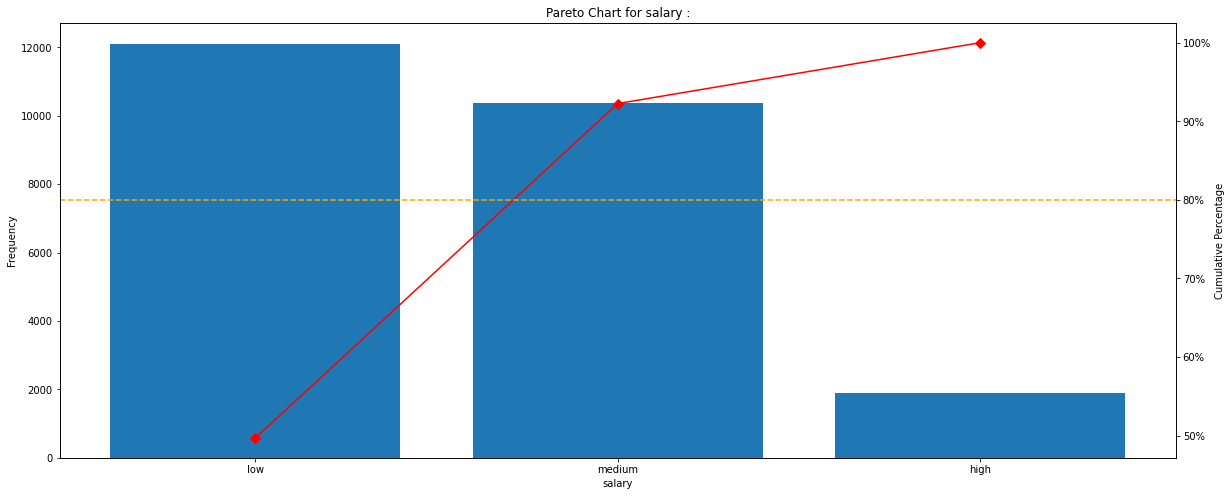

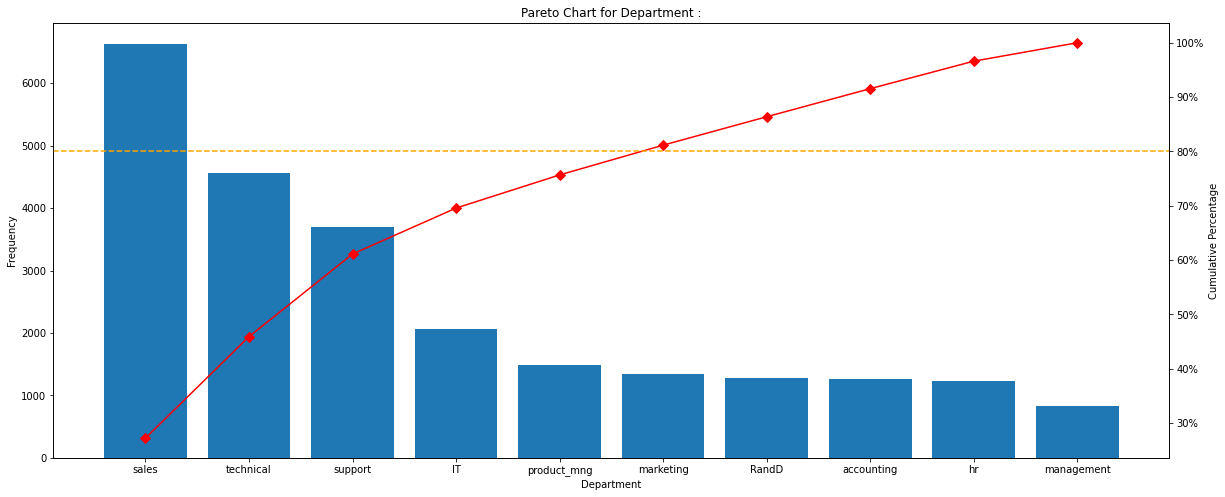

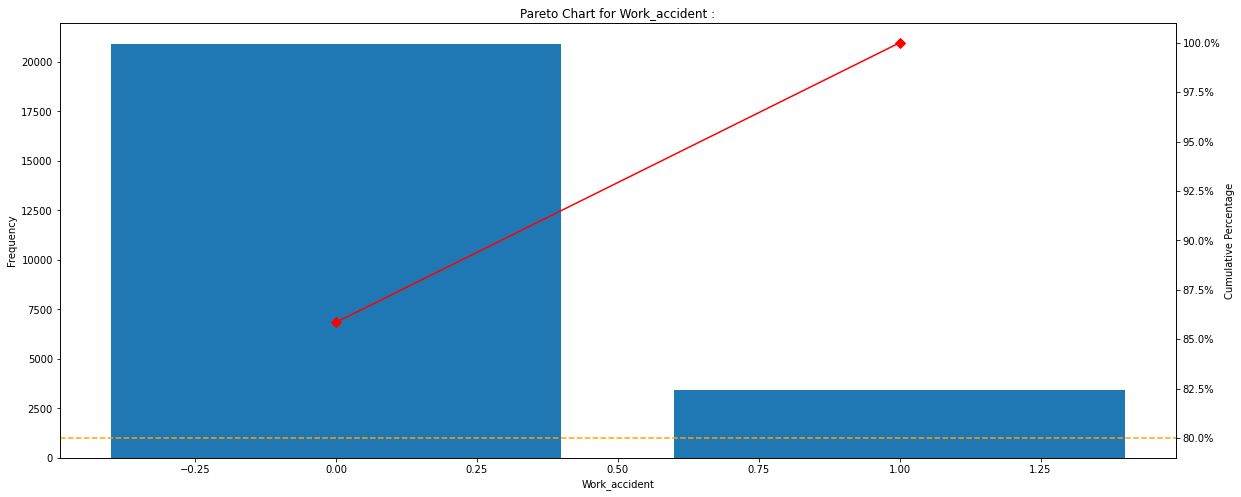

In [52]:
# This code has been taken and modified from :
# https://medium.com/swlh/pareto-chart-with-python-5200459ee65c

# For interpretation, check:
# https://tylermarrs.com/posts/pareto-plot-with-matplotlib/

for column in ['salary', 'Department', 'Work_accident']:
    # Build data frame
    df_column = pd.DataFrame({column: original_dpp_all_outliers_removed_df.groupby([column]).count()['satisfaction_level']})
    df_column.index.name = None

    # Sort values in descending order
    df_column = df_column.sort_values(by=column, ascending=False)

    # Add cumulative percentage column
    df_column["cum_percentage"] = round(df_column[column].cumsum()/df_column[column].sum()*100, 2)

    # Set figure and axis
    fig, ax = plt.subplots(figsize=(20,8))

    # Plot bars (i.e. frequencies)
    ax.bar(df_column.index, df_column[column])
    ax.set_title("Pareto Chart for {column} :".format(column=column))
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency");

    # Second y axis (i.e. cumulative percentage)
    ax2 = ax.twinx()
    ax2.plot(df_column.index, df_column["cum_percentage"], color="red", marker="D", ms=7)
    ax2.axhline(80, color="orange", linestyle="dashed")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Cumulative Percentage");

## 5.5 Class Imbalance Plots

<AxesSubplot:xlabel='Attrition', ylabel='count'>

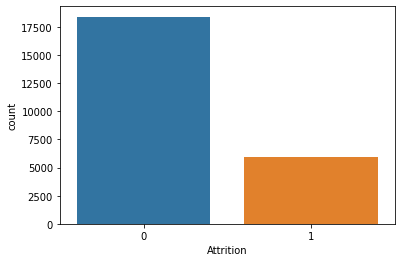

In [53]:
sns.countplot(x='Attrition', data=original_dpp_all_outliers_removed_df)

In [6]:
original_dpp_all_outliers_removed_df['Attrition'].value_counts()

0    18403
1     5964
Name: Attrition, dtype: int64

In [7]:
print("% of people who haven't churned (= 0) = ", (100 * original_dpp_all_outliers_removed_df['Attrition'].value_counts()[0]) / (original_dpp_all_outliers_removed_df['Attrition'].value_counts()[0] + original_dpp_all_outliers_removed_df['Attrition'].value_counts()[1]))
print("% of people who have churned (= 1) = ", (100 * original_dpp_all_outliers_removed_df['Attrition'].value_counts()[1]) / (original_dpp_all_outliers_removed_df['Attrition'].value_counts()[0] + original_dpp_all_outliers_removed_df['Attrition'].value_counts()[1]))

% of people who haven't churned (= 0) =  75.52427463372594
% of people who have churned (= 1) =  24.47572536627406


In [56]:
dill_dump_session('5.5_eda_completed')

# 6 Re-indexing Dataframes

In [5]:
dill_load_session('5.5_eda_completed')

In [56]:
print(original_dpp_all_outliers_removed_df.shape)
original_dpp_all_outliers_removed_df.tail(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24856                 4.3                     5.7                   2   
24857                 8.9                     8.8                   5   
24858                 0.9                     8.1                   6   
24859                 4.0                     4.8                   2   
24860                 7.6                     8.3                   6   
24861                 4.0                     5.7                   2   
24862                 3.7                     4.8                   2   
24863                 3.7                     5.3                   2   
24864                 1.1                     9.6                   6   
24865                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
24856                   159                   3           True   
24857                   228                   5           True   
24858                   257                   4          False   
24859                   155                   3          False   
24860                   293                   6          False   
24861                   151                   3          False   
24862                   160                   3          False   
24863                   143                   3          False   
24864                   280                   4          False   
24865                   158                   3          False   

       promotion_last_5years Department salary  Attrition  
24856                  False  technical    low          1  
24857                  False    support    low          1  
24858                  False    support    low          1  
24859                  False    support    low          1  
24860                  False    support    low          1  
24861                  False    support    low          1  
24862                  False    support    low          1  
24863                  False    support    low          1  
24864                  False    support    low          1  
24865                  False    support    low          1

In [57]:
original_dpp_all_outliers_removed_df = original_dpp_all_outliers_removed_df.reset_index(drop=True)

In [60]:
print(original_dpp_all_outliers_removed_df.shape)
original_dpp_all_outliers_removed_df.tail(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24357                 4.3                     5.7                   2   
24358                 8.9                     8.8                   5   
24359                 0.9                     8.1                   6   
24360                 4.0                     4.8                   2   
24361                 7.6                     8.3                   6   
24362                 4.0                     5.7                   2   
24363                 3.7                     4.8                   2   
24364                 3.7                     5.3                   2   
24365                 1.1                     9.6                   6   
24366                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
24357                   159                   3           True   
24358                   228                   5           True   
24359                   257                   4          False   
24360                   155                   3          False   
24361                   293                   6          False   
24362                   151                   3          False   
24363                   160                   3          False   
24364                   143                   3          False   
24365                   280                   4          False   
24366                   158                   3          False   

       promotion_last_5years Department salary  Attrition  
24357                  False  technical    low          1  
24358                  False    support    low          1  
24359                  False    support    low          1  
24360                  False    support    low          1  
24361                  False    support    low          1  
24362                  False    support    low          1  
24363                  False    support    low          1  
24364                  False    support    low          1  
24365                  False    support    low          1  
24366                  False    support    low          1

In [61]:
print(eda_df.shape)
eda_df.tail(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24856                 4.3                     5.7                   2   
24857                 8.9                     8.8                   5   
24858                 0.9                     8.1                   6   
24859                 4.0                     4.8                   2   
24860                 7.6                     8.3                   6   
24861                 4.0                     5.7                   2   
24862                 3.7                     4.8                   2   
24863                 3.7                     5.3                   2   
24864                 1.1                     9.6                   6   
24865                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Attrition  \
24856                   159                   3          1   
24857                   228                   5          1   
24858                   257                   4          1   
24859                   155                   3          1   
24860                   293                   6          1   
24861                   151                   3          1   
24862                   160                   3          1   
24863                   143                   3          1   
24864                   280                   4          1   
24865                   158                   3          1   

       Work_accident_False  Work_accident_True  promotion_last_5years_False  \
24856                    0                   1                            1   
24857                    0                   1                            1   
24858                    1                   0                            1   
24859                    1                   0                            1   
24860                    1                   0                            1   
24861                    1                   0                            1   
24862                    1                   0                            1   
24863                    1                   0                            1   
24864                    1                   0                            1   
24865                    1                   0                            1   

       Department_IT  Department_RandD  Department_accounting  Department_hr  \
24856              0                 0                      0              0   
24857              0                 0                      0              0   
24858              0                 0                      0              0   
24859              0                 0                      0              0   
24860              0                 0                      0              0   
24861              0                 0                      0              0   
24862              0                 0                      0              0   
24863              0                 0                      0              0   
24864              0                 0                      0              0   
24865              0                 0                      0              0   

       Department_management  Department_marketing  Department_product_mng  \
24856                      0                     0                       0   
24857                      0                     0                       0   
24858                      0                     0                       0   
24859                      0                     0                       0   
24860                      0                     0                       0   
24861                      0                     0                       0   
24862                      0                     0                       0   
24863                      0                     0                       0   
24864                      0                     0                 

In [62]:
eda_df = eda_df.reset_index(drop=True)

In [63]:
print(eda_df.shape)
eda_df.tail(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24357                 4.3                     5.7                   2   
24358                 8.9                     8.8                   5   
24359                 0.9                     8.1                   6   
24360                 4.0                     4.8                   2   
24361                 7.6                     8.3                   6   
24362                 4.0                     5.7                   2   
24363                 3.7                     4.8                   2   
24364                 3.7                     5.3                   2   
24365                 1.1                     9.6                   6   
24366                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Attrition  \
24357                   159                   3          1   
24358                   228                   5          1   
24359                   257                   4          1   
24360                   155                   3          1   
24361                   293                   6          1   
24362                   151                   3          1   
24363                   160                   3          1   
24364                   143                   3          1   
24365                   280                   4          1   
24366                   158                   3          1   

       Work_accident_False  Work_accident_True  promotion_last_5years_False  \
24357                    0                   1                            1   
24358                    0                   1                            1   
24359                    1                   0                            1   
24360                    1                   0                            1   
24361                    1                   0                            1   
24362                    1                   0                            1   
24363                    1                   0                            1   
24364                    1                   0                            1   
24365                    1                   0                            1   
24366                    1                   0                            1   

       Department_IT  Department_RandD  Department_accounting  Department_hr  \
24357              0                 0                      0              0   
24358              0                 0                      0              0   
24359              0                 0                      0              0   
24360              0                 0                      0              0   
24361              0                 0                      0              0   
24362              0                 0                      0              0   
24363              0                 0                      0              0   
24364              0                 0                      0              0   
24365              0                 0                      0              0   
24366              0                 0                      0              0   

       Department_management  Department_marketing  Department_product_mng  \
24357                      0                     0                       0   
24358                      0                     0                       0   
24359                      0                     0                       0   
24360                      0                     0                       0   
24361                      0                     0                       0   
24362                      0                     0                       0   
24363                      0                     0                       0   
24364                      0                     0                       0   
24365                      0                     0                 

In [66]:
lr_eda_df = eda_df.copy()
lr_eda_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [67]:
lr_eda_df.shape[0]

24367

In [69]:
# lr_eda_df.drop(['constant'], axis=1)

In [70]:
constant_column = pd.DataFrame({'constant' : np.ones(lr_eda_df.shape[0], dtype = int)})
lr_eda_df = pd.concat([constant_column, lr_eda_df], axis=1)
lr_eda_df.head(10)

constant  satisfaction_level  last_evaluation_rating  projects_worked_on  \
0         1                 3.8                     5.3                   3   
1         1                 8.0                     8.6                   6   
2         1                 1.1                     8.8                   8   
3         1                 3.7                     5.2                   3   
4         1                 4.1                     5.0                   3   
5         1                 1.0                     7.7                   7   
6         1                 9.2                     8.5                   6   
7         1                 8.9                    10.0                   6   
8         1                 4.2                     5.3                   3   
9         1                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sa

In [71]:
lr_eda_df.shape

(24367, 23)

In [72]:
lr_eda_df.tail(10)

constant  satisfaction_level  last_evaluation_rating  \
24357         1                 4.3                     5.7   
24358         1                 8.9                     8.8   
24359         1                 0.9                     8.1   
24360         1                 4.0                     4.8   
24361         1                 7.6                     8.3   
24362         1                 4.0                     5.7   
24363         1                 3.7                     4.8   
24364         1                 3.7                     5.3   
24365         1                 1.1                     9.6   
24366         1                 3.7                     5.2   

       projects_worked_on  average_montly_hours  time_spend_company  \
24357                   2                   159                   3   
24358                   5                   228                   5   
24359                   6                   257                   4   
24360                   2                   155                   3   
24361                   6                   293                   6   
24362                   2                   151                   3   
24363                   2                   160                   3   
24364                   2                   143                   3   
24365                   6                   280                   4   
24366                   2                   158                   3   

       Attrition  Work_accident_False  Work_accident_True  \
24357          1                    0                   1   
24358          1                    0                   1   
24359          1                    1                   0   
24360          1                    1                   0   
24361          1                    1                   0   
24362          1                    1                   0   
24363          1                    1                   0   
24364          1                    1                   0   
24365          1                    1                   0   
24366          1                    1                   0   

       promotion_last_5years_False  Department_IT  Department_RandD  \
24357                            1              0                 0   
24358                            1              0                 0   
24359                            1              0                 0   
24360                            1              0                 0   
24361                            1              0                 0   
24362                            1              0                 0   
24363                            1              0                 0   
24364                            1              0                 0   
24365                            1              0                 0   
24366                            1              0                 0   

       Department_accounting  Department_hr  Department_management  \
24357                      0              0                      0   
24358                      0              0                      0   
24359                      0              0                      0   
24360                      0              0                      0   
24361                      0              0                      0   
24362                      0              0                      0   
24363                      0              0                      0   
24364                      0              0                      0   
24365                      0              0                      0   
24366                      0              0                      0   

       Department_marketing  Department_product_mng  Department_sales  \
24357                     0                       0                 0   
24358                     0                       0                 0   
24359                     0                       0                 0   
24360         

In [82]:
dill_dump_session('6.till_hypothesis_testing_inaccurate_not_moving_forward')

# 7. Hypothesis Testing

## 7.1  Chi-Square Test For Independence

In [8]:
cst_eda_df = eda_df.copy()
print(cst_eda_df.shape)
cst_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [9]:
cst_eda_x_df = cst_eda_df.loc[:, cst_eda_df.columns != 'Attrition']
cst_eda_y_df = cst_eda_df.loc[:, cst_eda_df.columns == 'Attrition']

In [10]:
print(type(cst_eda_x_df))
print(cst_eda_x_df.shape)
cst_eda_x_df.head(10)

<class 'pandas.core.frame.DataFrame'>
(24367, 21)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2            

In [11]:
print(type(cst_eda_y_df))
print(cst_eda_y_df.shape)
cst_eda_y_df.head(10)

<class 'pandas.core.frame.DataFrame'>
(24367, 1)


Attrition
0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1

In [31]:
chi_square_select_k_best = SelectKBest(chi2, k=21)
chi_square_select_k_best.fit(cst_eda_x_df, cst_eda_y_df)

SelectKBest(k=21, score_func=<function chi2 at 0x000001267FDDE670>)

In [32]:
# Look at scores returned from the selector for each feature
chi_square_result_df = pd.DataFrame(list(zip(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident_False', 'Work_accident_True', 'promotion_last_5years_False', 'Department_IT', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical', 'salary_high', 'salary_low', 'salary_medium'], 
                               chi_square_select_k_best.scores_, chi_square_select_k_best.pvalues_)), 
                      columns=['feature', 'Chi-Square Value', 'p-Value']
                     )
chi_square_result_df

feature  Chi-Square Value        p-Value
0            satisfaction_level       3758.964718   0.000000e+00
1        last_evaluation_rating          1.133972   2.869297e-01
2            projects_worked_on          5.948662   1.472846e-02
3          average_montly_hours       1772.954730   0.000000e+00
4            time_spend_company        683.823710  9.849255e-151
5           Work_accident_False         82.088203   1.301471e-19
6            Work_accident_True        498.365439  2.155852e-110
7   promotion_last_5years_False          0.000000   1.000000e+00
8                 Department_IT          3.879474   4.887988e-02
9              Department_RandD         48.452882   3.383208e-12
10        Department_accounting          7.620193   5.771830e-03
11                Department_hr         13.733028   2.107161e-04
12        Department_management         24.505725   7.408936e-07
13         Department_marketing          0.184877   6.672153e-01
14       Department_product_mng          3.894942   4.843171e-02
15             Department_sales          1.423181   2.328806e-01
16           Department_support          0.784162   3.758713e-01
17         Department_technical          5.717375   1.679783e-02
18                  salary_high        293.597142   8.180655e-66
19                   salary_low        182.708294   1.241977e-41
20                salary_medium         53.206636   3.002427e-13

<AxesSubplot:xlabel='feature'>

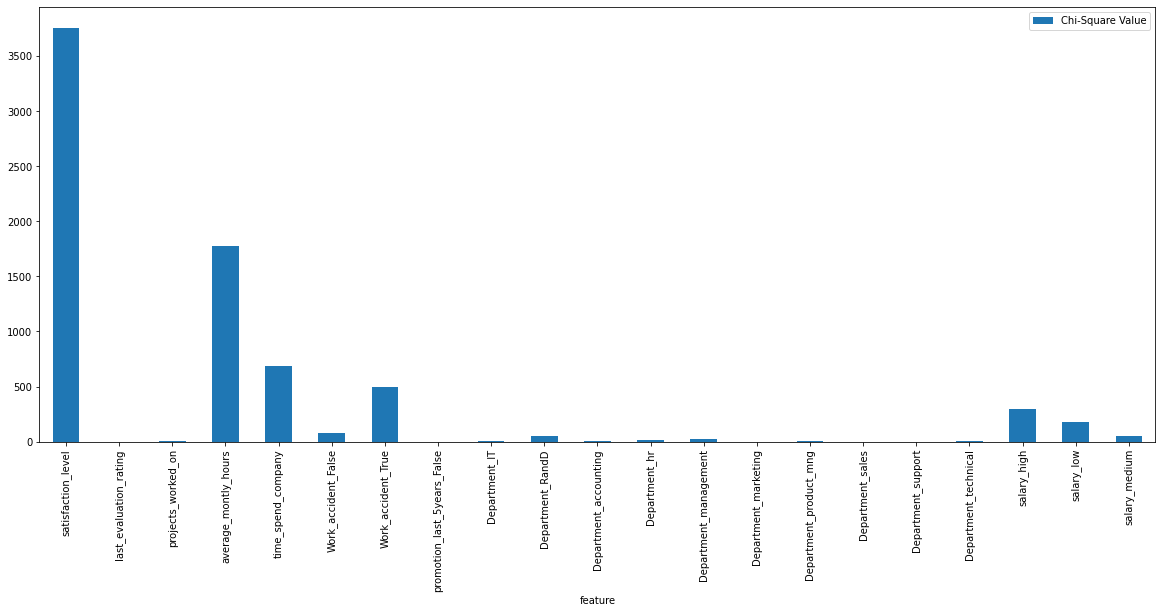

In [33]:
chi_square_result_df.plot(x="feature", y=["Chi-Square Value"], kind="bar", figsize=(20, 8))

<AxesSubplot:xlabel='feature'>

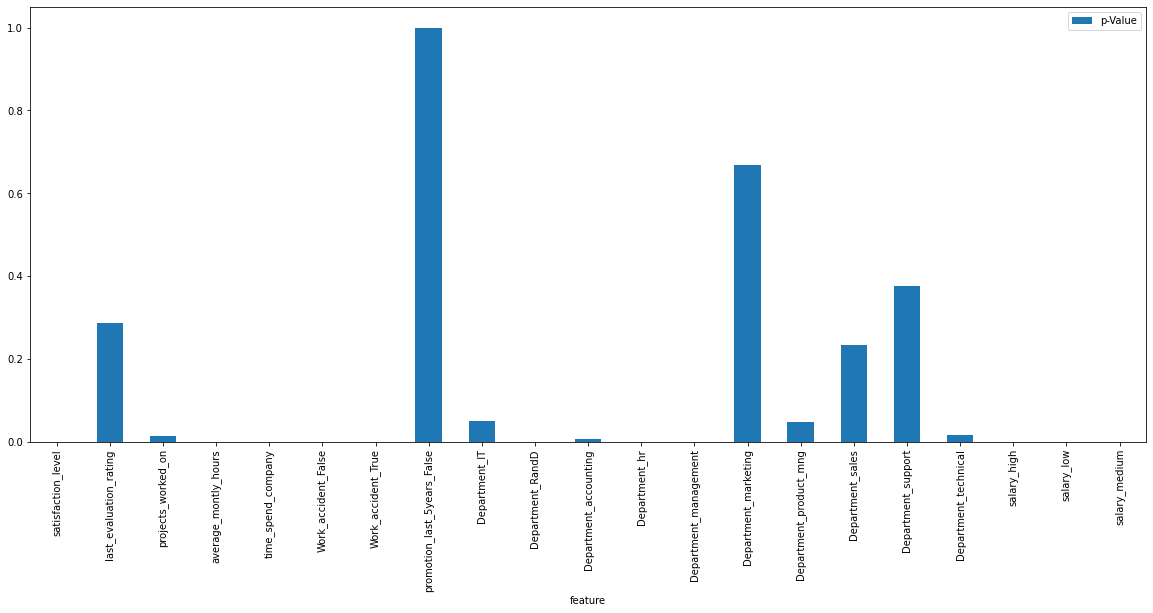

In [34]:
chi_square_result_df.plot(x="feature", y=["p-Value"], kind="bar", figsize=(20, 8))

In [16]:
dill_dump_session('7.1_Hypothesis_testing_chi_square_test_for_independence_completed')

## 7.2 Point-Biserial Correlation Test

In [17]:
eda_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [19]:
pbc_eda_df = eda_df.copy()
print(pbc_eda_df.shape)
pbc_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [24]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Point-Biserial Correlation Test b/w {x} & {y}..".format(x='Attrition', y=columns))
    result = stats.pointbiserialr(pbc_eda_df['Attrition'], pbc_eda_df[columns])
    print(result)



Running Point-Biserial Correlation Test b/w Attrition & satisfaction_level..
PointbiserialrResult(correlation=-0.38858874476872907, pvalue=0.0)


Running Point-Biserial Correlation Test b/w Attrition & last_evaluation_rating..
PointbiserialrResult(correlation=0.010659505018334415, pvalue=0.09613172148888839)


Running Point-Biserial Correlation Test b/w Attrition & projects_worked_on..
PointbiserialrResult(correlation=0.02407425421515164, pvalue=0.0001710534130398026)


Running Point-Biserial Correlation Test b/w Attrition & average_montly_hours..
PointbiserialrResult(correlation=0.07690118177461228, pvalue=2.7424865413327886e-33)


Running Point-Biserial Correlation Test b/w Attrition & time_spend_company..
PointbiserialrResult(correlation=0.2683584836071367, pvalue=0.0)


## 7.3 Grubb's Test For Outlier Detection

In [26]:
grbt_eda_df = eda_df.copy()
print(grbt_eda_df.shape)
grbt_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [30]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Grubb's Test for column = {x}..".format(x=columns))
    result = grubbs_test.test(grbt_eda_df[columns], alpha=.05)
    print("# of data points - outliers = ", len(result))



Running Grubb's Test for column = satisfaction_level..
# of data points - outliers =  24367


Running Grubb's Test for column = last_evaluation_rating..
# of data points - outliers =  24367


Running Grubb's Test for column = projects_worked_on..
# of data points - outliers =  24367


Running Grubb's Test for column = average_montly_hours..
# of data points - outliers =  24367


Running Grubb's Test for column = time_spend_company..
# of data points - outliers =  24367


## 7.4 Shapiro Wilk Test For Check Of Normality

In [43]:
swt_eda_df = eda_df.copy()
print(swt_eda_df.shape)
swt_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [38]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Shapiro-Wilk Test for column = {x}..".format(x=columns))
    swt_statistics, p_value = shapiro(swt_eda_df[columns])
    print("Statistics={swt_statistics}, p_value={p_value}..".format(swt_statistics=swt_statistics, p_value=p_value))
    if p_value > 0.05:
        print("Data for this column follows Gaussian distribution..")
    else:
        print("Data for this column does *NOT* follows Gaussian distribution..")



Running Shapiro-Wilk Test for column = satisfaction_level..
Statistics=0.9511915445327759, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = last_evaluation_rating..
Statistics=0.9507402181625366, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = projects_worked_on..
Statistics=0.9390016198158264, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = average_montly_hours..
Statistics=0.9661761522293091, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = time_spend_company..
Statistics=0.8579546213150024, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


c:\users\nalin sharma\my_env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


NOTE - The warning message states that : "c:\users\nalin sharma\my_env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")".. Hence go for another test, one more time..

## 7.5 Anderson-Darling Test For Check Of Normality

In [47]:
adt_eda_df = eda_df.copy()
print(adt_eda_df.shape)
adt_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [5]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Anderson-Darling Test for column = {x}..".format(x=columns))
    ad_result = anderson(adt_eda_df[columns])
    print(ad_result)
    
    ad_test_stastistic_value = ad_result[0]
    ad_critical_value_15_percent = ad_result[1][0]
    ad_critical_value_5_percent = ad_result[1][2]
    
    if ad_test_stastistic_value > ad_critical_value_5_percent:
        print("Data for this column does *NOT* follows Gaussian distribution at 5% significance level..")
    elif ad_test_stastistic_value <= ad_critical_value_5_percent:
        print("Data for this column does follows Gaussian distribution at 5% significance level..")

    if ad_test_stastistic_value > ad_critical_value_15_percent:
        print("Data for this column does *NOT* follows Gaussian distribution at 15% significance level..")
    elif ad_test_stastistic_value <= ad_critical_value_15_percent:
        print("Data for this column does follows Gaussian distribution at 15% significance level..")



Running Anderson-Darling Test for column = satisfaction_level..
AndersonResult(statistic=280.61752656256795, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Data for this column does *NOT* follows Gaussian distribution at 5% significance level..
Data for this column does *NOT* follows Gaussian distribution at 15% significance level..


Running Anderson-Darling Test for column = last_evaluation_rating..
AndersonResult(statistic=374.2689641684119, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Data for this column does *NOT* follows Gaussian distribution at 5% significance level..
Data for this column does *NOT* follows Gaussian distribution at 15% significance level..


Running Anderson-Darling Test for column = projects_worked_on..
AndersonResult(statistic=592.4144929265822, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significanc

In [49]:
dill_dump_session('7.5_hypothesis_testing_completed')

# 8. Data Processing - After Doing EDA & Hypothesis Testing

In [4]:
dill_load_session('7.5_hypothesis_testing_completed')

In [6]:
dp_atfer_eda_and_ht_eda_df = eda_df.copy()
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [7]:
dp_atfer_eda_and_ht_original_dpp_all_outliers_removed_df = original_dpp_all_outliers_removed_df.copy()
print(dp_atfer_eda_and_ht_original_dpp_all_outliers_removed_df.shape)
dp_atfer_eda_and_ht_original_dpp_all_outliers_removed_df.head(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3          False   
1                   272                   6          False   
2                   282                   4          False   
3                   169                   3          False   
4                   163                   3          False   
5                   257                   4          False   
6                   269                   5          False   
7                   234                   5          False   
8                   152                   3          False   
9                   315                   4          False   

   promotion_last_5years Department  salary  Attrition  
0                  False      sales     low          1  
1                  False      sales  medium          1  
2                  False      sales  medium          1  
3                  False      sales     low          1  
4                  False      sales     low          1  
5                  False      sales     low          1  
6                  False      sales     low          1  
7                  False      sales     low          1  
8                  False      sales     low          1  
9                  False      sales     low          1

## 8.1 Remove Redundant Columns

### 8.1.1 Removing Column - Promotion Last 5 Years

In [13]:
pl5y_pt = PrettyTable()
pl5y_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
pl5y_pt.add_row(["Promotion Last 5 Years", "NaN", 1.00])
print(pl5y_pt)

+------------------------+---------------------------+------------------------------------------------+
|      Feature Name      | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+------------------------+---------------------------+------------------------------------------------+
| Promotion Last 5 Years |            NaN            |                      1.0                       |
+------------------------+---------------------------+------------------------------------------------+


In [17]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('promotion_last_5years_False', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 22)
After Removing :  (24367, 21)


### 8.1.2 Removing Column - Department Marketing

In [14]:
dept_mkt_pt = PrettyTable()
dept_mkt_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
dept_mkt_pt.add_row(["Department Marketing", 0.002833, 0.667])
print(dept_mkt_pt)

+----------------------+---------------------------+------------------------------------------------+
|     Feature Name     | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+----------------------+---------------------------+------------------------------------------------+
| Department Marketing |          0.002833         |                     0.667                      |
+----------------------+---------------------------+------------------------------------------------+


In [18]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('Department_marketing', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 21)
After Removing :  (24367, 20)


### 8.1.3 Removing Column - Department Sales

In [19]:
dept_sales_pt = PrettyTable()
dept_sales_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
dept_sales_pt.add_row(["Department Sales", 0.00895, 0.232])
print(dept_sales_pt)

+------------------+---------------------------+------------------------------------------------+
|   Feature Name   | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+------------------+---------------------------+------------------------------------------------+
| Department Sales |          0.00895          |                     0.232                      |
+------------------+---------------------------+------------------------------------------------+


In [21]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('Department_sales', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 20)
After Removing :  (24367, 19)


### 8.1.4 Removing Column - Department Support

In [20]:
dept_spt_pt = PrettyTable()
dept_spt_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
dept_spt_pt.add_row(["Department Support", 0.006161, 0.375])
print(dept_spt_pt)

+--------------------+---------------------------+------------------------------------------------+
|    Feature Name    | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+--------------------+---------------------------+------------------------------------------------+
| Department Support |          0.006161         |                     0.375                      |
+--------------------+---------------------------+------------------------------------------------+


In [22]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('Department_support', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 19)
After Removing :  (24367, 18)


In [23]:
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

## 8.2 Make Columns Follow Normal Distribution

### 8.2.1 satisfaction_level

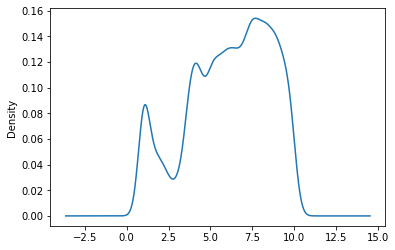

In [25]:
dp_atfer_eda_and_ht_eda_df['satisfaction_level'].plot(kind='kde')

In [27]:
satisfaction_level_df = dp_atfer_eda_and_ht_eda_df['satisfaction_level']
satisfaction_level_df.head(10)

0    3.8
1    8.0
2    1.1
3    3.7
4    4.1
5    1.0
6    9.2
7    8.9
8    4.2
9    1.1
Name: satisfaction_level, dtype: float64

In [54]:
# data = satisfaction_level_df.to_numpy()           # Numpy arrays are easier for 1D data
# mu, std = norm.fit(data)                          # Fit a normal distribution
# print("Mu and Std: ", mu, std)

# CI_95 = norm.interval(0.95, loc=mu, scale=std)    # Find the 95% CI endpoints
# print("Confidence Interval: ", CI_95)

# plt.vlines(CI_95, ymin=0, ymax=0.4)               # plotting stuff
# x = np.linspace(mu - 3*std, mu + 3*std, 100)
# plt.plot(x, norm.pdf(x, mu, std))
# plt.show()

0.09917309986358243


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

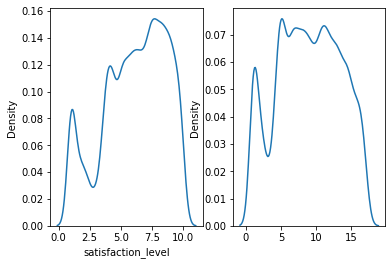

In [78]:
fitted_data_satisfaction_level_df_boxcox, fitted_lambda_satisfaction_level_df_boxcox = boxcox(np.exp(satisfaction_level_df))
print(fitted_lambda_satisfaction_level_df_boxcox)

fig, ax = plt.subplots(1, 2)  
sns.distplot(satisfaction_level_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_satisfaction_level_df_boxcox, hist = False, kde = True, ax = ax[1])

1.3649659388671584


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

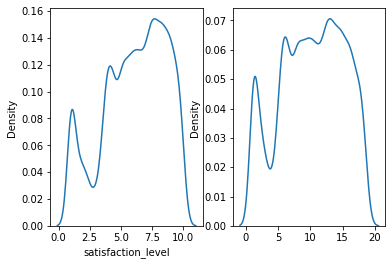

In [79]:
fitted_data_satisfaction_level_df_yeojohnson, fitted_lambda_satisfaction_level_df_yeojohnson = yeojohnson(satisfaction_level_df)
print(fitted_lambda_satisfaction_level_df_yeojohnson)

fig, ax = plt.subplots(1, 2)  
sns.distplot(satisfaction_level_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_satisfaction_level_df_yeojohnson, hist = False, kde = True, ax = ax[1])

Text(0.5, 0, '')

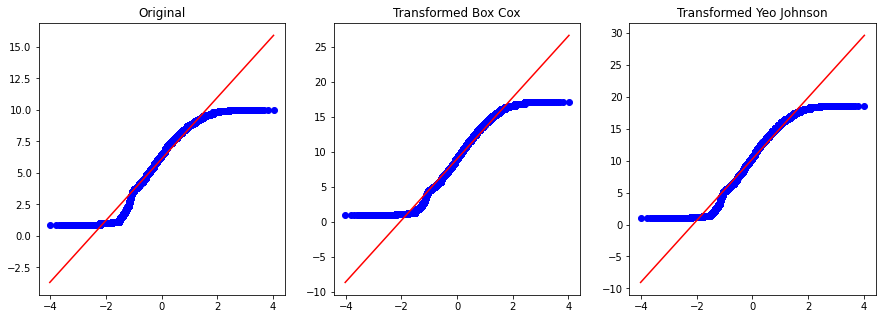

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

prob = stats.probplot(satisfaction_level_df, dist=stats.norm, plot=ax1)
prob = stats.probplot(fitted_data_satisfaction_level_df_boxcox, dist=stats.norm, plot=ax2)
prob = stats.probplot(fitted_data_satisfaction_level_df_yeojohnson, dist=stats.norm, plot=ax3)

ax1.set_title('Original')
ax2.set_title('Transformed Box Cox')
ax3.set_title('Transformed Yeo Johnson')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

In [85]:
chi_value_satisfaction_level, p_value_satisfaction_level = stats.normaltest(fitted_data_satisfaction_level_df_boxcox)
print(chi_value_satisfaction_level, p_value_satisfaction_level)

# fail to reject the null hypothesis..
if p_value_satisfaction_level > 0.05:
    print('Data looks like Gaussian..')
    
# reject the null hypothesis..    
else:
    print('Data does *NOT* looks like Gaussian..')

4863.495522073263 0.0
Data does *NOT* looks like Gaussian..


### 8.2.2 last_evaluation_rating

<AxesSubplot:ylabel='Density'>

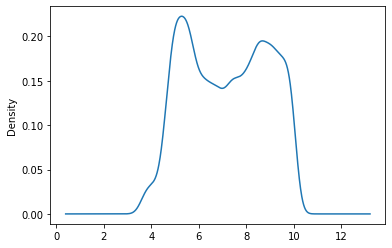

In [53]:
dp_atfer_eda_and_ht_eda_df['last_evaluation_rating'].plot(kind='kde')

In [55]:
last_evaluation_rating_df = dp_atfer_eda_and_ht_eda_df['last_evaluation_rating']
last_evaluation_rating_df.head(10)

0     5.3
1     8.6
2     8.8
3     5.2
4     5.0
5     7.7
6     8.5
7    10.0
8     5.3
9     8.1
Name: last_evaluation_rating, dtype: float64

<AxesSubplot:ylabel='Density'>

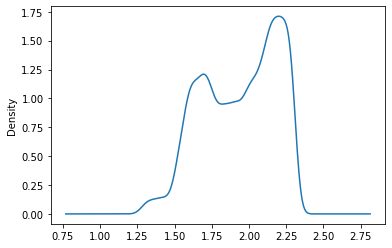

In [56]:
np.log(last_evaluation_rating_df).plot(kind='kde')

0.8055331152889095


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

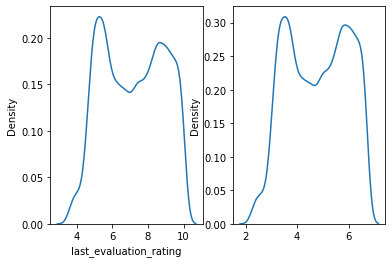

In [86]:
fitted_data_last_evaluation_rating_df_boxcox, fitted_lambda_last_evaluation_rating_df_boxcox = boxcox(last_evaluation_rating_df)
print(fitted_lambda_last_evaluation_rating_df_boxcox)

fig, ax = plt.subplots(1, 2)  
sns.distplot(last_evaluation_rating_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_last_evaluation_rating_df_boxcox, hist = False, kde = True, ax = ax[1])

1.3649659388671584


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

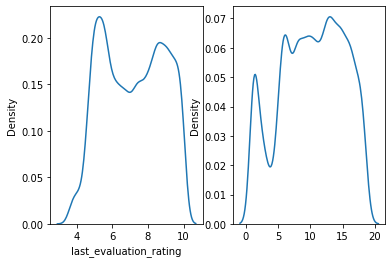

In [87]:
fitted_data_last_evaluation_rating_df_yeojohnson, fitted_lambda_last_evaluation_rating_df_yeojohnson = yeojohnson(satisfaction_level_df)
print(fitted_lambda_last_evaluation_rating_df_yeojohnson)

fig, ax = plt.subplots(1, 2)  
sns.distplot(last_evaluation_rating_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_last_evaluation_rating_df_yeojohnson, hist = False, kde = True, ax = ax[1])

Text(0.5, 0, '')

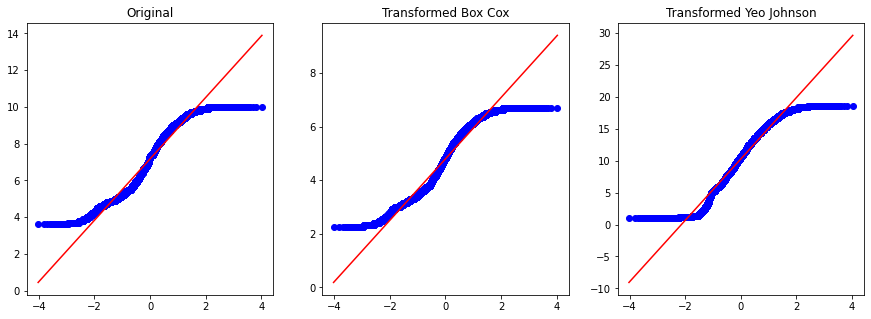

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

prob = stats.probplot(last_evaluation_rating_df, dist=stats.norm, plot=ax1)
prob = stats.probplot(fitted_data_last_evaluation_rating_df_boxcox, dist=stats.norm, plot=ax2)
prob = stats.probplot(fitted_data_last_evaluation_rating_df_yeojohnson, dist=stats.norm, plot=ax3)

ax1.set_title('Original')
ax2.set_title('Transformed Box Cox')
ax3.set_title('Transformed Yeo Johnson')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

In [89]:
chi_value_last_evaluation_rating, p_value_last_evaluation_rating = stats.normaltest(fitted_data_last_evaluation_rating_df_yeojohnson)
print(chi_value_last_evaluation_rating, p_value_last_evaluation_rating)

# fail to reject the null hypothesis..
if p_value_last_evaluation_rating > 0.05:
    print('Data looks like Gaussian..')
    
# reject the null hypothesis..    
else:
    print('Data does *NOT* looks like Gaussian..')

4215.792427692439 0.0
Data does *NOT* looks like Gaussian..


NOTE - Since both are bimodal, it's shown that transforming them into sinlge mode normal distribution doesn't work..

## 8.3 Dealing With Class Imbalance via SMOTE (Synthetic Minority Over-sampling TEchnique)

In [91]:
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [92]:
dp_atfer_eda_and_ht_eda_df['Attrition'].value_counts()

0    18403
1     5964
Name: Attrition, dtype: int64

In [93]:
x_dp_atfer_eda_and_ht_eda_df = dp_atfer_eda_and_ht_eda_df.loc[:, dp_atfer_eda_and_ht_eda_df.columns != 'Attrition']
y_dp_atfer_eda_and_ht_eda_df = dp_atfer_eda_and_ht_eda_df.loc[:, dp_atfer_eda_and_ht_eda_df.columns == 'Attrition']

In [94]:
x_dp_atfer_eda_and_ht_eda_df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0

In [96]:
y_dp_atfer_eda_and_ht_eda_df.head(10)

Attrition
0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1

In [99]:
# k_neighbors, default=5..
sm = SMOTE(random_state=42)

x_dp_atfer_eda_and_ht_eda_smote_df, y_dp_atfer_eda_and_ht_eda_smote_df = sm.fit_resample(x_dp_atfer_eda_and_ht_eda_df, y_dp_atfer_eda_and_ht_eda_df)

print("df.shape before SMOTE = ", x_dp_atfer_eda_and_ht_eda_df.shape)
print("df.shape after SMOTE = ", x_dp_atfer_eda_and_ht_eda_smote_df.shape)

print('\n\nDivision among classes = ')
y_dp_atfer_eda_and_ht_eda_smote_df.value_counts(normalize=True) * 100

df.shape before SMOTE =  (24367, 17)
df.shape after SMOTE =  (36806, 17)


Division among classes = 


Attrition
0            50.0
1            50.0
dtype: float64

In [100]:
smote_df = pd.concat([x_dp_atfer_eda_and_ht_eda_smote_df, y_dp_atfer_eda_and_ht_eda_smote_df], axis=1)
smote_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [101]:
smote_df['Attrition'].value_counts()

0    18403
1    18403
Name: Attrition, dtype: int64

## 8.4 Standardization & Normalization Of SMOTE generated dataset

In [102]:
smote_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

### 8.4.1 Standardization Of SMOTE generated dataset

In [105]:
smote_standardized_df = smote_df.copy()
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [104]:
standardize_these_columns_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [106]:
std_scaler_smote = StandardScaler()
smote_standardized_df[standardize_these_columns_smote] = std_scaler_smote.fit_transform(smote_standardized_df[standardize_these_columns_smote])

In [107]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

### 8.4.2 Normalization Of SMOTE generated dataset

In [108]:
smote_normalized_df = smote_df.copy()
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [109]:
normalize_these_columns_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [110]:
min_max_scaler_smote = MinMaxScaler()
smote_normalized_df[normalize_these_columns_smote] = min_max_scaler_smote.fit_transform(smote_normalized_df[normalize_these_columns_smote])

In [112]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

## 8.5 Standardization & Normalization Of NON-SMOTE generated dataset

In [113]:
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

### 8.5.1 Standardization Of NON-SMOTE generated dataset

In [114]:
non_smote_standardized_df = dp_atfer_eda_and_ht_eda_df.copy()
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [117]:
standardize_these_columns_non_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [118]:
std_scaler_non_smote = StandardScaler()
non_smote_standardized_df[standardize_these_columns_non_smote] = std_scaler_non_smote.fit_transform(non_smote_standardized_df[standardize_these_columns_non_smote])

In [119]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

### 8.5.2 Normalization Of NON-SMOTE generated dataset

In [120]:
non_smote_normalized_df = dp_atfer_eda_and_ht_eda_df.copy()
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [121]:
normalize_these_columns_non_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [122]:
min_max_scaler_non_smote = MinMaxScaler()
non_smote_normalized_df[normalize_these_columns_non_smote] = min_max_scaler_non_smote.fit_transform(non_smote_normalized_df[normalize_these_columns_non_smote])

In [123]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

## 8.6 Export To CSV's

In [169]:
smote_standardized_df.to_csv('../save/csv/8.4.1_smote_standardized_df.csv', index=False)

In [170]:
smote_normalized_df.to_csv('../save/csv/8.4.2_smote_normalized_df.csv', index=False)

In [171]:
non_smote_standardized_df.to_csv('../save/csv/8.5.1_non_smote_standardized_df.csv', index=False)

In [172]:
non_smote_normalized_df.to_csv('../save/csv/8.5.2_non_smote_normalized_df.csv', index=False)

In [173]:
dill_dump_session('8.6_data_processing_after_doing_eda_and_hypothesis_testing_and_exporting_csv_completed')

# 9 ML Algorithms 1 - kNN (k-Nearest Neighbours)

In [4]:
dill_load_session('8.6_data_processing_after_doing_eda_and_hypothesis_testing_and_exporting_csv_completed')

## 9.1 k-NN On SMOTE Standardized Data

In [92]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [93]:
x_smote_standardized = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [94]:
# splitting into train & test set..
x_train_smote_standardized, x_test_smote_standardized, y_train_smote_standardized, y_test_smote_standardized = train_test_split(x_smote_standardized, y_smote_standardized, test_size = 0.20, stratify=y_smote_standardized)

# splitting train set into train and cv sets..
x_train_smote_standardized, x_cv_smote_standardized, y_train_smote_standardized, y_cv_smote_standardized = train_test_split(x_train_smote_standardized, y_train_smote_standardized, test_size = 0.20, stratify=y_train_smote_standardized)

print("len(x_train_smote_standardized) = ", len(x_train_smote_standardized))
print("len(y_train_smote_standardized) = ", len(y_train_smote_standardized))

print("\nlen(x_x_cv_smote_standardizedcv) = ", len(x_cv_smote_standardized))
print("len(y_cv_smote_standardized) = ", len(y_cv_smote_standardized))

print("\nlen(x_test_smote_standardized) = ", len(x_test_smote_standardized))
print("len(y_test_smote_standardized) = ", len(y_test_smote_standardized))

len(x_train_smote_standardized) =  23555
len(y_train_smote_standardized) =  23555

len(x_x_cv_smote_standardizedcv) =  5889
len(y_cv_smote_standardized) =  5889

len(x_test_smote_standardized) =  7362
len(y_test_smote_standardized) =  7362


In [225]:
def kNN_smote(x_train, y_train, x_cv, y_cv):
    
    k_values_smote = []
    auc_train_smote = []
    auc_cv_smote = []
    
    for k in tqdm_notebook(range(1, 32, 2)):
        
        # getting only odd 'k' values..double check..
        if k % 2 != 0 :
            k_values_smote.append(k)

            knn_smote = KNeighborsClassifier(n_neighbors=k, algorithm='brute', weights='uniform', n_jobs=12)
            knn_smote.fit(x_train, y_train)

            y_train_pred = knn_smote.predict_proba(x_train)[:, 1]
            y_cv_pred = knn_smote.predict_proba(x_cv)[:, 1]

            train_auc_score_smote = roc_auc_score(y_train, y_train_pred)
            cv_auc_score_smote = roc_auc_score(y_cv, y_cv_pred)
            
            auc_train_smote.append(train_auc_score_smote)
            auc_cv_smote.append(cv_auc_score_smote)

            print("\nTrain_AUC for k={0} is {1}..".format(k, train_auc_score_smote))
            print("CV_AUC for k={0} is {1}..".format(k, cv_auc_score_smote))
        
    return k_values_smote, auc_train_smote, auc_cv_smote

In [226]:
k_values_smote_standardized, auc_train_smote_standardized, auc_cv_smote_standardized = kNN_smote(x_train_smote_standardized, y_train_smote_standardized, x_cv_smote_standardized, y_cv_smote_standardized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_AUC for k=1 is 1.0..
CV_AUC for k=1 is 0.9738478191666051..

Train_AUC for k=3 is 0.9993012447178637..
CV_AUC for k=3 is 0.9871468314017864..

Train_AUC for k=5 is 0.998276722288954..
CV_AUC for k=5 is 0.9888845316306194..

Train_AUC for k=7 is 0.9971916812968825..
CV_AUC for k=7 is 0.9904699264597329..

Train_AUC for k=9 is 0.9962606420067561..
CV_AUC for k=9 is 0.9901016484276961..

Train_AUC for k=11 is 0.9953715789312955..
CV_AUC for k=11 is 0.9897940964789251..

Train_AUC for k=13 is 0.9945293907974843..
CV_AUC for k=13 is 0.9898199901269655..

Train_AUC for k=15 is 0.9937182711904402..
CV_AUC for k=15 is 0.9892309528862478..

Train_AUC for k=17 is 0.9929820527224716..
CV_AUC for k=17 is 0.988626690872518..

Train_AUC for k=19 is 0.992342536350753..
CV_AUC for k=19 is 0.9881585291023842..

Train_AUC for k=21 is 0.9918153122108301..
CV_AUC for k=21 is 0.9877313704141139..

Train_AUC for k=23 is 0.9913374826668334..
CV_AUC for k=23 is 0.987399481896361..

Train_AUC for k=25 i

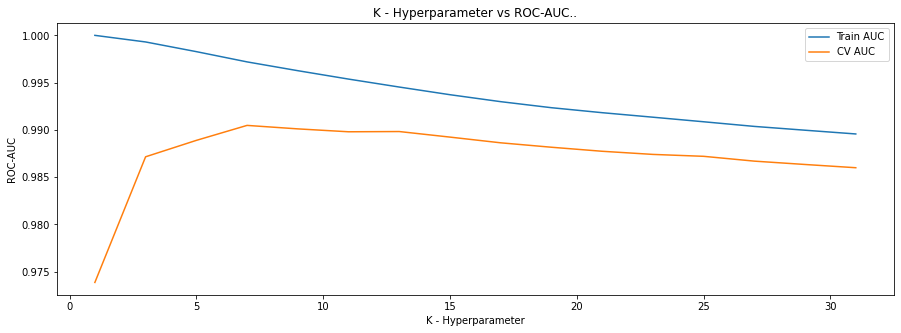

In [227]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_smote_standardized, auc_train_smote_standardized, label='Train AUC')
plt.plot(k_values_smote_standardized, auc_cv_smote_standardized, label='CV AUC')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('ROC-AUC')
plt.title('K - Hyperparameter vs ROC-AUC..')
plt.show()

In [228]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_smote_standardized = 7
print("From the above graph, we take best 'k' to be {0}..".format(best_k_smote_standardized))

knn_smote_standardized = KNeighborsClassifier(n_neighbors=best_k_smote_standardized, algorithm='brute', weights='uniform', n_jobs=12)
knn_smote_standardized.fit(x_train_smote_standardized, y_train_smote_standardized)

y_train_pred_smote_standardized = knn_smote_standardized.predict_proba(x_train_smote_standardized)[:,1]
y_test_pred_smote_standardized = knn_smote_standardized.predict_proba(x_test_smote_standardized)[:,1]

From the above graph, we take best 'k' to be 7..


In [229]:
# test_accuracy_score_smote = accuracy_score(y_test_smote_standardized, y_test_pred_smote_standardized.round(), normalize=True) * 100
# print("Test Accuracy = ", test_accuracy_score_smote)

Train -> True Positive Rate =  0.8670949968394139
Train -> False Positive Rate =  0.16028942850134906
Test -> True Positive Rate =  0.8637447553502973
Test -> False Positive Rate =  0.16698360952639682

Train AUC =  0.9971916812968825
Test AUC =  0.9897501513126319


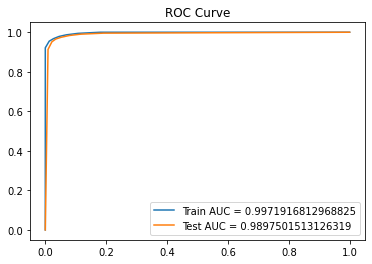

In [230]:
# Plotting ROC Curve..
train_fpr_smote_standardized, train_tpr_smote_standardized, _ = roc_curve(y_train_smote_standardized, y_train_pred_smote_standardized)
test_fpr_smote_standardized, test_tpr_smote_standardized, _ = roc_curve(y_test_smote_standardized, y_test_pred_smote_standardized)

print("Train -> True Positive Rate = ", train_tpr_smote_standardized.mean())
print("Train -> False Positive Rate = ", train_fpr_smote_standardized.mean())
print("Test -> True Positive Rate = ", test_tpr_smote_standardized.mean())
print("Test -> False Positive Rate = ", test_fpr_smote_standardized.mean())

train_auc_smote_standardized = auc(train_fpr_smote_standardized, train_tpr_smote_standardized)
test_auc_smote_standardized = auc(test_fpr_smote_standardized, test_tpr_smote_standardized)

print("\nTrain AUC = ", train_auc_smote_standardized)
print("Test AUC = ", test_auc_smote_standardized)

plt.plot(train_fpr_smote_standardized, train_tpr_smote_standardized, label="Train AUC = {0}".format(str(train_auc_smote_standardized)))
plt.plot(test_fpr_smote_standardized, test_tpr_smote_standardized, label="Test AUC = {0}".format(str(test_auc_smote_standardized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


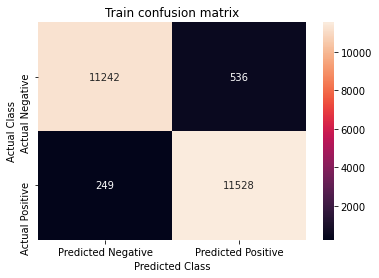

[[11242   536]
 [  249 11528]]


In [231]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_smote_standardized = confusion_matrix(y_train_smote_standardized, knn_smote_standardized.predict(x_train_smote_standardized))
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_train_smote_standardized_df = pd.DataFrame(cm_train_smote_standardized, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_train_smote_standardized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_smote_standardized)

Test confusion matrix :


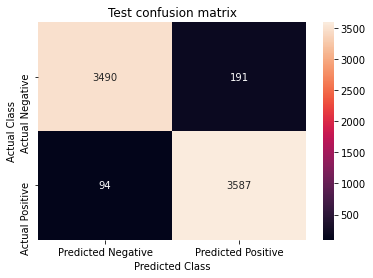

[[3490  191]
 [  94 3587]]


In [232]:
print("Test confusion matrix :")
cm_test_smote_standardized = confusion_matrix(y_test_smote_standardized, knn_smote_standardized.predict(x_test_smote_standardized))
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_df = pd.DataFrame(cm_test_smote_standardized, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized)

In [233]:
_, _, false_negative_smote_standardized, true_positive_smote_standardized = cm_test_smote_standardized.ravel()

# false_negative_smote_standardized = cm_test_smote_standardized[1][0]
# true_positive_smote_standardized = cm_test_smote_standardized[1][1]

# print(false_negative_smote_standardized)
# print(true_positive_smote_standardized)

print("False Negative Rate = ", (false_negative_smote_standardized/(false_negative_smote_standardized+true_positive_smote_standardized)) * 100, "%")

False Negative Rate =  2.5536538983971746 %


In [263]:
print(classification_report(y_test_smote_standardized, knn_smote_standardized.predict(x_test_smote_standardized)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3681
           1       0.95      0.97      0.96      3681

    accuracy                           0.96      7362
   macro avg       0.96      0.96      0.96      7362
weighted avg       0.96      0.96      0.96      7362



## 9.2 k-NN On SMOTE Normalized Data

In [104]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [105]:
x_smote_normalized = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [106]:
# splitting into train & test set..
x_train_smote_normalized, x_test_smote_normalized, y_train_smote_normalized, y_test_smote_normalized = train_test_split(x_smote_normalized, y_smote_normalized, test_size = 0.20, stratify=y_smote_normalized)

# splitting train set into train and cv sets..
x_train_smote_normalized, x_cv_smote_normalized, y_train_smote_normalized, y_cv_smote_normalized = train_test_split(x_train_smote_normalized, y_train_smote_normalized, test_size = 0.20, stratify=y_train_smote_normalized)

print("len(x_train_smote_normalized) = ", len(x_train_smote_normalized))
print("len(y_train_smote_normalized) = ", len(y_train_smote_normalized))

print("\nlen(x_cv_smote_normalized) = ", len(x_cv_smote_normalized))
print("len(y_cv_smote_normalized) = ", len(y_cv_smote_normalized))

print("\nlen(x_test_smote_normalized) = ", len(x_test_smote_normalized))
print("len(y_test_smote_normalized) = ", len(y_test_smote_normalized))

len(x_train_smote_normalized) =  23555
len(y_train_smote_normalized) =  23555

len(x_cv_smote_normalized) =  5889
len(y_cv_smote_normalized) =  5889

len(x_test_smote_normalized) =  7362
len(y_test_smote_normalized) =  7362


In [234]:
k_values_smote_normalized, auc_train_smote_normalized, auc_cv_smote_normalized = kNN_smote(x_train_smote_normalized, y_train_smote_normalized, x_cv_smote_normalized, y_cv_smote_normalized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_AUC for k=1 is 1.0..
CV_AUC for k=1 is 0.9762284777072414..

Train_AUC for k=3 is 0.9993025856497535..
CV_AUC for k=3 is 0.9864479912526759..

Train_AUC for k=5 is 0.998280615317021..
CV_AUC for k=5 is 0.9878826377611278..

Train_AUC for k=7 is 0.9972602562653492..
CV_AUC for k=7 is 0.9885347655384956..

Train_AUC for k=9 is 0.9961897852912835..
CV_AUC for k=9 is 0.9884201760537388..

Train_AUC for k=11 is 0.995119350363774..
CV_AUC for k=11 is 0.9887420300620063..

Train_AUC for k=13 is 0.9940781527979776..
CV_AUC for k=13 is 0.9882363253856942..

Train_AUC for k=15 is 0.9930640189865574..
CV_AUC for k=15 is 0.9876572649848675..

Train_AUC for k=17 is 0.9921486022738772..
CV_AUC for k=17 is 0.9871494842031447..

Train_AUC for k=19 is 0.9913082561190867..
CV_AUC for k=19 is 0.9863789030781724..

Train_AUC for k=21 is 0.9905075395481546..
CV_AUC for k=21 is 0.9855917707795084..

Train_AUC for k=23 is 0.9897775715530268..
CV_AUC for k=23 is 0.9846722867609065..

Train_AUC for k=25

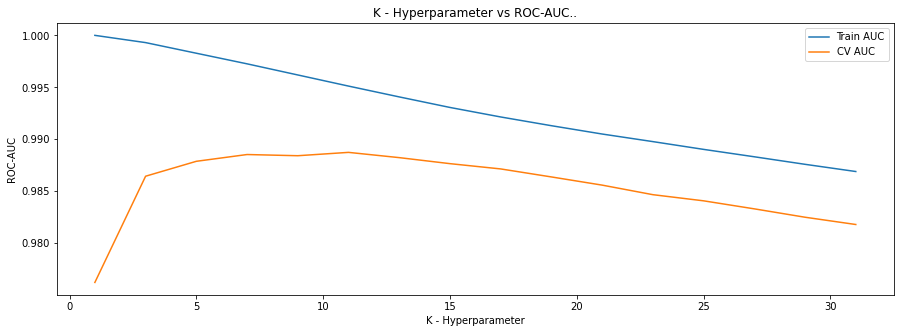

In [235]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_smote_normalized, auc_train_smote_normalized, label='Train AUC')
plt.plot(k_values_smote_normalized, auc_cv_smote_normalized, label='CV AUC')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('ROC-AUC')
plt.title('K - Hyperparameter vs ROC-AUC..')
plt.show()

In [236]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_smote_normalized = 9
print("From the above graph, we take best 'k' to be {0}..".format(best_k_smote_normalized))

knn_smote_normalized = KNeighborsClassifier(n_neighbors=best_k_smote_normalized, algorithm='brute', weights='uniform', n_jobs=12)
knn_smote_normalized.fit(x_train_smote_normalized, y_train_smote_normalized)

y_train_pred_smote_normalized = knn_smote_normalized.predict_proba(x_train_smote_normalized)[:,1]
y_test_pred_smote_normalized = knn_smote_normalized.predict_proba(x_test_smote_normalized)[:,1]

From the above graph, we take best 'k' to be 9..


In [237]:
# test_accuracy_score_smote_normalized = accuracy_score(y_test_smote_normalized, y_test_pred_smote_normalized.round(), normalize=True) * 100
# print("Test Accuracy = ", test_accuracy_score_smote_normalized)

Train -> True Positive Rate =  0.8823152564874419
Train -> False Positive Rate =  0.14940523516561557
Test -> True Positive Rate =  0.8773060680151145
Test -> False Positive Rate =  0.15838087476229284

Train AUC =  0.9961897852912835
Test AUC =  0.9865048911194818


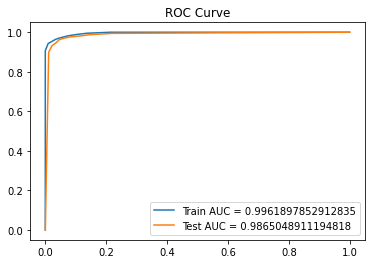

In [238]:
# Plotting ROC Curve..
train_fpr_smote_normalized, train_tpr_smote_normalized, _ = roc_curve(y_train_smote_normalized, y_train_pred_smote_normalized)
test_fpr_smote_normalized, test_tpr_smote_normalized, _ = roc_curve(y_test_smote_normalized, y_test_pred_smote_normalized)

print("Train -> True Positive Rate = ", train_tpr_smote_normalized.mean())
print("Train -> False Positive Rate = ", train_fpr_smote_normalized.mean())
print("Test -> True Positive Rate = ", test_tpr_smote_normalized.mean())
print("Test -> False Positive Rate = ", test_fpr_smote_normalized.mean())

train_auc_smote_normalized = auc(train_fpr_smote_normalized, train_tpr_smote_normalized)
test_auc_smote_normalized = auc(test_fpr_smote_normalized, test_tpr_smote_normalized)

print("\nTrain AUC = ", train_auc_smote_normalized)
print("Test AUC = ", test_auc_smote_normalized)

plt.plot(train_fpr_smote_normalized, train_tpr_smote_normalized, label="Train AUC = {0}".format(str(train_auc_smote_normalized)))
plt.plot(test_fpr_smote_normalized, test_tpr_smote_normalized, label="Test AUC = {0}".format(str(test_auc_smote_normalized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


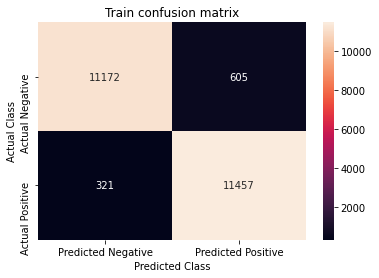

[[11172   605]
 [  321 11457]]


In [239]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_smote_normalized = confusion_matrix(y_train_smote_normalized, knn_smote_normalized.predict(x_train_smote_normalized))
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_train_smote_normalized_df = pd.DataFrame(cm_train_smote_normalized, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_train_smote_normalized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_smote_normalized)

Test confusion matrix :


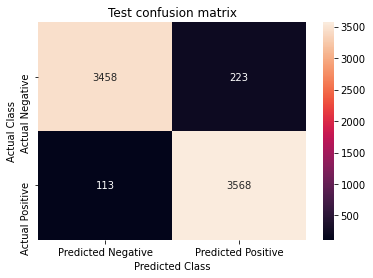

[[3458  223]
 [ 113 3568]]


In [240]:
print("Test confusion matrix :")
cm_test_smote_normalized = confusion_matrix(y_test_smote_normalized, knn_smote_normalized.predict(x_test_smote_normalized))
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_df = pd.DataFrame(cm_test_smote_normalized, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized)

In [241]:
_, _, false_negative_smote_normalized, true_positive_smote_normalized = cm_test_smote_normalized.ravel()

# false_negative_smote_normalized = cm_test_smote_normalized[1][0]
# true_positive_smote_normalized = cm_test_smote_normalized[1][1]

# print(false_negative_smote_normalized)
# print(true_positive_smote_normalized)

print("False Negative Rate = ", (false_negative_smote_normalized/(false_negative_smote_normalized+true_positive_smote_normalized)) * 100, "%")

False Negative Rate =  3.069817984243412 %


In [262]:
print(classification_report(y_test_smote_normalized, knn_smote_normalized.predict(x_test_smote_normalized)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3681
           1       0.94      0.97      0.96      3681

    accuracy                           0.95      7362
   macro avg       0.95      0.95      0.95      7362
weighted avg       0.95      0.95      0.95      7362



## 9.3 k-NN On NON-SMOTE Standardized Data

In [115]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [116]:
x_non_smote_standardized = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [117]:
# splitting into train & test set..
x_train_non_smote_standardized, x_test_non_smote_standardized, y_train_non_smote_standardized, y_test_non_smote_standardized = train_test_split(x_non_smote_standardized, y_non_smote_standardized, test_size = 0.20, stratify=y_non_smote_standardized)

# splitting train set into train and cv sets..
x_train_non_smote_standardized, x_cv_non_smote_standardized, y_train_non_smote_standardized, y_cv_non_smote_standardized = train_test_split(x_train_non_smote_standardized, y_train_non_smote_standardized, test_size = 0.20, stratify=y_train_non_smote_standardized)

print("len(x_train_non_smote_standardized) = ", len(x_train_non_smote_standardized))
print("len(y_train_non_smote_standardized) = ", len(y_train_non_smote_standardized))

print("\nlen(x_cv_non_smote_standardized) = ", len(x_cv_non_smote_standardized))
print("len(y_cv_non_smote_standardized) = ", len(y_cv_non_smote_standardized))

print("\nlen(x_test_non_smote_standardized) = ", len(x_test_non_smote_standardized))
print("len(y_test_non_smote_standardized) = ", len(y_test_non_smote_standardized))

len(x_train_non_smote_standardized) =  15594
len(y_train_non_smote_standardized) =  15594

len(x_cv_non_smote_standardized) =  3899
len(y_cv_non_smote_standardized) =  3899

len(x_test_non_smote_standardized) =  4874
len(y_test_non_smote_standardized) =  4874


In [242]:
def kNN_non_smote(x_train, y_train, x_cv, y_cv):
    
    k_values_non_smote = []
    auc_train_non_smote = []
    auc_cv_non_smote = []
    
    for k in tqdm_notebook(range(1, 32, 2)):
        
        # getting only odd 'k' values..double check..
        if k % 2 != 0 :
            k_values_non_smote.append(k)

            knn_non_smote = KNeighborsClassifier(n_neighbors=k, algorithm='brute', weights='uniform', n_jobs=12)
            knn_non_smote.fit(x_train, y_train)

            y_train_pred = knn_non_smote.predict_proba(x_train)[:, 1]
            y_cv_pred = knn_non_smote.predict_proba(x_cv)[:, 1]

            train_auc_score_non_smote = roc_auc_score(y_train, y_train_pred)
            cv_auc_score_non_smote = roc_auc_score(y_cv, y_cv_pred)

            auc_train_non_smote.append(train_auc_score_non_smote)
            auc_cv_non_smote.append(cv_auc_score_non_smote)

            print("\nTrain_AUC for k={0} is {1}..".format(k, train_auc_score_non_smote))
            print("CV_AUC for k={0} is {1}..".format(k, cv_auc_score_non_smote))
        
    return k_values_non_smote, auc_train_non_smote, auc_cv_non_smote

In [243]:
k_values_non_smote_standardized, auc_train_non_smote_standardized, auc_cv_non_smote_standardized = kNN_non_smote(x_train_non_smote_standardized, y_train_non_smote_standardized, x_cv_non_smote_standardized, y_cv_non_smote_standardized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_AUC for k=1 is 1.0..
CV_AUC for k=1 is 0.9614006613205768..

Train_AUC for k=3 is 0.9988495713360204..
CV_AUC for k=3 is 0.9764346705676751..

Train_AUC for k=5 is 0.99743031631238..
CV_AUC for k=5 is 0.9793419183991627..

Train_AUC for k=7 is 0.9958447646731041..
CV_AUC for k=7 is 0.9806238054051746..

Train_AUC for k=9 is 0.9943496634437239..
CV_AUC for k=9 is 0.9801105522987831..

Train_AUC for k=11 is 0.9930976615944067..
CV_AUC for k=11 is 0.9797743750734109..

Train_AUC for k=13 is 0.9921107710977527..
CV_AUC for k=13 is 0.9794695198129224..

Train_AUC for k=15 is 0.9912430722627367..
CV_AUC for k=15 is 0.9787731399913864..

Train_AUC for k=17 is 0.990437549742442..
CV_AUC for k=17 is 0.9787192163813876..

Train_AUC for k=19 is 0.9896394016222657..
CV_AUC for k=19 is 0.978180158247109..

Train_AUC for k=21 is 0.9889165769373833..
CV_AUC for k=21 is 0.9781646752303765..

Train_AUC for k=23 is 0.9883275814866208..
CV_AUC for k=23 is 0.9784140051894801..

Train_AUC for k=25 i

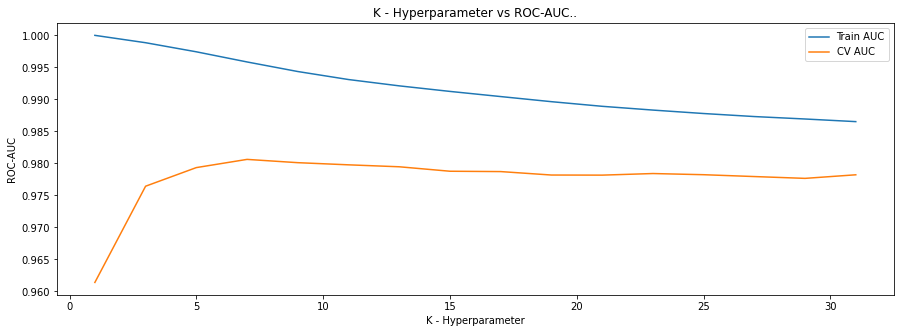

In [244]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_non_smote_standardized, auc_train_non_smote_standardized, label='Train AUC')
plt.plot(k_values_non_smote_standardized, auc_cv_non_smote_standardized, label='CV AUC')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('ROC-AUC')
plt.title('K - Hyperparameter vs ROC-AUC..')
plt.show()

In [245]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_non_smote_standardized = 9
print("From the above graph, we take best 'k' to be {0}..".format(best_k_non_smote_standardized))

knn_non_smote_standardized = KNeighborsClassifier(n_neighbors=best_k_non_smote_standardized, algorithm='brute', weights='uniform', n_jobs=12)
knn_non_smote_standardized.fit(x_train_non_smote_standardized, y_train_non_smote_standardized)

y_train_pred_non_smote_standardized = knn_non_smote_standardized.predict_proba(x_train_non_smote_standardized)[:,1]
y_test_pred_non_smote_standardized = knn_non_smote_standardized.predict_proba(x_test_non_smote_standardized)[:,1]

From the above graph, we take best 'k' to be 9..


In [246]:
# test_accuracy_score_non_smote = accuracy_score(y_test_non_smote_standardized, y_test_pred_non_smote_standardized.round(), normalize=True) * 100
# print("Test Accuracy = ", test_accuracy_score_non_smote)

Train -> True Positive Rate =  0.849763021887727
Train -> False Positive Rate =  0.1301458158043027
Test -> True Positive Rate =  0.8418806675302903
Test -> False Positive Rate =  0.13353584747227779

Train AUC =  0.9943496634437239
Test AUC =  0.9841748695699103


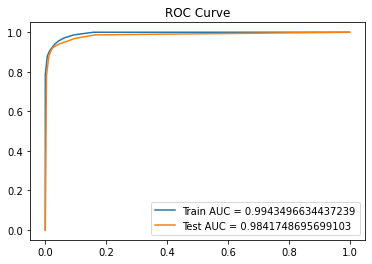

In [247]:
# Plotting ROC Curve..
train_fpr_non_smote_standardized, train_tpr_non_smote_standardized, _ = roc_curve(y_train_non_smote_standardized, y_train_pred_non_smote_standardized)
test_fpr_non_smote_standardized, test_tpr_non_smote_standardized, _ = roc_curve(y_test_non_smote_standardized, y_test_pred_non_smote_standardized)

print("Train -> True Positive Rate = ", train_tpr_non_smote_standardized.mean())
print("Train -> False Positive Rate = ", train_fpr_non_smote_standardized.mean())
print("Test -> True Positive Rate = ", test_tpr_non_smote_standardized.mean())
print("Test -> False Positive Rate = ", test_fpr_non_smote_standardized.mean())

train_auc_non_smote_standardized = auc(train_fpr_non_smote_standardized, train_tpr_non_smote_standardized)
test_auc_non_smote_standardized = auc(test_fpr_non_smote_standardized, test_tpr_non_smote_standardized)

print("\nTrain AUC = ", train_auc_non_smote_standardized)
print("Test AUC = ", test_auc_non_smote_standardized)

plt.plot(train_fpr_non_smote_standardized, train_tpr_non_smote_standardized, label="Train AUC = {0}".format(str(train_auc_non_smote_standardized)))
plt.plot(test_fpr_non_smote_standardized, test_tpr_non_smote_standardized, label="Test AUC = {0}".format(str(test_auc_non_smote_standardized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


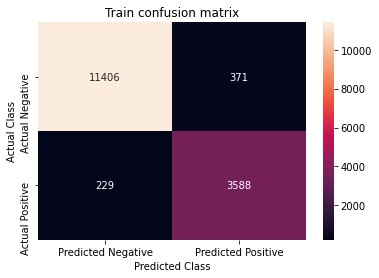

[[11406   371]
 [  229  3588]]


In [248]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_non_smote_standardized = confusion_matrix(y_train_non_smote_standardized, knn_non_smote_standardized.predict(x_train_non_smote_standardized))
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_train_non_smote_standardized_df = pd.DataFrame(cm_train_non_smote_standardized, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_train_non_smote_standardized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_non_smote_standardized)

Test confusion matrix :


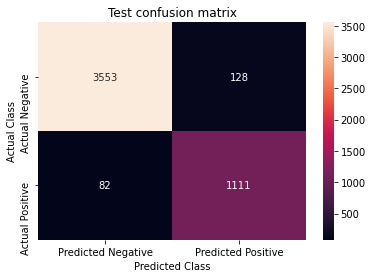

[[3553  128]
 [  82 1111]]


In [249]:
print("Test confusion matrix :")
cm_test_non_smote_standardized = confusion_matrix(y_test_non_smote_standardized, knn_non_smote_standardized.predict(x_test_non_smote_standardized))
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_df = pd.DataFrame(cm_test_non_smote_standardized, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized)

In [250]:
_, _, false_negative_non_smote_standardized, true_positive_non_smote_standardized = cm_test_non_smote_standardized.ravel()

# false_negative_non_smote_standardized = cm_test_non_smote_standardized[1][0]
# true_positive_non_smote_standardized = cm_test_non_smote_standardized[1][1]

# print(false_negative_non_smote_standardized)
# print(true_positive_non_smote_standardized)

print("False Negative Rate = ", (false_negative_non_smote_standardized/(false_negative_non_smote_standardized+true_positive_non_smote_standardized)) * 100, "%")

False Negative Rate =  6.873428331936295 %


In [261]:
print(classification_report(y_test_non_smote_standardized, knn_non_smote_standardized.predict(x_test_non_smote_standardized)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3681
           1       0.90      0.93      0.91      1193

    accuracy                           0.96      4874
   macro avg       0.94      0.95      0.94      4874
weighted avg       0.96      0.96      0.96      4874



## 9.4 k-NN On NON-SMOTE Normalized Data

In [127]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [128]:
x_non_smote_normalized = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [129]:
# splitting into train & test set..
x_train_non_smote_normalized, x_test_non_smote_normalized, y_train_non_smote_normalized, y_test_non_smote_normalized = train_test_split(x_non_smote_normalized, y_non_smote_normalized, test_size = 0.20, stratify=y_non_smote_normalized)

# splitting train set into train and cv sets..
x_train_non_smote_normalized, x_cv_non_smote_normalized, y_train_non_smote_normalized, y_cv_non_smote_normalized = train_test_split(x_train_non_smote_normalized, y_train_non_smote_normalized, test_size = 0.20, stratify=y_train_non_smote_normalized)

print("len(x_train_non_smote_normalized) = ", len(x_train_non_smote_normalized))
print("len(y_train_non_smote_normalized) = ", len(y_train_non_smote_normalized))

print("\nlen(x_cv_non_smote_normalized) = ", len(x_cv_non_smote_normalized))
print("len(y_cv_non_smote_normalized) = ", len(y_cv_non_smote_normalized))

print("\nlen(x_test_non_smote_normalized) = ", len(x_test_non_smote_normalized))
print("len(y_test_non_smote_normalized) = ", len(y_test_non_smote_normalized))

len(x_train_non_smote_normalized) =  15594
len(y_train_non_smote_normalized) =  15594

len(x_cv_non_smote_normalized) =  3899
len(y_cv_non_smote_normalized) =  3899

len(x_test_non_smote_normalized) =  4874
len(y_test_non_smote_normalized) =  4874


In [251]:
k_values_non_smote_normalized, auc_train_non_smote_normalized, auc_cv_non_smote_normalized = kNN_non_smote(x_train_non_smote_normalized, y_train_non_smote_normalized, x_cv_non_smote_normalized, y_cv_non_smote_normalized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_AUC for k=1 is 1.0..
CV_AUC for k=1 is 0.9677490541122535..

Train_AUC for k=3 is 0.9989547594233766..
CV_AUC for k=3 is 0.9786834452737647..

Train_AUC for k=5 is 0.9971113151126997..
CV_AUC for k=5 is 0.9812417023487916..

Train_AUC for k=7 is 0.9949551206021408..
CV_AUC for k=7 is 0.9803027552651156..

Train_AUC for k=9 is 0.992950195837595..
CV_AUC for k=9 is 0.9795157908974099..

Train_AUC for k=11 is 0.9910962071357988..
CV_AUC for k=11 is 0.978099183849256..

Train_AUC for k=13 is 0.9894692120352255..
CV_AUC for k=13 is 0.9769783558104025..

Train_AUC for k=15 is 0.987883037520525..
CV_AUC for k=15 is 0.97607090865732..

Train_AUC for k=17 is 0.9864635489186004..
CV_AUC for k=17 is 0.9751251988766805..

Train_AUC for k=19 is 0.9849850539929551..
CV_AUC for k=19 is 0.974230921186106..

Train_AUC for k=21 is 0.9835993563828236..
CV_AUC for k=21 is 0.9731125846671863..

Train_AUC for k=23 is 0.9822346919410531..
CV_AUC for k=23 is 0.9721013835054262..

Train_AUC for k=25 is 

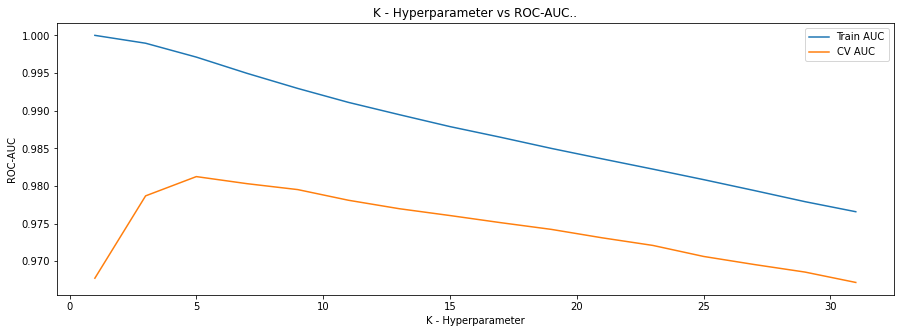

In [252]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_non_smote_normalized, auc_train_non_smote_normalized, label='Train AUC')
plt.plot(k_values_non_smote_normalized, auc_cv_non_smote_normalized, label='CV AUC')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('ROC-AUC')
plt.title('K - Hyperparameter vs ROC-AUC..')
plt.show()

In [253]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_non_smote_normalized = 7
print("From the above graph, we take best 'k' to be {0}..".format(best_k_non_smote_normalized))

knn_non_smote_normalized = KNeighborsClassifier(n_neighbors=best_k_non_smote_normalized, algorithm='brute', weights='uniform', n_jobs=12)
knn_non_smote_normalized.fit(x_train_non_smote_normalized, y_train_non_smote_normalized)

y_train_pred_non_smote_normalized = knn_non_smote_normalized.predict_proba(x_train_non_smote_normalized)[:,1]
y_test_pred_non_smote_normalized = knn_non_smote_normalized.predict_proba(x_test_non_smote_normalized)[:,1]

From the above graph, we take best 'k' to be 7..


In [254]:
# test_accuracy_score_non_smote = accuracy_score(y_test_non_smote_normalized, y_test_pred_non_smote_normalized.round(), normalize=True) * 100
# print("Test Accuracy = ", test_accuracy_score_non_smote)

Train -> True Positive Rate =  0.8334352167205193
Train -> False Positive Rate =  0.14538695951619446
Test -> True Positive Rate =  0.8126105988637422
Test -> False Positive Rate =  0.15164961212230976

Train AUC =  0.9949551206021408
Test AUC =  0.9795859347051407


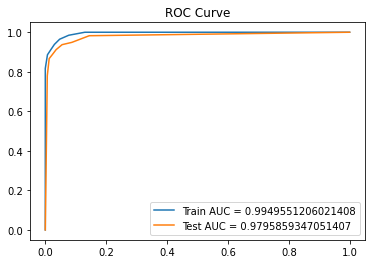

In [255]:
# Plotting ROC Curve..
train_fpr_non_smote_normalized, train_tpr_non_smote_normalized, _ = roc_curve(y_train_non_smote_normalized, y_train_pred_non_smote_normalized)
test_fpr_non_smote_normalized, test_tpr_non_smote_normalized, _ = roc_curve(y_test_non_smote_normalized, y_test_pred_non_smote_normalized)

print("Train -> True Positive Rate = ", train_tpr_non_smote_normalized.mean())
print("Train -> False Positive Rate = ", train_fpr_non_smote_normalized.mean())
print("Test -> True Positive Rate = ", test_tpr_non_smote_normalized.mean())
print("Test -> False Positive Rate = ", test_fpr_non_smote_normalized.mean())

train_auc_non_smote_normalized = auc(train_fpr_non_smote_normalized, train_tpr_non_smote_normalized)
test_auc_non_smote_normalized = auc(test_fpr_non_smote_normalized, test_tpr_non_smote_normalized)

print("\nTrain AUC = ", train_auc_non_smote_normalized)
print("Test AUC = ", test_auc_non_smote_normalized)

plt.plot(train_fpr_non_smote_normalized, train_tpr_non_smote_normalized, label="Train AUC = {0}".format(str(train_auc_non_smote_normalized)))
plt.plot(test_fpr_non_smote_normalized, test_tpr_non_smote_normalized, label="Test AUC = {0}".format(str(test_auc_non_smote_normalized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


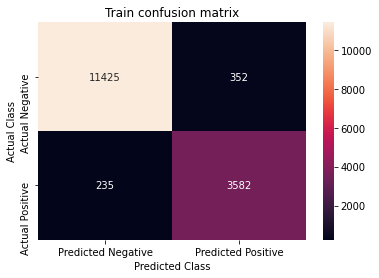

[[11425   352]
 [  235  3582]]


In [256]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_non_smote_normalized = confusion_matrix(y_train_non_smote_normalized, knn_non_smote_normalized.predict(x_train_non_smote_normalized))
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_train_non_smote_normalized_df = pd.DataFrame(cm_train_non_smote_normalized, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_train_non_smote_normalized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_non_smote_normalized)

Test confusion matrix :


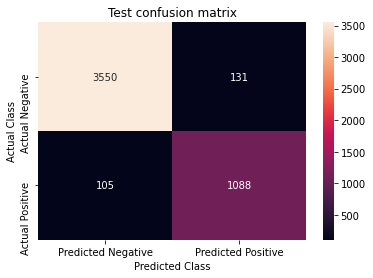

[[3550  131]
 [ 105 1088]]


In [257]:
print("Test confusion matrix :")
cm_test_non_smote_normalized = confusion_matrix(y_test_non_smote_normalized, knn_non_smote_normalized.predict(x_test_non_smote_normalized))
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_df = pd.DataFrame(cm_test_non_smote_normalized, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized)

In [258]:
_, _, false_negative_non_smote_normalized, true_positive_non_smote_normalized = cm_test_non_smote_normalized.ravel()

# false_negative_non_smote_normalized = cm_test_non_smote_normalized[1][0]
# true_positive_non_smote_normalized = cm_test_non_smote_normalized[1][1]

# print(false_negative_non_smote_normalized)
# print(true_positive_non_smote_normalized)

print("False Negative Rate = ", (false_negative_non_smote_normalized/(false_negative_non_smote_normalized+true_positive_non_smote_normalized)) * 100, "%")

False Negative Rate =  8.801341156747695 %


In [260]:
print(classification_report(y_test_non_smote_normalized, knn_non_smote_normalized.predict(x_test_non_smote_normalized)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3681
           1       0.89      0.91      0.90      1193

    accuracy                           0.95      4874
   macro avg       0.93      0.94      0.93      4874
weighted avg       0.95      0.95      0.95      4874



In [96]:
dill_dump_session('9.4_all_knn_models_completed')

# 10 ML Algorithms 2 - Naïve Bayes

## 10.1 Transforming data for Naïve Bayes

### 10.1.1 Transforming data for Naïve Bayes - SMOTE Standardized Data

In [188]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [189]:
transform_nb_smote_standardized = smote_standardized_df.copy()
transform_nb_smote_standardized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1

In [153]:
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], 0))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], .25))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], .50))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], .75))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], 1))

-1.7362453570722547
-0.6419337983433854
0.023575874409228287
0.8847649876874012
1.6710680911152977


In [154]:
transform_nb_smote_standardized['satisfaction_level'].describe()

count    3.680600e+04
mean    -3.706575e-17
std      1.000014e+00
min     -1.736245e+00
25%     -6.419338e-01
50%      2.357587e-02
75%      8.847650e-01
max      1.671068e+00
Name: satisfaction_level, dtype: float64

In [155]:
transform_nb_smote_standardized['quantile_satisfaction_level'] = pd.qcut(transform_nb_smote_standardized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1])
# transform_nb_smote_standardized_cols = list(transform_nb_smote_standardized.columns)
# transform_nb_smote_standardized_cols = [transform_nb_smote_standardized_cols[-1]] + transform_nb_smote_standardized_cols[:-1]
# transform_nb_smote_standardized = transform_nb_smote_standardized[transform_nb_smote_standardized_cols]
transform_nb_smote_standardized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  \
0                     0            0           1              0          1   
1                     0            0           0              1          1   
2                     0            0           0              1          1   
3                     0            0           1              0          1   
4                     0            0           1              0          1   
5                     0            0           1              0          1   
6                     0            0           1              0          1   
7                     0            0           1              0          1   
8                     0            0           1              0          1   
9                     0            0           1              0          1   

     

In [156]:
transform_nb_smote_standardized['quantile_satisfaction_level'].describe()

count                36806
unique                   4
top       (-0.642, 0.0236]
freq                  9447
Name: quantile_satisfaction_level, dtype: object

In [190]:
transform_nb_smote_standardized['quantile_satisfaction_level'] = pd.qcut(transform_nb_smote_standardized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_smote_standardized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_projects_worked_on'] = pd.qcut(transform_nb_smote_standardized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_average_montly_hours'] = pd.qcut(transform_nb_smote_standardized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_time_spend_company'] = pd.qcut(transform_nb_smote_standardized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_smote_standardized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  \
0                     0            0           1              0          1   
1                     0            0           0              1          1   
2                     0            0           0              1          1   
3                     0            0           1              0          1   
4                     0            0           1              0          1   
5                     0            0           1              0          1   
6                     0            0           1              0          1   
7                     0            0           1              0          1   
8                     0            0           1              0          1   
9                     0            0           1              0          1   

  qua

In [160]:
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], 0))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], .25))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], .50))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], .75))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], 1))

-1.3731174353956161
-0.46342342705860395
-0.46342342705860395
0.44627058127840824
3.1753526062894446


In [191]:
transform_nb_smote_standardized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_smote_standardized.head()

Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition quantile_satisfaction_level  \
0              0          1                         low   
1              1          1                        high   
2              1          1                         low   
3              0          1                         low   
4              0          1                     low_mid   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                        high_mid                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [187]:
transform_nb_smote_standardized_cols = list(transform_nb_smote_standardized.columns)
transform_nb_smote_standardized_cols

['quantile_satisfaction_level',
 'quantile_last_evaluation_rating',
 'quantile_projects_worked_on',
 'quantile_average_montly_hours',
 'quantile_time_spend_company',
 'Work_accident_False',
 'Work_accident_True',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_product_mng',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium',
 'Attrition']

In [182]:
transform_nb_smote_standardized_cols[-5:]

['quantile_satisfaction_level',
 'quantile_last_evaluation_rating',
 'quantile_projects_worked_on',
 'quantile_average_montly_hours',
 'quantile_time_spend_company']

In [183]:
transform_nb_smote_standardized_cols[:-5]

['Work_accident_False',
 'Work_accident_True',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_product_mng',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium',
 'Attrition']

In [192]:
transform_nb_smote_standardized_cols = list(transform_nb_smote_standardized.columns)
transform_nb_smote_standardized_cols = transform_nb_smote_standardized_cols[-5:] + transform_nb_smote_standardized_cols[:-5]
transform_nb_smote_standardized = transform_nb_smote_standardized[transform_nb_smote_standardized_cols]
transform_nb_smote_standardized.head()

quantile_satisfaction_level quantile_last_evaluation_rating  \
0                         low                             low   
1                        high                        high_mid   
2                         low                        high_mid   
3                         low                             low   
4                     low_mid                             low   

  quantile_projects_worked_on quantile_average_montly_hours  \
0                         low                       low_mid   
1                        high                          high   
2                        high                          high   
3                         low                       low_mid   
4                         low                       low_mid   

  quantile_time_spend_company  Work_accident_False  Work_accident_True  \
0                         low                    1                   0   
1                        high                    1                   0   
2                         mid                    1                   0   
3                         low                    1                   0   
4                         low                    1                   0   

   Department_IT  Department_RandD  Department_accounting  Department_hr  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium  Attrition  
0            0           1              0          1  
1            0           0              1          1  
2            0           0              1          1  
3            0           1              0          1  
4            0           1              0          1

In [193]:
transform_nb_smote_standardized_dummy_df = pd.get_dummies(transform_nb_smote_standardized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [195]:
print(transform_nb_smote_standardized_dummy_df.shape)
transform_nb_smote_standardized_dummy_df.head()

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 1                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     0                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [197]:
transform_nb_smote_standardized_dummy_df.to_csv('../save/csv/10.1.1_transform_nb_smote_standardized_dummy_df.csv', index=False)

### 10.1.2 Transforming data for Naïve Bayes - SMOTE Normalized Data

In [210]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [211]:
transform_nb_smote_normalized = smote_normalized_df.copy()
transform_nb_smote_normalized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1

In [212]:
transform_nb_smote_normalized['quantile_satisfaction_level'] = pd.qcut(transform_nb_smote_normalized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_smote_normalized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_projects_worked_on'] = pd.qcut(transform_nb_smote_normalized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_average_montly_hours'] = pd.qcut(transform_nb_smote_normalized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_time_spend_company'] = pd.qcut(transform_nb_smote_normalized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_smote_normalized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  \
0                     0            0           1              0          1   
1                     0            0           0              1          1   
2                     0            0           0              1          1   
3                     0            0           1              0          1   
4                     0            0           1              0          1   
5                     0            0           1              0          1   
6                     0            0           1              0          1   
7                     0            0           1              0          1   
8                     0            0           1              0          1   
9                     0            0           1              0          1   

  qua

In [213]:
transform_nb_smote_normalized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_smote_normalized.head()

Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition quantile_satisfaction_level  \
0              0          1                         low   
1              1          1                        high   
2              1          1                         low   
3              0          1                         low   
4              0          1                     low_mid   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                        high_mid                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [214]:
transform_nb_smote_normalized_dummy_df = pd.get_dummies(transform_nb_smote_normalized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [215]:
print(transform_nb_smote_normalized_df.shape)
transform_nb_smote_normalized_df.head()

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 1                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     0                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [223]:
transform_nb_smote_normalized_dummy_df.to_csv('../save/csv/10.1.2_transform_nb_smote_normalized_dummy_df.csv', index=False)

### 10.1.3 Transforming data for Naïve Bayes - NON-SMOTE Standardized Data

In [217]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [218]:
transform_nb_non_smote_standardized = non_smote_standardized_df.copy()
transform_nb_non_smote_standardized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0

In [219]:
transform_nb_non_smote_standardized['quantile_satisfaction_level'] = pd.qcut(transform_nb_non_smote_standardized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_non_smote_standardized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_projects_worked_on'] = pd.qcut(transform_nb_non_smote_standardized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_average_montly_hours'] = pd.qcut(transform_nb_non_smote_standardized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_time_spend_company'] = pd.qcut(transform_nb_non_smote_standardized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_non_smote_standardized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  \
0                     0            0           1              0   
1                     0            0           0              1   
2                     0            0           0              1   
3                     0            0           1              0   
4                     0            0           1              0   
5                     0            0           1              0   
6                     0            0           1              0   
7                     0            0           1              0   
8                     0            0           1              0   
9                     0            0           1              0   

  qua

In [220]:
transform_nb_non_smote_standardized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_non_smote_standardized.head()

Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium quantile_satisfaction_level  \
0            0           1              0                         low   
1            0           0              1                    high_mid   
2            0           0              1                         low   
3            0           1              0                         low   
4            0           1              0                         low   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                            high                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [221]:
transform_nb_non_smote_standardized_dummy_df = pd.get_dummies(transform_nb_non_smote_standardized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [222]:
print(transform_nb_non_smote_standardized_dummy_df.shape)
transform_nb_non_smote_standardized_dummy_df.head()

(24367, 32)


Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium  quantile_satisfaction_level_low  \
0            0           1              0                                1   
1            0           0              1                                0   
2            0           0              1                                1   
3            0           1              0                                1   
4            0           1              0                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     1                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [224]:
transform_nb_non_smote_standardized_dummy_df.to_csv('../save/csv/10.1.3_transform_nb_non_smote_standardized_dummy_df.csv', index=False)

### 10.1.4 Transforming data for Naïve Bayes - NON-SMOTE Normalized Data

In [225]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [226]:
transform_nb_non_smote_normalized = non_smote_normalized_df.copy()
transform_nb_non_smote_normalized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0

In [227]:
transform_nb_non_smote_normalized['quantile_satisfaction_level'] = pd.qcut(transform_nb_non_smote_normalized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_non_smote_normalized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_projects_worked_on'] = pd.qcut(transform_nb_non_smote_normalized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_average_montly_hours'] = pd.qcut(transform_nb_non_smote_normalized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_time_spend_company'] = pd.qcut(transform_nb_non_smote_normalized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_non_smote_normalized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  \
0                     0            0           1              0   
1                     0            0           0              1   
2                     0            0           0              1   
3                     0            0           1              0   
4                     0            0           1              0   
5                     0            0           1              0   
6                     0            0           1              0   
7                     0            0           1              0   
8                     0            0           1              0   
9                     0            0           1              0   

  qua

In [228]:
transform_nb_non_smote_normalized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_non_smote_normalized.head()

Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium quantile_satisfaction_level  \
0            0           1              0                         low   
1            0           0              1                    high_mid   
2            0           0              1                         low   
3            0           1              0                         low   
4            0           1              0                         low   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                            high                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [229]:
transform_nb_non_smote_normalized_dummy_df = pd.get_dummies(transform_nb_non_smote_normalized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [230]:
print(transform_nb_non_smote_normalized_dummy_df.shape)
transform_nb_non_smote_normalized_dummy_df.head()

(24367, 32)


Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium  quantile_satisfaction_level_low  \
0            0           1              0                                1   
1            0           0              1                                0   
2            0           0              1                                1   
3            0           1              0                                1   
4            0           1              0                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     1                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [231]:
transform_nb_non_smote_normalized_dummy_df.to_csv('../save/csv/10.1.4_transform_nb_non_smote_normalized_dummy_df.csv', index=False)

## 10.2 Naïve Bayes On SMOTE Standardized Data

In [42]:
print(transform_nb_smote_standardized_dummy_df.shape)
transform_nb_smote_standardized_dummy_df.head(10)

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   
5                    1                   0              0                 0   
6                    1                   0              0                 0   
7                    1                   0              0                 0   
8                    1                   0              0                 0   
9                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   
6                      0              0                      0   
7                      0              0                      0   
8                      0              0                      0   
9                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   
5                       0                     0            0           1   
6                       0                     0            0           1   
7                       0                     0            0           1   
8                       0                     0            0           1   
9                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   
5              0          1                                1   
6              0          1                                0   
7              0          1                                0   
8              0          1                                0   
9              0          1                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   
5                                    0                                     0   
6                                    0                                     0   
7                                    0                                     0   
8                                    1                                     0   
9                                    0                          

In [43]:
x_smote_standardized_nb = transform_nb_smote_standardized_dummy_df.loc[:, transform_nb_smote_standardized_dummy_df.columns != 'Attrition']
y_smote_standardized_nb = transform_nb_smote_standardized_dummy_df.loc[:, transform_nb_smote_standardized_dummy_df.columns == 'Attrition']

In [6]:
# splitting into train & test set..
x_train_smote_standardized_nb, x_test_smote_standardized_nb, y_train_smote_standardized_nb, y_test_smote_standardized_nb = train_test_split(x_smote_standardized_nb, y_smote_standardized_nb, test_size = 0.20, random_state=21, stratify=y_smote_standardized_nb)

print("len(x_train_smote_standardized_nb) = ", len(x_train_smote_standardized_nb))
print("len(y_train_smote_standardized_nb) = ", len(y_train_smote_standardized_nb))

print("\nlen(x_test_smote_standardized_nb) = ", len(x_test_smote_standardized_nb))
print("len(y_test_smote_standardized_nb) = ", len(y_test_smote_standardized_nb))

len(x_train_smote_standardized_nb) =  29444
len(y_train_smote_standardized_nb) =  29444

len(x_test_smote_standardized_nb) =  7362
len(y_test_smote_standardized_nb) =  7362


In [10]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [11]:
nb_smote_standardized = BernoulliNB()
gcv_nb_smote_standardized = GridSearchCV(nb_smote_standardized, hyper_parameter_values_dict_nb, cv=5, scoring="roc_auc", n_jobs=12)
gcv_nb_smote_standardized.fit(x_train_smote_standardized_nb, y_train_smote_standardized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [12]:
gcv_nb_smote_standardized.best_estimator_

BernoulliNB(alpha=0.001)

In [13]:
gcv_nb_smote_standardized.best_params_

{'alpha': 0.001}

In [14]:
# gcv_nb_smote_standardized.best_estimator_.coef_

In [15]:
gcv_nb_smote_standardized.best_score_

0.8827169007876176

In [16]:
nb_smote_standardized = BernoulliNB(alpha=gcv_nb_smote_standardized.best_params_['alpha'])
nb_smote_standardized.fit(x_train_smote_standardized_nb, y_train_smote_standardized_nb)

BernoulliNB(alpha=0.001)

In [17]:
y_train_pred_smote_standardized_nb = nb_smote_standardized.predict_proba(x_train_smote_standardized_nb)[:,1]
y_test_pred_smote_standardized_nb = nb_smote_standardized.predict_proba(x_test_smote_standardized_nb)[:,1]


AUC_train =  0.8830860383947601
AUC_test =  0.8834326302877225


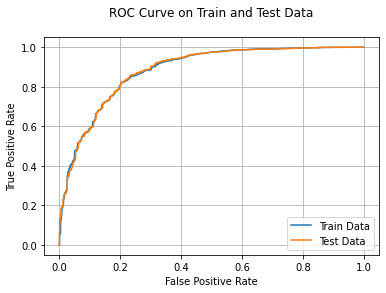

In [18]:
train_fpr_smote_standardized_nb, train_tpr_smote_standardized_nb, _ = roc_curve(y_train_smote_standardized_nb, y_train_pred_smote_standardized_nb)
test_fpr_smote_standardized_nb, test_tpr_smote_standardized_nb, _ = roc_curve(y_test_smote_standardized_nb, y_test_pred_smote_standardized_nb)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_nb, y_train_pred_smote_standardized_nb))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_nb, y_test_pred_smote_standardized_nb))

plt.plot(train_fpr_smote_standardized_nb, train_tpr_smote_standardized_nb, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_nb, test_tpr_smote_standardized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


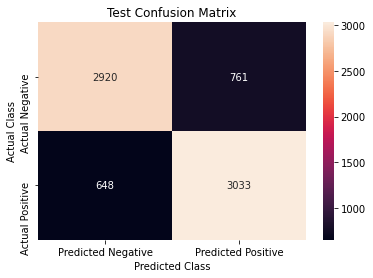

                 Predicted Negative  Predicted Positive
Actual Negative                2920                 761
Actual Positive                 648                3033


In [19]:
print("Test confusion matrix :")
cm_test_smote_standardized_nb = confusion_matrix(y_test_smote_standardized_nb, nb_smote_standardized.predict(x_test_smote_standardized_nb).round())
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_nb_df = pd.DataFrame(cm_test_smote_standardized_nb, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_nb_df)

In [20]:
_, _, false_negative_smote_standardized_nb, true_positive_smote_standardized_nb = cm_test_smote_standardized_nb.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_nb/(false_negative_smote_standardized_nb+true_positive_smote_standardized_nb)) * 100, "%")

False Negative Rate =  17.6039119804401 %


In [21]:
print(classification_report(y_test_smote_standardized_nb, nb_smote_standardized.predict(x_test_smote_standardized_nb)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3681
           1       0.80      0.82      0.81      3681

    accuracy                           0.81      7362
   macro avg       0.81      0.81      0.81      7362
weighted avg       0.81      0.81      0.81      7362



In [57]:
features_names_smote_standardized_nb = x_smote_standardized_nb.columns
features_names_smote_standardized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [63]:
nb_smote_standardized.feature_log_prob_

array([[-0.18626821, -1.7722565 , -2.43200175, -2.84036962, -3.02501947,
        -3.02327274, -3.23212105, -2.78523198, -1.70000554, -2.35844604,
        -0.77133818, -0.81390578, -2.15451642, -1.72732707, -0.94754664,
        -1.14331489, -1.73547863, -1.01502357, -1.31773169, -1.64135093,
        -1.29950938, -1.05322349, -1.35586232, -2.11223136, -1.70559735,
        -1.03203319, -1.19355751, -1.83832799, -0.31405975, -1.8853055 ,
        -2.13853932],
       [-0.0497797 , -3.46057056, -2.97714391, -4.05595357, -3.30102903,
        -3.23850867, -4.48372444, -3.32906825, -1.88578005, -4.11138338,
        -0.53523175, -1.01376813, -0.95559635, -1.08152505, -2.19324236,
        -1.80208511, -1.0698261 , -2.05686116, -1.48199514, -1.1971197 ,
        -0.78493187, -2.48958691, -1.85059225, -1.19095548, -1.1030367 ,
        -2.03194183, -1.56129075, -1.11668791, -0.7677712 , -1.33266065,
        -1.30098236]])

In [22]:
nb_class_0_prob_smote_standardized = nb_smote_standardized.feature_log_prob_[0, :]
nb_class_1_prob_smote_standardized = nb_smote_standardized.feature_log_prob_[1, :]

In [23]:
nb_class_0_prob_smote_standardized

array([-0.18545108, -1.77625711, -2.44561214, -2.84016484, -3.02621403,
       -3.02202115, -3.25673732, -2.77381118, -1.70128964, -2.35287016,
       -0.76743281, -0.81938864, -2.15636409, -1.72922652, -0.95010558,
       -1.13901825, -1.732294  , -1.01449187, -1.32274113, -1.63922068,
       -1.29855859, -1.05267902, -1.36200263, -2.10433753, -1.70427249,
       -1.03665396, -1.18905042, -1.83919175, -0.31555416, -1.88510143,
       -2.13029834])

In [24]:
nb_class_1_prob_smote_standardized

array([-0.04964306, -3.46586973, -2.98103186, -4.04413493, -3.31296236,
       -3.29082128, -4.49114685, -3.3626857 , -1.8779681 , -4.09176279,
       -0.53328769, -1.01937451, -0.95274388, -1.09076374, -2.18856722,
       -1.79407134, -1.07372414, -2.06984193, -1.46821795, -1.19823816,
       -0.79082395, -2.49131144, -1.85122973, -1.1819377 , -1.10399279,
       -2.03234086, -1.56701397, -1.11242818, -0.7722733 , -1.33479719,
       -1.29161412])

In [25]:
feature_names_weights_dict_class_0_smote_standardized_nb = dict(zip(features_names_smote_standardized_nb, nb_class_0_prob_smote_standardized))
feature_names_weights_dict_class_1_smote_standardized_nb = dict(zip(features_names_smote_standardized_nb, nb_class_1_prob_smote_standardized))

In [26]:
feature_names_weights_dict_class_0_smote_standardized_nb

{'Work_accident_False': -0.18545107802238547,
 'Work_accident_True': -1.7762571072783775,
 'Department_IT': -2.4456121408662623,
 'Department_RandD': -2.8401648364321748,
 'Department_accounting': -3.026214025570922,
 'Department_hr': -3.0220211531709626,
 'Department_management': -3.2567373210751223,
 'Department_product_mng': -2.7738111779753725,
 'Department_technical': -1.7012896390858172,
 'salary_high': -2.3528701585809406,
 'salary_low': -0.7674328094673353,
 'salary_medium': -0.8193886385438098,
 'quantile_satisfaction_level_low': -2.156364094226201,
 'quantile_satisfaction_level_low_mid': -1.7292265152251094,
 'quantile_satisfaction_level_high_mid': -0.9501055838643708,
 'quantile_satisfaction_level_high': -1.1390182493669627,
 'quantile_last_evaluation_rating_low': -1.7322940011167862,
 'quantile_last_evaluation_rating_low_mid': -1.0144918711692164,
 'quantile_last_evaluation_rating_high_mid': -1.322741126741537,
 'quantile_last_evaluation_rating_high': -1.639220680084967,
 '

In [27]:
feature_names_weights_dict_class_1_smote_standardized_nb

{'Work_accident_False': -0.04964305789095569,
 'Work_accident_True': -3.4658697250759287,
 'Department_IT': -2.9810318646497427,
 'Department_RandD': -4.044134927586652,
 'Department_accounting': -3.3129623617290465,
 'Department_hr': -3.2908212767058806,
 'Department_management': -4.491146853981474,
 'Department_product_mng': -3.362685701968987,
 'Department_technical': -1.8779681033161149,
 'salary_high': -4.091762787504998,
 'salary_low': -0.5332876934085284,
 'salary_medium': -1.0193745090604853,
 'quantile_satisfaction_level_low': -0.9527438753184967,
 'quantile_satisfaction_level_low_mid': -1.090763738204826,
 'quantile_satisfaction_level_high_mid': -2.188567215514701,
 'quantile_satisfaction_level_high': -1.7940713363408847,
 'quantile_last_evaluation_rating_low': -1.0737241392108103,
 'quantile_last_evaluation_rating_low_mid': -2.069841930882978,
 'quantile_last_evaluation_rating_high_mid': -1.4682179514458937,
 'quantile_last_evaluation_rating_high': -1.1982381588915842,
 'qua

## 10.3 Naïve Bayes On SMOTE Normalized Data

In [234]:
print(transform_nb_smote_normalized_dummy_df.shape)
transform_nb_smote_normalized_dummy_df.head(10)

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   
5                    1                   0              0                 0   
6                    1                   0              0                 0   
7                    1                   0              0                 0   
8                    1                   0              0                 0   
9                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   
6                      0              0                      0   
7                      0              0                      0   
8                      0              0                      0   
9                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   
5                       0                     0            0           1   
6                       0                     0            0           1   
7                       0                     0            0           1   
8                       0                     0            0           1   
9                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   
5              0          1                                1   
6              0          1                                0   
7              0          1                                0   
8              0          1                                0   
9              0          1                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   
5                                    0                                     0   
6                                    0                                     0   
7                                    0                                     0   
8                                    1                                     0   
9                                    0                          

In [235]:
x_smote_normalized_nb = transform_nb_smote_normalized_dummy_df.loc[:, transform_nb_smote_normalized_dummy_df.columns != 'Attrition']
y_smote_normalized_nb = transform_nb_smote_normalized_dummy_df.loc[:, transform_nb_smote_normalized_dummy_df.columns == 'Attrition']

In [7]:
# splitting into train & test set..
x_train_smote_normalized_nb, x_test_smote_normalized_nb, y_train_smote_normalized_nb, y_test_smote_normalized_nb = train_test_split(x_smote_normalized_nb, y_smote_normalized_nb, test_size = 0.20, random_state=21, stratify=y_smote_normalized_nb)

print("len(x_train_smote_normalized_nb) = ", len(x_train_smote_normalized_nb))
print("len(y_train_smote_normalized_nb) = ", len(y_train_smote_normalized_nb))

print("\nlen(x_test_smote_normalized_nb) = ", len(x_test_smote_normalized_nb))
print("len(y_test_smote_normalized_nb) = ", len(y_test_smote_normalized_nb))

len(x_train_smote_normalized_nb) =  29444
len(y_train_smote_normalized_nb) =  29444

len(x_test_smote_normalized_nb) =  7362
len(y_test_smote_normalized_nb) =  7362


In [75]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [28]:
nb_smote_normalized = BernoulliNB()
gcv_nb_smote_normalized = GridSearchCV(nb_smote_normalized, hyper_parameter_values_dict_nb, cv=5, scoring="roc_auc", n_jobs=12)
gcv_nb_smote_normalized.fit(x_train_smote_normalized_nb, y_train_smote_normalized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [29]:
gcv_nb_smote_normalized.best_estimator_

BernoulliNB(alpha=0.001)

In [30]:
gcv_nb_smote_normalized.best_params_

{'alpha': 0.001}

In [31]:
gcv_nb_smote_normalized.best_score_

0.8827169007876176

In [32]:
nb_smote_normalized = BernoulliNB(alpha=gcv_nb_smote_normalized.best_params_['alpha'])
nb_smote_normalized.fit(x_train_smote_normalized_nb, y_train_smote_normalized_nb)

BernoulliNB(alpha=0.001)

In [33]:
y_train_pred_smote_normalized_nb = nb_smote_normalized.predict_proba(x_train_smote_normalized_nb)[:,1]
y_test_pred_smote_normalized_nb = nb_smote_normalized.predict_proba(x_test_smote_normalized_nb)[:,1]

In [34]:
train_fpr_smote_normalized_nb, train_tpr_smote_normalized_nb, _ = roc_curve(y_train_smote_normalized_nb, y_train_pred_smote_normalized_nb)
test_fpr_smote_normalized_nb, test_tpr_smote_normalized_nb, _ = roc_curve(y_test_smote_normalized_nb, y_test_pred_smote_normalized_nb)


AUC_train =  0.8830860383947601
AUC_test =  0.8834326302877225


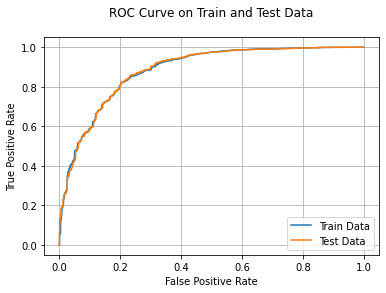

In [35]:
print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_nb, y_train_pred_smote_normalized_nb))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_nb, y_test_pred_smote_normalized_nb))

plt.plot(train_fpr_smote_normalized_nb, train_tpr_smote_normalized_nb, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_nb, test_tpr_smote_normalized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


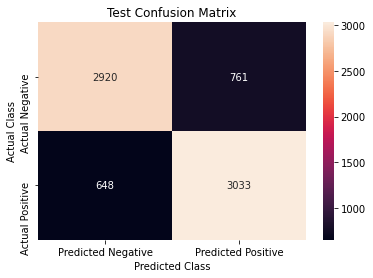

                 Predicted Negative  Predicted Positive
Actual Negative                2920                 761
Actual Positive                 648                3033


In [36]:
print("Test confusion matrix :")
cm_test_smote_normalized_nb = confusion_matrix(y_test_smote_normalized_nb, nb_smote_normalized.predict(x_test_smote_normalized_nb).round())
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_nb_df = pd.DataFrame(cm_test_smote_normalized_nb, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_nb_df)

In [37]:
_, _, false_negative_smote_normalized_nb, true_positive_smote_normalized_nb = cm_test_smote_normalized_nb.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_nb/(false_negative_smote_normalized_nb+true_positive_smote_normalized_nb)) * 100, "%")

False Negative Rate =  17.6039119804401 %


In [38]:
print(classification_report(y_test_smote_normalized_nb, nb_smote_normalized.predict(x_test_smote_normalized_nb)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3681
           1       0.80      0.82      0.81      3681

    accuracy                           0.81      7362
   macro avg       0.81      0.81      0.81      7362
weighted avg       0.81      0.81      0.81      7362



In [39]:
features_names_smote_normalized_nb = x_smote_normalized_nb.columns
features_names_smote_normalized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [40]:
nb_class_0_prob_smote_normalized = nb_smote_normalized.feature_log_prob_[0, :]
nb_class_1_prob_smote_normalized = nb_smote_normalized.feature_log_prob_[1, :]

In [41]:
feature_names_weights_dict_class_0_smote_normalized_nb = dict(zip(features_names_smote_normalized_nb, nb_class_0_prob_smote_normalized))
feature_names_weights_dict_class_1_smote_normalized_nb = dict(zip(features_names_smote_normalized_nb, nb_class_1_prob_smote_normalized))

In [42]:
feature_names_weights_dict_class_0_smote_normalized_nb

{'Work_accident_False': -0.18545107802238547,
 'Work_accident_True': -1.7762571072783775,
 'Department_IT': -2.4456121408662623,
 'Department_RandD': -2.8401648364321748,
 'Department_accounting': -3.026214025570922,
 'Department_hr': -3.0220211531709626,
 'Department_management': -3.2567373210751223,
 'Department_product_mng': -2.7738111779753725,
 'Department_technical': -1.7012896390858172,
 'salary_high': -2.3528701585809406,
 'salary_low': -0.7674328094673353,
 'salary_medium': -0.8193886385438098,
 'quantile_satisfaction_level_low': -2.156364094226201,
 'quantile_satisfaction_level_low_mid': -1.7292265152251094,
 'quantile_satisfaction_level_high_mid': -0.9501055838643708,
 'quantile_satisfaction_level_high': -1.1390182493669627,
 'quantile_last_evaluation_rating_low': -1.7322940011167862,
 'quantile_last_evaluation_rating_low_mid': -1.0144918711692164,
 'quantile_last_evaluation_rating_high_mid': -1.322741126741537,
 'quantile_last_evaluation_rating_high': -1.639220680084967,
 '

In [43]:
feature_names_weights_dict_class_1_smote_normalized_nb

{'Work_accident_False': -0.04964305789095569,
 'Work_accident_True': -3.4658697250759287,
 'Department_IT': -2.9810318646497427,
 'Department_RandD': -4.044134927586652,
 'Department_accounting': -3.3129623617290465,
 'Department_hr': -3.2908212767058806,
 'Department_management': -4.491146853981474,
 'Department_product_mng': -3.362685701968987,
 'Department_technical': -1.8779681033161149,
 'salary_high': -4.091762787504998,
 'salary_low': -0.5332876934085284,
 'salary_medium': -1.0193745090604853,
 'quantile_satisfaction_level_low': -0.9527438753184967,
 'quantile_satisfaction_level_low_mid': -1.090763738204826,
 'quantile_satisfaction_level_high_mid': -2.188567215514701,
 'quantile_satisfaction_level_high': -1.7940713363408847,
 'quantile_last_evaluation_rating_low': -1.0737241392108103,
 'quantile_last_evaluation_rating_low_mid': -2.069841930882978,
 'quantile_last_evaluation_rating_high_mid': -1.4682179514458937,
 'quantile_last_evaluation_rating_high': -1.1982381588915842,
 'qua

## 10.4 Naïve Bayes On NON-SMOTE Standardized Data

In [238]:
print(transform_nb_non_smote_standardized_dummy_df.shape)
transform_nb_non_smote_standardized_dummy_df.head(10)

(24367, 32)


Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   
5          1                    1                   0              0   
6          1                    1                   0              0   
7          1                    1                   0              0   
8          1                    1                   0              0   
9          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   
5                      0                       0                     0   
6                      0                       0                     0   
7                      0                       0                     0   
8                      0                       0                     0   
9                      0                       0                     0   

   salary_high  salary_low  salary_medium  quantile_satisfaction_level_low  \
0            0           1              0                                1   
1            0           0              1                                0   
2            0           0              1                                1   
3            0           1              0                                1   
4            0           1              0                                1   
5            0           1              0                                1   
6            0           1              0                                0   
7            0           1              0                                0   
8            0           1              0                                1   
9            0           1              0                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   
5                                    0                                     0   
6                                    0                                     0   
7                                    0                                     0   
8                                    0                                     0   
9                                    0                          

In [236]:
x_non_smote_standardized_nb = transform_nb_non_smote_standardized_dummy_df.loc[:, transform_nb_non_smote_standardized_dummy_df.columns != 'Attrition']
y_non_smote_standardized_nb = transform_nb_non_smote_standardized_dummy_df.loc[:, transform_nb_non_smote_standardized_dummy_df.columns == 'Attrition']

In [8]:
# splitting into train & test set..
x_train_non_smote_standardized_nb, x_test_non_smote_standardized_nb, y_train_non_smote_standardized_nb, y_test_non_smote_standardized_nb = train_test_split(x_non_smote_standardized_nb, y_non_smote_standardized_nb, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_nb)

print("len(x_train_non_smote_standardized_nb) = ", len(x_train_non_smote_standardized_nb))
print("len(y_train_non_smote_standardized_nb) = ", len(y_train_non_smote_standardized_nb))

print("\nlen(x_test_non_smote_standardized_nb) = ", len(x_test_non_smote_standardized_nb))
print("len(y_test_non_smote_standardized_nb) = ", len(y_test_non_smote_standardized_nb))

len(x_train_non_smote_standardized_nb) =  19493
len(y_train_non_smote_standardized_nb) =  19493

len(x_test_non_smote_standardized_nb) =  4874
len(y_test_non_smote_standardized_nb) =  4874


In [44]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [45]:
nb_non_smote_standardized = BernoulliNB()
gcv_nb_non_smote_standardized = GridSearchCV(nb_non_smote_standardized, hyper_parameter_values_dict_nb, cv=5, scoring="roc_auc", n_jobs=12)
gcv_nb_non_smote_standardized.fit(x_train_non_smote_standardized_nb, y_train_non_smote_standardized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [46]:
gcv_nb_non_smote_standardized.best_estimator_

BernoulliNB(alpha=0.0001)

In [47]:
gcv_nb_non_smote_standardized.best_params_

{'alpha': 0.0001}

In [48]:
gcv_nb_non_smote_standardized.best_score_

0.8990627267625915

In [49]:
nb_non_smote_standardized = BernoulliNB(alpha=gcv_nb_non_smote_standardized.best_params_['alpha'])
nb_non_smote_standardized.fit(x_train_non_smote_standardized_nb, y_train_non_smote_standardized_nb)

BernoulliNB(alpha=0.0001)

In [50]:
y_train_pred_non_smote_standardized_nb = nb_non_smote_standardized.predict_proba(x_train_non_smote_standardized_nb)[:,1]
y_test_pred_non_smote_standardized_nb = nb_non_smote_standardized.predict_proba(x_test_non_smote_standardized_nb)[:,1]

In [51]:
train_fpr_non_smote_standardized_nb, train_tpr_non_smote_standardized_nb, _ = roc_curve(y_train_non_smote_standardized_nb, y_train_pred_non_smote_standardized_nb)
test_fpr_non_smote_standardized_nb, test_tpr_non_smote_standardized_nb, _ = roc_curve(y_test_non_smote_standardized_nb, y_test_pred_non_smote_standardized_nb)


AUC_train =  0.899434345716893
AUC_test =  0.9024425512127818


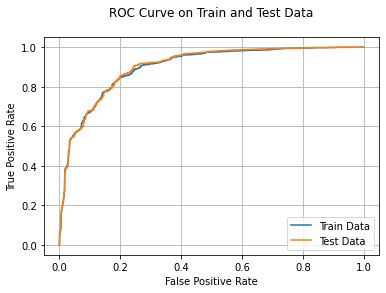

In [52]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_nb, y_train_pred_non_smote_standardized_nb))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_nb, y_test_pred_non_smote_standardized_nb))

plt.plot(train_fpr_non_smote_standardized_nb, train_tpr_non_smote_standardized_nb, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_nb, test_tpr_non_smote_standardized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


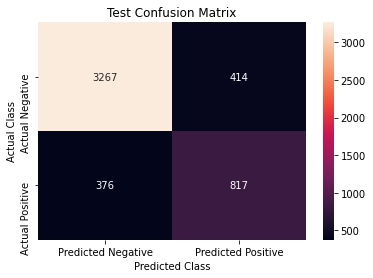

                 Predicted Negative  Predicted Positive
Actual Negative                3267                 414
Actual Positive                 376                 817


In [53]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_nb = confusion_matrix(y_test_non_smote_standardized_nb, nb_non_smote_standardized.predict(x_test_non_smote_standardized_nb).round())
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_nb_df = pd.DataFrame(cm_test_non_smote_standardized_nb, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_nb_df)

In [54]:
_, _, false_negative_non_smote_standardized_nb, true_positive_non_smote_standardized_nb = cm_test_non_smote_standardized_nb.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_nb/(false_negative_non_smote_standardized_nb+true_positive_non_smote_standardized_nb)) * 100, "%")

False Negative Rate =  31.517183570829843 %


In [55]:
print(classification_report(y_test_non_smote_standardized_nb, nb_non_smote_standardized.predict(x_test_non_smote_standardized_nb)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3681
           1       0.66      0.68      0.67      1193

    accuracy                           0.84      4874
   macro avg       0.78      0.79      0.78      4874
weighted avg       0.84      0.84      0.84      4874



In [56]:
features_names_non_smote_standardized_nb = x_non_smote_standardized_nb.columns
features_names_non_smote_standardized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [57]:
nb_class_0_prob_non_smote_standardized = nb_non_smote_standardized.feature_log_prob_[0, :]
nb_class_1_prob_non_smote_standardized = nb_non_smote_standardized.feature_log_prob_[1, :]

In [58]:
feature_names_weights_dict_class_0_non_smote_standardized_nb = dict(zip(features_names_non_smote_standardized_nb, nb_class_0_prob_non_smote_standardized))
feature_names_weights_dict_class_1_non_smote_standardized_nb = dict(zip(features_names_non_smote_standardized_nb, nb_class_1_prob_non_smote_standardized))

In [59]:
feature_names_weights_dict_class_0_non_smote_standardized_nb

{'Work_accident_False': -0.18545102934592883,
 'Work_accident_True': -1.7762573461680082,
 'Department_IT': -2.4456127239291243,
 'Department_RandD': -2.840165760677146,
 'Department_accounting': -3.026215163808165,
 'Department_hr': -3.0220222861341375,
 'Department_management': -3.2567387861091825,
 'Department_product_mng': -2.773812035034153,
 'Department_technical': -1.7012898518904978,
 'salary_high': -2.3528706791718434,
 'salary_low': -0.7674328188958057,
 'salary_medium': -0.8193886549954428,
 'quantile_satisfaction_level_low': -1.9788471191870185,
 'quantile_satisfaction_level_low_mid': -1.2363249706724844,
 'quantile_satisfaction_level_high_mid': -1.2113814147656914,
 'quantile_satisfaction_level_high': -1.2963212805199262,
 'quantile_last_evaluation_rating_low': -1.5321473430179626,
 'quantile_last_evaluation_rating_low_mid': -1.1901664467136648,
 'quantile_last_evaluation_rating_high_mid': -1.3070566223988713,
 'quantile_last_evaluation_rating_high': -1.564738085801185,
 '

In [60]:
feature_names_weights_dict_class_1_non_smote_standardized_nb

{'Work_accident_False': -0.048088271618505374,
 'Work_accident_True': -3.058664749152527,
 'Department_IT': -2.511886296008357,
 'Department_RandD': -3.346346672794861,
 'Department_accounting': -2.814319086965898,
 'Department_hr': -2.817821716290257,
 'Department_management': -3.760780145223209,
 'Department_product_mng': -2.9251334123315527,
 'Department_technical': -1.624431265789016,
 'salary_high': -3.760780145223209,
 'salary_low': -0.4975004288437628,
 'salary_medium': -0.9978104458479988,
 'quantile_satisfaction_level_low': -0.4408783742815068,
 'quantile_satisfaction_level_low_mid': -2.444445032064859,
 'quantile_satisfaction_level_high_mid': -1.955598408415372,
 'quantile_satisfaction_level_high': -2.053578801525033,
 'quantile_last_evaluation_rating_low': -0.9029655197164921,
 'quantile_last_evaluation_rating_low_mid': -2.8462933802379347,
 'quantile_last_evaluation_rating_high_mid': -1.511862759081354,
 'quantile_last_evaluation_rating_high': -1.1517716325551417,
 'quantil

## 10.5 Naïve Bayes On NON-SMOTE Normalized Data

In [ ]:
print(transform_nb_non_smote_normalized_dummy_df.shape)
transform_nb_non_smote_normalized_dummy_df.head(10)

In [239]:
x_non_smote_normalized_nb = transform_nb_non_smote_normalized_dummy_df.loc[:, transform_nb_non_smote_normalized_dummy_df.columns != 'Attrition']
y_non_smote_normalized_nb = transform_nb_non_smote_normalized_dummy_df.loc[:, transform_nb_non_smote_normalized_dummy_df.columns == 'Attrition']

In [9]:
# splitting into train & test set..
x_train_non_smote_normalized_nb, x_test_non_smote_normalized_nb, y_train_non_smote_normalized_nb, y_test_non_smote_normalized_nb = train_test_split(x_non_smote_normalized_nb, y_non_smote_normalized_nb, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_nb)

print("len(x_train_non_smote_normalized_nb) = ", len(x_train_non_smote_normalized_nb))
print("len(y_train_non_smote_normalized_nb) = ", len(y_train_non_smote_normalized_nb))

print("\nlen(x_test_non_smote_normalized_nb) = ", len(x_test_non_smote_normalized_nb))
print("len(y_test_non_smote_normalized_nb) = ", len(y_test_non_smote_normalized_nb))

len(x_train_non_smote_normalized_nb) =  19493
len(y_train_non_smote_normalized_nb) =  19493

len(x_test_non_smote_normalized_nb) =  4874
len(y_test_non_smote_normalized_nb) =  4874


In [112]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [61]:
nb_non_smote_normalized = BernoulliNB()
gcv_nb_non_smote_normalized = GridSearchCV(nb_non_smote_normalized, hyper_parameter_values_dict_nb, cv=5, scoring="roc_auc", n_jobs=12)
gcv_nb_non_smote_normalized.fit(x_train_non_smote_normalized_nb, y_train_non_smote_normalized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [62]:
gcv_nb_non_smote_normalized.best_estimator_

BernoulliNB(alpha=0.0001)

In [63]:
gcv_nb_non_smote_normalized.best_params_

{'alpha': 0.0001}

In [64]:
gcv_nb_non_smote_normalized.best_score_

0.8990627267625915

In [65]:
nb_non_smote_normalized = BernoulliNB(alpha=gcv_nb_non_smote_normalized.best_params_['alpha'])
nb_non_smote_normalized.fit(x_train_non_smote_normalized_nb, y_train_non_smote_normalized_nb)

BernoulliNB(alpha=0.0001)

In [66]:
y_train_pred_non_smote_normalized_nb = nb_non_smote_normalized.predict_proba(x_train_non_smote_normalized_nb)[:,1]
y_test_pred_non_smote_normalized_nb = nb_non_smote_normalized.predict_proba(x_test_non_smote_normalized_nb)[:,1]

In [67]:
train_fpr_non_smote_normalized_nb, train_tpr_non_smote_normalized_nb, _ = roc_curve(y_train_non_smote_normalized_nb, y_train_pred_non_smote_normalized_nb)
test_fpr_non_smote_normalized_nb, test_tpr_non_smote_normalized_nb, _ = roc_curve(y_test_non_smote_normalized_nb, y_test_pred_non_smote_normalized_nb)


AUC_train =  0.899434345716893
AUC_test =  0.9024425512127818


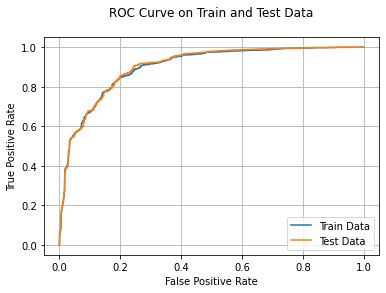

In [68]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_nb, y_train_pred_non_smote_normalized_nb))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_nb, y_test_pred_non_smote_normalized_nb))

plt.plot(train_fpr_non_smote_normalized_nb, train_tpr_non_smote_normalized_nb, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_nb, test_tpr_non_smote_normalized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


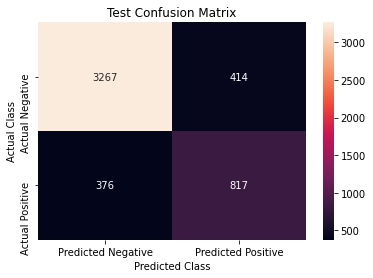

                 Predicted Negative  Predicted Positive
Actual Negative                3267                 414
Actual Positive                 376                 817


In [69]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_nb = confusion_matrix(y_test_non_smote_normalized_nb, nb_non_smote_normalized.predict(x_test_non_smote_normalized_nb).round())
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_nb_df = pd.DataFrame(cm_test_non_smote_normalized_nb, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_nb_df)

In [70]:
_, _, false_negative_non_smote_normalized_nb, true_positive_non_smote_normalized_nb = cm_test_non_smote_normalized_nb.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_nb/(false_negative_non_smote_normalized_nb+true_positive_non_smote_normalized_nb)) * 100, "%")

False Negative Rate =  31.517183570829843 %


In [71]:
print(classification_report(y_test_non_smote_normalized_nb, nb_non_smote_normalized.predict(x_test_non_smote_normalized_nb)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3681
           1       0.66      0.68      0.67      1193

    accuracy                           0.84      4874
   macro avg       0.78      0.79      0.78      4874
weighted avg       0.84      0.84      0.84      4874



In [72]:
features_names_non_smote_normalized_nb = x_non_smote_normalized_nb.columns
features_names_non_smote_normalized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [73]:
nb_class_0_prob_non_smote_normalized = nb_non_smote_normalized.feature_log_prob_[0, :]
nb_class_1_prob_non_smote_normalized = nb_non_smote_normalized.feature_log_prob_[1, :]

In [74]:
feature_names_weights_dict_class_0_non_smote_normalized_nb = dict(zip(features_names_non_smote_normalized_nb, nb_class_0_prob_non_smote_normalized))
feature_names_weights_dict_class_1_non_smote_normalized_nb = dict(zip(features_names_non_smote_normalized_nb, nb_class_1_prob_non_smote_normalized))

In [75]:
feature_names_weights_dict_class_0_non_smote_normalized_nb

{'Work_accident_False': -0.18545102934592883,
 'Work_accident_True': -1.7762573461680082,
 'Department_IT': -2.4456127239291243,
 'Department_RandD': -2.840165760677146,
 'Department_accounting': -3.026215163808165,
 'Department_hr': -3.0220222861341375,
 'Department_management': -3.2567387861091825,
 'Department_product_mng': -2.773812035034153,
 'Department_technical': -1.7012898518904978,
 'salary_high': -2.3528706791718434,
 'salary_low': -0.7674328188958057,
 'salary_medium': -0.8193886549954428,
 'quantile_satisfaction_level_low': -1.9788471191870185,
 'quantile_satisfaction_level_low_mid': -1.2363249706724844,
 'quantile_satisfaction_level_high_mid': -1.2113814147656914,
 'quantile_satisfaction_level_high': -1.2963212805199262,
 'quantile_last_evaluation_rating_low': -1.5321473430179626,
 'quantile_last_evaluation_rating_low_mid': -1.1901664467136648,
 'quantile_last_evaluation_rating_high_mid': -1.3070566223988713,
 'quantile_last_evaluation_rating_high': -1.564738085801185,
 '

In [76]:
feature_names_weights_dict_class_1_non_smote_normalized_nb

{'Work_accident_False': -0.048088271618505374,
 'Work_accident_True': -3.058664749152527,
 'Department_IT': -2.511886296008357,
 'Department_RandD': -3.346346672794861,
 'Department_accounting': -2.814319086965898,
 'Department_hr': -2.817821716290257,
 'Department_management': -3.760780145223209,
 'Department_product_mng': -2.9251334123315527,
 'Department_technical': -1.624431265789016,
 'salary_high': -3.760780145223209,
 'salary_low': -0.4975004288437628,
 'salary_medium': -0.9978104458479988,
 'quantile_satisfaction_level_low': -0.4408783742815068,
 'quantile_satisfaction_level_low_mid': -2.444445032064859,
 'quantile_satisfaction_level_high_mid': -1.955598408415372,
 'quantile_satisfaction_level_high': -2.053578801525033,
 'quantile_last_evaluation_rating_low': -0.9029655197164921,
 'quantile_last_evaluation_rating_low_mid': -2.8462933802379347,
 'quantile_last_evaluation_rating_high_mid': -1.511862759081354,
 'quantile_last_evaluation_rating_high': -1.1517716325551417,
 'quantil

# 11 ML Algorithms 3 - Logistic Regression

In [5]:
dill_load_session('9.4_all_knn_models_completed')

## 11.1 Logistic Regression On SMOTE Standardized Data

In [8]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [130]:
x_smote_standardized_logreg = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_logreg = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [77]:
# splitting into train & test set..
x_train_smote_standardized_logreg, x_test_smote_standardized_logreg, y_train_smote_standardized_logreg, y_test_smote_standardized_logreg = train_test_split(x_smote_standardized_logreg, y_smote_standardized_logreg, test_size = 0.20, random_state=21, stratify=y_smote_standardized_logreg)

print("len(x_train_smote_standardized_logreg) = ", len(x_train_smote_standardized_logreg))
print("len(y_train_smote_standardized_logreg) = ", len(y_train_smote_standardized_logreg))

print("\nlen(x_test_smote_standardized_logreg) = ", len(x_test_smote_standardized_logreg))
print("len(y_test_smote_standardized_logreg) = ", len(y_test_smote_standardized_logreg))

len(x_train_smote_standardized_logreg) =  29444
len(y_train_smote_standardized_logreg) =  29444

len(x_test_smote_standardized_logreg) =  7362
len(y_test_smote_standardized_logreg) =  7362


In [78]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [79]:
logreg_smote_standardized = LogisticRegression()
gcv_logreg_smote_standardized = GridSearchCV(logreg_smote_standardized, hyper_parameter_values_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_logreg_smote_standardized.fit(x_train_smote_standardized_logreg, y_train_smote_standardized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [80]:
gcv_logreg_smote_standardized.best_estimator_

LogisticRegression(C=1000)

In [81]:
gcv_logreg_smote_standardized.best_params_

{'C': 1000, 'penalty': 'l2'}

In [82]:
gcv_logreg_smote_standardized.best_estimator_.coef_

array([[ -1.29573855,   0.12522371,  -0.82009696,   0.2674602 ,
          0.98473857,  -7.06919335,  -9.02156122,  -0.87202157,
         -1.51626699,  -0.58259804,  -0.54472843,  -1.31258425,
         -0.83448814,  -0.41134735, -16.30811373, -14.284565  ,
        -14.68098025]])

In [83]:
gcv_logreg_smote_standardized.best_score_

0.8723932209294217

In [85]:
logreg_smote_standardized = LogisticRegression(C=1000, penalty='l2', n_jobs=12)
logreg_smote_standardized.fit(x_train_smote_standardized_logreg, y_train_smote_standardized_logreg)

LogisticRegression(C=1000, n_jobs=12)

In [86]:
y_train_pred_smote_standardized_logreg = logreg_smote_standardized.predict_proba(x_train_smote_standardized_logreg)[:,1]
y_test_pred_smote_standardized_logreg = logreg_smote_standardized.predict_proba(x_test_smote_standardized_logreg)[:,1]


AUC_train =  0.8727092243160156
AUC_test =  0.8707245094581373


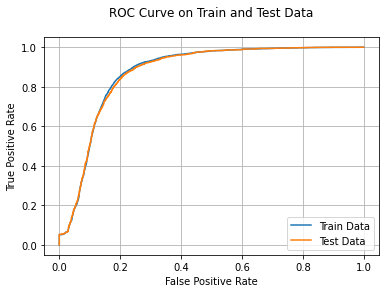

In [87]:
train_fpr_smote_standardized_logreg, train_tpr_smote_standardized_logreg, _ = roc_curve(y_train_smote_standardized_logreg, y_train_pred_smote_standardized_logreg)
test_fpr_smote_standardized_logreg, test_tpr_smote_standardized_logreg, _ = roc_curve(y_test_smote_standardized_logreg, y_test_pred_smote_standardized_logreg)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_logreg, y_train_pred_smote_standardized_logreg))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_logreg, y_test_pred_smote_standardized_logreg))

plt.plot(train_fpr_smote_standardized_logreg, train_tpr_smote_standardized_logreg, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_logreg, test_tpr_smote_standardized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [88]:
y_test_smote_standardized_logreg[:10]

Attrition
17199          0
34607          1
18530          0
19199          0
2329           0
15904          0
10140          1
2620           0
4221           0
8966           0

In [89]:
logreg_smote_standardized.predict(x_test_smote_standardized_logreg).round()

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
y_test_pred_smote_standardized_logreg

array([0.00121284, 0.81028779, 0.22450445, ..., 0.03667694, 0.26293697,
       0.30824206])

Test confusion matrix :


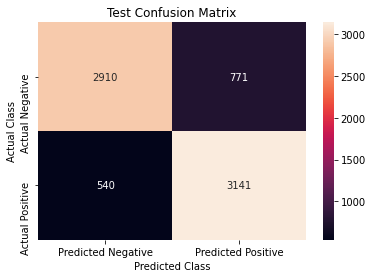

                 Predicted Negative  Predicted Positive
Actual Negative                2910                 771
Actual Positive                 540                3141


In [91]:
print("Test confusion matrix :")
cm_test_smote_standardized_logreg = confusion_matrix(y_test_smote_standardized_logreg, logreg_smote_standardized.predict(x_test_smote_standardized_logreg).round())
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_logreg_df = pd.DataFrame(cm_test_smote_standardized_logreg, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_logreg_df)

In [92]:
_, _, false_negative_smote_standardized_logreg, true_positive_smote_standardized_logreg = cm_test_smote_standardized_logreg.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_logreg/(false_negative_smote_standardized_logreg+true_positive_smote_standardized_logreg)) * 100, "%")

False Negative Rate =  14.66992665036675 %


In [93]:
features_names_smote_standardized_logreg = smote_standardized_df.columns

In [94]:
feature_names_weights_dict_class_1_smote_standardized_logreg = dict(zip(features_names_smote_standardized_logreg, logreg_smote_standardized.coef_[0]))
feature_names_weights_dict_class_0_smote_standardized_logreg = dict(zip(features_names_smote_standardized_logreg, -(logreg_smote_standardized.coef_[0])))

In [95]:
feature_names_weights_dict_class_1_smote_standardized_logreg

{'satisfaction_level': -1.295738545748901,
 'last_evaluation_rating': 0.1252237052987334,
 'projects_worked_on': -0.8200969597097656,
 'average_montly_hours': 0.26746020351714267,
 'time_spend_company': 0.984738574442979,
 'Work_accident_False': -7.069193346290665,
 'Work_accident_True': -9.021561218381159,
 'Department_IT': -0.8720215747995126,
 'Department_RandD': -1.516266993838739,
 'Department_accounting': -0.5825980392690825,
 'Department_hr': -0.5447284255815538,
 'Department_management': -1.31258424718666,
 'Department_product_mng': -0.8344881402032894,
 'Department_technical': -0.4113473522891455,
 'salary_high': -16.308113727628122,
 'salary_low': -14.284564999617132,
 'salary_medium': -14.680980249615274}

In [96]:
feature_names_weights_dict_class_0_smote_standardized_logreg

{'satisfaction_level': 1.295738545748901,
 'last_evaluation_rating': -0.1252237052987334,
 'projects_worked_on': 0.8200969597097656,
 'average_montly_hours': -0.26746020351714267,
 'time_spend_company': -0.984738574442979,
 'Work_accident_False': 7.069193346290665,
 'Work_accident_True': 9.021561218381159,
 'Department_IT': 0.8720215747995126,
 'Department_RandD': 1.516266993838739,
 'Department_accounting': 0.5825980392690825,
 'Department_hr': 0.5447284255815538,
 'Department_management': 1.31258424718666,
 'Department_product_mng': 0.8344881402032894,
 'Department_technical': 0.4113473522891455,
 'salary_high': 16.308113727628122,
 'salary_low': 14.284564999617132,
 'salary_medium': 14.680980249615274}

In [97]:
print(classification_report(y_test_smote_standardized_logreg, logreg_smote_standardized.predict(x_test_smote_standardized_logreg)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      3681
           1       0.80      0.85      0.83      3681

    accuracy                           0.82      7362
   macro avg       0.82      0.82      0.82      7362
weighted avg       0.82      0.82      0.82      7362



## 11.2 Logistic Regression On SMOTE Normalized Data

In [224]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [225]:
x_smote_normalized_logreg = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_logreg = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [98]:
# splitting into train & test set..
x_train_smote_normalized_logreg, x_test_smote_normalized_logreg, y_train_smote_normalized_logreg, y_test_smote_normalized_logreg = train_test_split(x_smote_normalized_logreg, y_smote_normalized_logreg, test_size = 0.20, random_state=21, stratify=y_smote_normalized_logreg)

print("len(x_train_smote_normalized_logreg) = ", len(x_train_smote_normalized_logreg))
print("len(y_train_smote_normalized_logreg) = ", len(y_train_smote_normalized_logreg))

print("\nlen(x_test_smote_normalized_logreg) = ", len(x_test_smote_normalized_logreg))
print("len(y_test_smote_normalized_logreg) = ", len(y_test_smote_normalized_logreg))

len(x_train_smote_normalized_logreg) =  29444
len(y_train_smote_normalized_logreg) =  29444

len(x_test_smote_normalized_logreg) =  7362
len(y_test_smote_normalized_logreg) =  7362


In [99]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [100]:
logreg_smote_normalized = LogisticRegression()
gcv_logreg_smote_normalized = GridSearchCV(logreg_smote_normalized, hyper_parameter_values_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_logreg_smote_normalized.fit(x_train_smote_normalized_logreg, y_train_smote_normalized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [101]:
gcv_logreg_smote_normalized.best_estimator_

LogisticRegression(C=1000)

In [102]:
gcv_logreg_smote_normalized.best_params_

{'C': 1000, 'penalty': 'l2'}

In [103]:
gcv_logreg_smote_normalized.best_estimator_.coef_

array([[ -4.41507813,   0.4453034 ,  -3.23773586,   1.1013224 ,
          4.47916081,  -7.28792445,  -9.24034664,  -0.87168866,
         -1.51510588,  -0.58263298,  -0.54471737,  -1.31153596,
         -0.83440499,  -0.41130986, -15.04629293, -13.02205408,
        -13.41843904]])

In [104]:
gcv_logreg_smote_normalized.best_score_

0.8723937745810378

In [5]:
logreg_smote_normalized = LogisticRegression(C=1000, penalty='l2', n_jobs=12)
logreg_smote_normalized.fit(x_train_smote_normalized_logreg, y_train_smote_normalized_logreg)

LogisticRegression(C=1000, n_jobs=12)

In [6]:
y_train_pred_smote_normalized_logreg = logreg_smote_normalized.predict_proba(x_train_smote_normalized_logreg)[:,1]
y_test_pred_smote_normalized_logreg = logreg_smote_normalized.predict_proba(x_test_smote_normalized_logreg)[:,1]


AUC_train =  0.8730559317254003
AUC_test =  0.8706349137818741


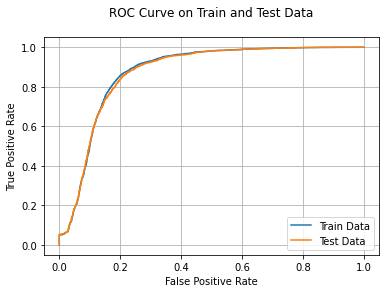

In [7]:
train_fpr_smote_normalized_logreg, train_tpr_smote_normalized_logreg, _ = roc_curve(y_train_smote_normalized_logreg, y_train_pred_smote_normalized_logreg)
test_fpr_smote_normalized_logreg, test_tpr_smote_normalized_logreg, _ = roc_curve(y_test_smote_normalized_logreg, y_test_pred_smote_normalized_logreg)

print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_logreg, y_train_pred_smote_normalized_logreg))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_logreg, y_test_pred_smote_normalized_logreg))

plt.plot(train_fpr_smote_normalized_logreg, train_tpr_smote_normalized_logreg, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_logreg, test_tpr_smote_normalized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [8]:
y_test_smote_normalized_logreg[:10]

Attrition
17199          0
34607          1
18530          0
19199          0
2329           0
15904          0
10140          1
2620           0
4221           0
8966           0

In [9]:
logreg_smote_normalized.predict(x_test_smote_normalized_logreg).round()

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
y_test_pred_smote_normalized_logreg

array([0.00121227, 0.81299224, 0.22262441, ..., 0.03475877, 0.26399951,
       0.30855164])



Test confusion matrix :


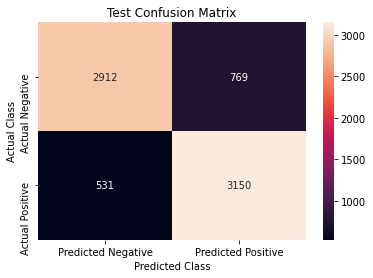

                 Predicted Negative  Predicted Positive
Actual Negative                2912                 769
Actual Positive                 531                3150


In [11]:
print("\n\nTest confusion matrix :")
cm_test_smote_normalized_logreg = confusion_matrix(y_test_smote_normalized_logreg, logreg_smote_normalized.predict(x_test_smote_normalized_logreg).round())
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_logreg_df = pd.DataFrame(cm_test_smote_normalized_logreg, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_logreg_df)

In [12]:
_, _, false_negative_smote_normalized_logreg, true_positive_smote_normalized_logreg = cm_test_smote_normalized_logreg.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_logreg/(false_negative_smote_normalized_logreg+true_positive_smote_normalized_logreg)) * 100, "%")

False Negative Rate =  14.425427872860636 %


In [13]:
features_names_smote_normalized_logreg = smote_normalized_df.columns
feature_names_weights_dict_class_1_smote_normalized_logreg = dict(zip(features_names_smote_normalized_logreg, logreg_smote_normalized.coef_[0]))
feature_names_weights_dict_class_0_smote_normalized_logreg = dict(zip(features_names_smote_normalized_logreg, -(logreg_smote_normalized.coef_[0])))

In [14]:
feature_names_weights_dict_class_1_smote_normalized_logreg

{'satisfaction_level': -4.452612568763862,
 'last_evaluation_rating': 0.48523721306467094,
 'projects_worked_on': -3.301167507112253,
 'average_montly_hours': 1.1044675120095944,
 'time_spend_company': 4.463131333431254,
 'Work_accident_False': -7.067037585653937,
 'Work_accident_True': -9.014895372685789,
 'Department_IT': -0.8851484631659298,
 'Department_RandD': -1.5555494329351465,
 'Department_accounting': -0.5802845161862593,
 'Department_hr': -0.4930445952086325,
 'Department_management': -1.3522645421456645,
 'Department_product_mng': -0.7660267914967824,
 'Department_technical': -0.44023637243527736,
 'salary_high': -14.747641427535694,
 'salary_low': -12.719453050129207,
 'salary_medium': -13.11765393594268}

In [15]:
feature_names_weights_dict_class_0_smote_normalized_logreg

{'satisfaction_level': 4.452612568763862,
 'last_evaluation_rating': -0.48523721306467094,
 'projects_worked_on': 3.301167507112253,
 'average_montly_hours': -1.1044675120095944,
 'time_spend_company': -4.463131333431254,
 'Work_accident_False': 7.067037585653937,
 'Work_accident_True': 9.014895372685789,
 'Department_IT': 0.8851484631659298,
 'Department_RandD': 1.5555494329351465,
 'Department_accounting': 0.5802845161862593,
 'Department_hr': 0.4930445952086325,
 'Department_management': 1.3522645421456645,
 'Department_product_mng': 0.7660267914967824,
 'Department_technical': 0.44023637243527736,
 'salary_high': 14.747641427535694,
 'salary_low': 12.719453050129207,
 'salary_medium': 13.11765393594268}

In [16]:
print(classification_report(y_test_smote_normalized_logreg, logreg_smote_normalized.predict(x_test_smote_normalized_logreg)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3681
           1       0.80      0.86      0.83      3681

    accuracy                           0.82      7362
   macro avg       0.82      0.82      0.82      7362
weighted avg       0.82      0.82      0.82      7362



## 11.3 Logistic Regression On NON-SMOTE Standardized Data

In [17]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [18]:
x_non_smote_standardized_logreg = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_logreg = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [19]:
# splitting into train & test set..
x_train_non_smote_standardized_logreg, x_test_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg, y_test_non_smote_standardized_logreg = train_test_split(x_non_smote_standardized_logreg, y_non_smote_standardized_logreg, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_logreg)

print("len(x_train_non_smote_standardized_logreg) = ", len(x_train_non_smote_standardized_logreg))
print("len(y_train_non_smote_standardized_logreg) = ", len(y_train_non_smote_standardized_logreg))

print("\nlen(x_test_non_smote_standardized_logreg) = ", len(x_test_non_smote_standardized_logreg))
print("len(y_test_non_smote_standardized_logreg) = ", len(y_test_non_smote_standardized_logreg))

len(x_train_non_smote_standardized_logreg) =  19493
len(y_train_non_smote_standardized_logreg) =  19493

len(x_test_non_smote_standardized_logreg) =  4874
len(y_test_non_smote_standardized_logreg) =  4874


In [173]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [118]:
logreg_non_smote_standardized = LogisticRegression()
gcv_logreg_non_smote_standardized = GridSearchCV(logreg_non_smote_standardized, hyper_parameter_values_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_logreg_non_smote_standardized.fit(x_train_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [119]:
gcv_logreg_non_smote_standardized.best_estimator_

LogisticRegression(C=0.01)

In [120]:
gcv_logreg_non_smote_standardized.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [121]:
gcv_logreg_non_smote_standardized.best_estimator_.coef_

array([[-0.93898596,  0.08256622, -0.40782384,  0.19093566,  0.61272956,
         0.58663233, -0.58653935, -0.06548621, -0.29526719,  0.07442988,
         0.11940156, -0.17374212, -0.10138025,  0.07458654, -0.63955502,
         0.55020186,  0.08944614]])

In [122]:
gcv_logreg_non_smote_standardized.best_score_

0.8473043174446353

In [20]:
logreg_non_smote_standardized = LogisticRegression(C=0.01, penalty='l2', class_weight='balanced', n_jobs=12)
logreg_non_smote_standardized.fit(x_train_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg)

LogisticRegression(C=0.01, class_weight='balanced', n_jobs=12)

In [21]:
y_train_pred_non_smote_standardized_logreg = logreg_non_smote_standardized.predict_proba(x_train_non_smote_standardized_logreg)[:,1]
y_test_pred_non_smote_standardized_logreg = logreg_non_smote_standardized.predict_proba(x_test_non_smote_standardized_logreg)[:,1]

In [22]:
train_fpr_non_smote_standardized_logreg, train_tpr_non_smote_standardized_logreg, _ = roc_curve(y_train_non_smote_standardized_logreg, y_train_pred_non_smote_standardized_logreg)
test_fpr_non_smote_standardized_logreg, test_tpr_non_smote_standardized_logreg, _ = roc_curve(y_test_non_smote_standardized_logreg, y_test_pred_non_smote_standardized_logreg)

In [23]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_logreg, y_train_pred_non_smote_standardized_logreg))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_logreg, y_test_pred_non_smote_standardized_logreg))


AUC_train =  0.8519700161714355
AUC_test =  0.8528810527224256


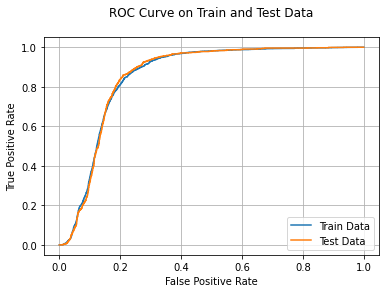

In [24]:
plt.plot(train_fpr_non_smote_standardized_logreg, train_tpr_non_smote_standardized_logreg, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_logreg, test_tpr_non_smote_standardized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



Test confusion matrix :


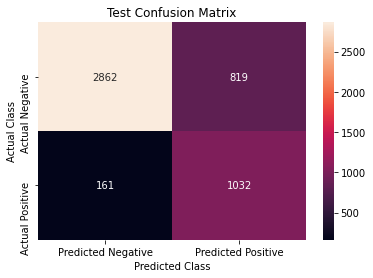

                 Predicted Negative  Predicted Positive
Actual Negative                2862                 819
Actual Positive                 161                1032


In [25]:
print("\n\nTest confusion matrix :")
cm_test_non_smote_standardized_logreg = confusion_matrix(y_test_non_smote_standardized_logreg, logreg_non_smote_standardized.predict(x_test_non_smote_standardized_logreg).round())
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_logreg_df = pd.DataFrame(cm_test_non_smote_standardized_logreg, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_logreg_df)

In [26]:
_, _, false_negative_non_smote_standardized_logreg, true_positive_non_smote_standardized_logreg = cm_test_non_smote_standardized_logreg.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_logreg/(false_negative_non_smote_standardized_logreg+true_positive_non_smote_standardized_logreg)) * 100, "%")

False Negative Rate =  13.4953897736798 %


In [27]:
features_names_non_smote_standardized_logreg = non_smote_standardized_df.columns

In [28]:
feature_names_weights_dict_class_1_non_smote_standardized_logreg = dict(zip(features_names_non_smote_standardized_logreg, logreg_non_smote_standardized.coef_[0]))
feature_names_weights_dict_class_0_non_smote_standardized_logreg = dict(zip(features_names_non_smote_standardized_logreg, -(logreg_non_smote_standardized.coef_[0])))

In [29]:
feature_names_weights_dict_class_1_non_smote_standardized_logreg

{'satisfaction_level': -1.0765303393960992,
 'last_evaluation_rating': 0.08309388387575066,
 'projects_worked_on': -0.5349999800181345,
 'average_montly_hours': 0.18312229571154326,
 'time_spend_company': 0.9531307788978208,
 'Attrition': 0.5981038627493951,
 'Work_accident_False': -0.5980654898597918,
 'Work_accident_True': -0.07069904964776141,
 'Department_IT': -0.2899461139756346,
 'Department_RandD': 0.08224604172833747,
 'Department_accounting': 0.13596347474075351,
 'Department_hr': -0.1934778621644648,
 'Department_management': -0.09895407617367881,
 'Department_product_mng': 0.07554973391410494,
 'Department_technical': -0.6750979898277135,
 'salary_high': 0.5500562026227641,
 'salary_low': 0.12508016009455228}

In [30]:
feature_names_weights_dict_class_0_non_smote_standardized_logreg

{'satisfaction_level': 1.0765303393960992,
 'last_evaluation_rating': -0.08309388387575066,
 'projects_worked_on': 0.5349999800181345,
 'average_montly_hours': -0.18312229571154326,
 'time_spend_company': -0.9531307788978208,
 'Attrition': -0.5981038627493951,
 'Work_accident_False': 0.5980654898597918,
 'Work_accident_True': 0.07069904964776141,
 'Department_IT': 0.2899461139756346,
 'Department_RandD': -0.08224604172833747,
 'Department_accounting': -0.13596347474075351,
 'Department_hr': 0.1934778621644648,
 'Department_management': 0.09895407617367881,
 'Department_product_mng': -0.07554973391410494,
 'Department_technical': 0.6750979898277135,
 'salary_high': -0.5500562026227641,
 'salary_low': -0.12508016009455228}

In [31]:
print(classification_report(y_test_non_smote_standardized_logreg, logreg_non_smote_standardized.predict(x_test_non_smote_standardized_logreg)))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      3681
           1       0.56      0.87      0.68      1193

    accuracy                           0.80      4874
   macro avg       0.75      0.82      0.77      4874
weighted avg       0.85      0.80      0.81      4874



## 11.4 Logistic Regression On NON-SMOTE Normalized Data

In [190]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [191]:
x_non_smote_normalized_logreg = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_logreg = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [192]:
y_non_smote_normalized_logreg.value_counts()

Attrition
0            18403
1             5964
dtype: int64

In [135]:
# splitting into train & test set..
x_train_non_smote_normalized_logreg, x_test_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg, y_test_non_smote_normalized_logreg = train_test_split(x_non_smote_normalized_logreg, y_non_smote_normalized_logreg, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_logreg)

print("len(x_train_non_smote_normalized_logreg) = ", len(x_train_non_smote_normalized_logreg))
print("len(y_train_non_smote_normalized_logreg) = ", len(y_train_non_smote_normalized_logreg))

print("\nlen(x_test_non_smote_normalized_logreg) = ", len(x_test_non_smote_normalized_logreg))
print("len(y_test_non_smote_normalized_logreg) = ", len(y_test_non_smote_normalized_logreg))

len(x_train_non_smote_normalized_logreg) =  19493
len(y_train_non_smote_normalized_logreg) =  19493

len(x_test_non_smote_normalized_logreg) =  4874
len(y_test_non_smote_normalized_logreg) =  4874


In [136]:
y_test_non_smote_normalized_logreg.value_counts()

Attrition
0            3681
1            1193
dtype: int64

In [137]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [138]:
logreg_non_smote_normalized = LogisticRegression()
gcv_logreg_non_smote_normalized = GridSearchCV(logreg_non_smote_normalized, hyper_parameter_values_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_logreg_non_smote_normalized.fit(x_train_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [139]:
gcv_logreg_non_smote_normalized.best_estimator_

LogisticRegression(C=1000)

In [140]:
gcv_logreg_non_smote_normalized.best_params_

{'C': 1000, 'penalty': 'l2'}

In [141]:
gcv_logreg_non_smote_normalized.best_estimator_.coef_

array([[-3.65140567,  0.36605504, -2.07770546,  0.94114227,  2.89388155,
         0.46144581, -1.07636764, -0.1250903 , -0.58259826,  0.09863642,
         0.16438883, -0.35997553, -0.1915937 ,  0.06836071, -1.2796858 ,
         0.58081648,  0.08394749]])

In [142]:
gcv_logreg_non_smote_normalized.best_score_

0.8458401368420413

In [32]:
logreg_non_smote_normalized = LogisticRegression(C=1000, penalty='l2', class_weight='balanced', n_jobs=12)
logreg_non_smote_normalized.fit(x_train_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg)

LogisticRegression(C=1000, class_weight='balanced', n_jobs=12)

In [33]:
y_train_pred_non_smote_normalized_logreg = logreg_non_smote_normalized.predict_proba(x_train_non_smote_normalized_logreg)[:,1]
y_test_pred_non_smote_normalized_logreg = logreg_non_smote_normalized.predict_proba(x_test_non_smote_normalized_logreg)[:,1]

In [34]:
train_fpr_non_smote_normalized_logreg, train_tpr_non_smote_normalized_logreg, _ = roc_curve(y_train_non_smote_normalized_logreg, y_train_pred_non_smote_normalized_logreg)
test_fpr_non_smote_normalized_logreg, test_tpr_non_smote_normalized_logreg, _ = roc_curve(y_test_non_smote_normalized_logreg, y_test_pred_non_smote_normalized_logreg)

In [35]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_logreg, y_train_pred_non_smote_normalized_logreg))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_logreg, y_test_pred_non_smote_normalized_logreg))


AUC_train =  0.8523566347099688
AUC_test =  0.852725978057732


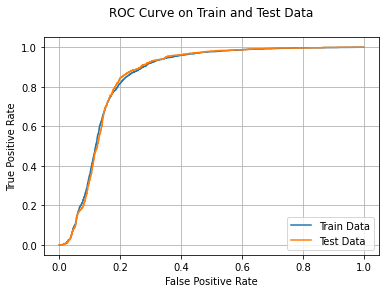

In [36]:
plt.plot(train_fpr_non_smote_normalized_logreg, train_tpr_non_smote_normalized_logreg, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_logreg, test_tpr_non_smote_normalized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



Test confusion matrix :


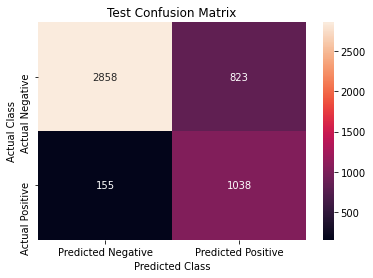

                 Predicted Negative  Predicted Positive
Actual Negative                2858                 823
Actual Positive                 155                1038


In [37]:
print("\n\nTest confusion matrix :")
cm_test_non_smote_normalized_logreg = confusion_matrix(y_test_non_smote_normalized_logreg, logreg_non_smote_normalized.predict(x_test_non_smote_normalized_logreg).round())
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_logreg_df = pd.DataFrame(cm_test_non_smote_normalized_logreg, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_logreg_df)

In [38]:
_, _, false_negative_non_smote_normalized_logreg, true_positive_non_smote_normalized_logreg = cm_test_non_smote_normalized_logreg.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_logreg/(false_negative_non_smote_normalized_logreg+true_positive_non_smote_normalized_logreg)) * 100, "%")

False Negative Rate =  12.992455993294216 %


In [39]:
features_names_non_smote_normalized_logreg = non_smote_normalized_df.columns

In [40]:
feature_names_weights_dict_class_1_non_smote_normalized_logreg = dict(zip(features_names_non_smote_normalized_logreg, logreg_non_smote_normalized.coef_[0]))
feature_names_weights_dict_class_0_non_smote_normalized_logreg = dict(zip(features_names_non_smote_normalized_logreg, -(logreg_non_smote_normalized.coef_[0])))

In [41]:
feature_names_weights_dict_class_1_non_smote_normalized_logreg

{'satisfaction_level': -4.202971835597343,
 'last_evaluation_rating': 0.4408679227965396,
 'projects_worked_on': -2.733304224719489,
 'average_montly_hours': 0.8725672708490584,
 'time_spend_company': 4.519576057570657,
 'Attrition': 0.7535856321353688,
 'Work_accident_False': -0.7483110247113335,
 'Work_accident_True': -0.1349759417790744,
 'Department_IT': -0.48210561593709295,
 'Department_RandD': 0.11509646583410131,
 'Department_accounting': 0.1700293410916175,
 'Department_hr': -0.48727855996741853,
 'Department_management': -0.14781331998017708,
 'Department_product_mng': 0.07824006375276778,
 'Department_technical': -1.0028554142187518,
 'salary_high': 0.7246067254166468,
 'salary_low': 0.28352329622614103}

In [42]:
feature_names_weights_dict_class_0_non_smote_normalized_logreg

{'satisfaction_level': 4.202971835597343,
 'last_evaluation_rating': -0.4408679227965396,
 'projects_worked_on': 2.733304224719489,
 'average_montly_hours': -0.8725672708490584,
 'time_spend_company': -4.519576057570657,
 'Attrition': -0.7535856321353688,
 'Work_accident_False': 0.7483110247113335,
 'Work_accident_True': 0.1349759417790744,
 'Department_IT': 0.48210561593709295,
 'Department_RandD': -0.11509646583410131,
 'Department_accounting': -0.1700293410916175,
 'Department_hr': 0.48727855996741853,
 'Department_management': 0.14781331998017708,
 'Department_product_mng': -0.07824006375276778,
 'Department_technical': 1.0028554142187518,
 'salary_high': -0.7246067254166468,
 'salary_low': -0.28352329622614103}

In [43]:
print(classification_report(y_test_non_smote_normalized_logreg, logreg_non_smote_normalized.predict(x_test_non_smote_normalized_logreg)))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      3681
           1       0.56      0.87      0.68      1193

    accuracy                           0.80      4874
   macro avg       0.75      0.82      0.77      4874
weighted avg       0.85      0.80      0.81      4874



In [275]:
dill_dump_session('11.4_all_logistic_regression_models_completed')

# 12 ML Algorithms 4 - Support Vector Machines (SVM)

In [4]:
dill_load_session('11.4_all_logistic_regression_models_completed')

## 12.1 SVM On SMOTE Standardized Data

In [155]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [156]:
x_smote_standardized_svm = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_svm = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [157]:
# splitting into train & test set..
x_train_smote_standardized_svm, x_test_smote_standardized_svm, y_train_smote_standardized_svm, y_test_smote_standardized_svm = train_test_split(x_smote_standardized_svm, y_smote_standardized_svm, test_size = 0.20, random_state=21, stratify=y_smote_standardized_svm)

print("len(x_train_smote_standardized_svm) = ", len(x_train_smote_standardized_svm))
print("len(y_train_smote_standardized_svm) = ", len(y_train_smote_standardized_svm))

print("\nlen(x_test_smote_standardized_svm) = ", len(x_test_smote_standardized_svm))
print("len(y_test_smote_standardized_svm) = ", len(y_test_smote_standardized_svm))

len(x_train_smote_standardized_svm) =  29444
len(y_train_smote_standardized_svm) =  29444

len(x_test_smote_standardized_svm) =  7362
len(y_test_smote_standardized_svm) =  7362


In [158]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [9]:
# class_weight='balanced'

In [44]:
svm_smote_standardized = SVC()
gcv_svm_smote_standardized = GridSearchCV(svm_smote_standardized, hyper_parameter_values_svm_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_svm_smote_standardized.fit(x_train_smote_standardized_svm, y_train_smote_standardized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [45]:
gcv_svm_smote_standardized.best_estimator_

SVC(C=100)

In [46]:
gcv_svm_smote_standardized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [47]:
gcv_svm_smote_standardized.best_estimator_.dual_coef_

array([[ -11.32399065, -100.        ,  -33.37740231, ...,   19.68507334,
          18.19996035,  100.        ]])

In [48]:
gcv_svm_smote_standardized.best_score_

0.992648016177695

In [49]:
svm_smote_standardized = SVC(C=100, kernel='rbf')
svm_smote_standardized.fit(x_train_smote_standardized_svm, y_train_smote_standardized_svm)

SVC(C=100)

In [50]:
y_train_pred_smote_standardized_svm = svm_smote_standardized.predict(x_train_smote_standardized_svm)#[:,1]
y_test_pred_smote_standardized_svm = svm_smote_standardized.predict(x_test_smote_standardized_svm)#[:,1]

In [51]:
len(svm_smote_standardized.dual_coef_[0])

2165

In [52]:
svm_smote_standardized.n_support_

array([1092, 1073])

In [53]:
svm_smote_standardized.classes_

array([0, 1], dtype=int64)


AUC_train =  0.9831880339909796
AUC_test =  0.9731051344743277


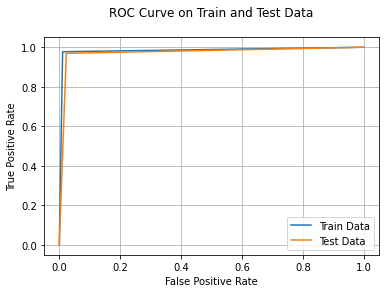

In [54]:
train_fpr_smote_standardized_svm, train_tpr_smote_standardized_svm, _ = roc_curve(y_train_smote_standardized_svm, y_train_pred_smote_standardized_svm)
test_fpr_smote_standardized_svm, test_tpr_smote_standardized_svm, _ = roc_curve(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_svm, y_train_pred_smote_standardized_svm))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm))

plt.plot(train_fpr_smote_standardized_svm, train_tpr_smote_standardized_svm, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_svm, test_tpr_smote_standardized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


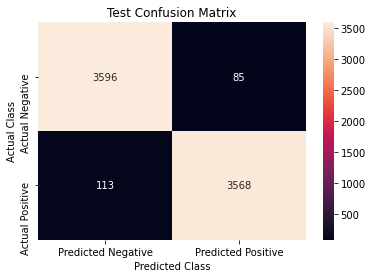

                 Predicted Negative  Predicted Positive
Actual Negative                3596                  85
Actual Positive                 113                3568


In [55]:
print("Test confusion matrix :")
cm_test_smote_standardized_svm = confusion_matrix(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_svm_df = pd.DataFrame(cm_test_smote_standardized_svm, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_svm_df)

In [58]:
_, _, false_negative_smote_standardized_svm, true_positive_smote_standardized_svm = cm_test_smote_standardized_svm.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_svm/(false_negative_smote_standardized_svm+true_positive_smote_standardized_svm)) * 100, "%")

False Negative Rate =  3.069817984243412 %


In [57]:
# features_names_smote_standardized_svm = smote_standardized_df.columns

In [32]:
# feature_names_weights_dict_class_1_smote_standardized_svm = dict(zip(features_names_smote_standardized_svm, svm_smote_standardized.dual_coef_[0]))
# feature_names_weights_dict_class_0_smote_standardized_svm = dict(zip(features_names_smote_standardized_svm, -(svm_smote_standardized.dual_coef_[0])))

In [33]:
# feature_names_weights_dict_class_1_smote_standardized_svm

In [34]:
# feature_names_weights_dict_class_0_smote_standardized_svm

In [35]:
print(classification_report(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3681
           1       0.98      0.97      0.97      3681

    accuracy                           0.97      7362
   macro avg       0.97      0.97      0.97      7362
weighted avg       0.97      0.97      0.97      7362



## 12.2 SVM On SMOTE Normalized Data

In [36]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [37]:
x_smote_normalized_svm = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_svm = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [59]:
# splitting into train & test set..
x_train_smote_normalized_svm, x_test_smote_normalized_svm, y_train_smote_normalized_svm, y_test_smote_normalized_svm = train_test_split(x_smote_normalized_svm, y_smote_normalized_svm, test_size = 0.20, random_state=21, stratify=y_smote_normalized_svm)

print("len(x_train_smote_normalized_svm) = ", len(x_train_smote_normalized_svm))
print("len(y_train_smote_normalized_svm) = ", len(y_train_smote_normalized_svm))

print("\nlen(x_test_smote_normalized_svm) = ", len(x_test_smote_normalized_svm))
print("len(y_test_smote_normalized_svm) = ", len(y_test_smote_normalized_svm))

len(x_train_smote_normalized_svm) =  29444
len(y_train_smote_normalized_svm) =  29444

len(x_test_smote_normalized_svm) =  7362
len(y_test_smote_normalized_svm) =  7362


In [60]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [61]:
svm_smote_normalized = SVC()
gcv_svm_smote_normalized = GridSearchCV(svm_smote_normalized, hyper_parameter_values_svm_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_svm_smote_normalized.fit(x_train_smote_normalized_svm, y_train_smote_normalized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [62]:
gcv_svm_smote_normalized.best_estimator_

SVC(C=100)

In [63]:
gcv_svm_smote_normalized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [64]:
gcv_svm_smote_normalized.best_estimator_.dual_coef_

array([[ -21.90692109, -100.        , -100.        , ...,  100.        ,
         100.        ,  100.        ]])

In [65]:
gcv_svm_smote_normalized.best_score_

0.9857905775319686

In [66]:
svm_smote_normalized = SVC(C=100, kernel='rbf')
svm_smote_normalized.fit(x_train_smote_normalized_svm, y_train_smote_normalized_svm)

SVC(C=100)

In [67]:
y_train_pred_smote_normalized_svm = svm_smote_normalized.predict(x_train_smote_normalized_svm)
y_test_pred_smote_normalized_svm = svm_smote_normalized.predict(x_test_smote_normalized_svm)


AUC_train =  0.9647126749083005
AUC_test =  0.9577560445531106


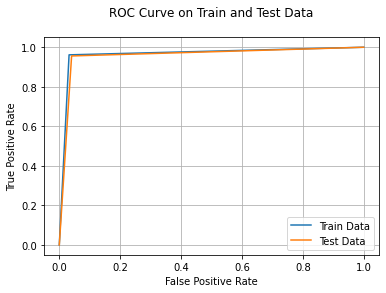

In [68]:
train_fpr_smote_normalized_svm, train_tpr_smote_normalized_svm, _ = roc_curve(y_train_smote_normalized_svm, y_train_pred_smote_normalized_svm)
test_fpr_smote_normalized_svm, test_tpr_smote_normalized_svm, _ = roc_curve(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_svm, y_train_pred_smote_normalized_svm))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm))

plt.plot(train_fpr_smote_normalized_svm, train_tpr_smote_normalized_svm, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_svm, test_tpr_smote_normalized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


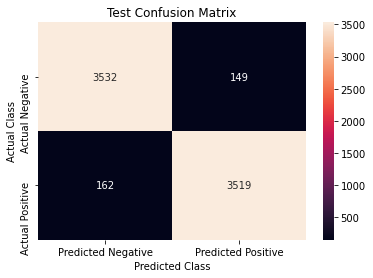

                 Predicted Negative  Predicted Positive
Actual Negative                3532                 149
Actual Positive                 162                3519


In [69]:
print("Test confusion matrix :")
cm_test_smote_normalized_svm = confusion_matrix(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_svm_df = pd.DataFrame(cm_test_smote_normalized_svm, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_svm_df)

In [70]:
_, _, false_negative_smote_normalized_svm, true_positive_smote_normalized_svm = cm_test_smote_normalized_svm.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_svm/(false_negative_smote_normalized_svm+true_positive_smote_normalized_svm)) * 100, "%")

False Negative Rate =  4.400977995110025 %


In [71]:
print(classification_report(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3681
           1       0.96      0.96      0.96      3681

    accuracy                           0.96      7362
   macro avg       0.96      0.96      0.96      7362
weighted avg       0.96      0.96      0.96      7362



## 12.3 SVM On NON-SMOTE Standardized Data

In [52]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [53]:
x_non_smote_standardized_svm = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_svm = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [72]:
# splitting into train & test set..
x_train_non_smote_standardized_svm, x_test_non_smote_standardized_svm, y_train_non_smote_standardized_svm, y_test_non_smote_standardized_svm = train_test_split(x_non_smote_standardized_svm, y_non_smote_standardized_svm, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_svm)

print("len(x_train_non_smote_standardized_svm) = ", len(x_train_non_smote_standardized_svm))
print("len(y_train_non_smote_standardized_svm) = ", len(y_train_non_smote_standardized_svm))

print("\nlen(x_test_non_smote_standardized_svm) = ", len(x_test_non_smote_standardized_svm))
print("len(y_test_non_smote_standardized_svm) = ", len(y_test_non_smote_standardized_svm))

len(x_train_non_smote_standardized_svm) =  19493
len(y_train_non_smote_standardized_svm) =  19493

len(x_test_non_smote_standardized_svm) =  4874
len(y_test_non_smote_standardized_svm) =  4874


In [73]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [74]:
svm_non_smote_standardized = SVC()
gcv_svm_non_smote_standardized = GridSearchCV(svm_non_smote_standardized, hyper_parameter_values_svm_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_svm_non_smote_standardized.fit(x_train_non_smote_standardized_svm, y_train_non_smote_standardized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [75]:
gcv_svm_non_smote_standardized.best_estimator_

SVC(C=100)

In [76]:
gcv_svm_non_smote_standardized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [77]:
gcv_svm_non_smote_standardized.best_estimator_.dual_coef_

array([[ -10.91616023, -100.        ,  -16.85778302, ...,  100.        ,
         100.        ,  100.        ]])

In [78]:
gcv_svm_non_smote_standardized.best_score_

0.9879528029592268

In [79]:
svm_non_smote_standardized = SVC(C=100, class_weight='balanced', kernel='rbf')
svm_non_smote_standardized.fit(x_train_non_smote_standardized_svm, y_train_non_smote_standardized_svm)

SVC(C=100, class_weight='balanced')

In [80]:
y_train_pred_non_smote_standardized_svm = svm_non_smote_standardized.predict(x_train_non_smote_standardized_svm)
y_test_pred_non_smote_standardized_svm = svm_non_smote_standardized.predict(x_test_non_smote_standardized_svm)


AUC_train =  0.9858006193227314
AUC_test =  0.9697764943698334


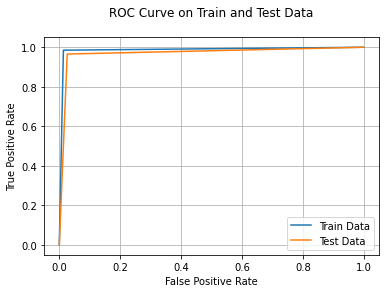

In [81]:
train_fpr_non_smote_standardized_svm, train_tpr_non_smote_standardized_svm, _ = roc_curve(y_train_non_smote_standardized_svm, y_train_pred_non_smote_standardized_svm)
test_fpr_non_smote_standardized_svm, test_tpr_non_smote_standardized_svm, _ = roc_curve(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_svm, y_train_pred_non_smote_standardized_svm))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm))

plt.plot(train_fpr_non_smote_standardized_svm, train_tpr_non_smote_standardized_svm, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_svm, test_tpr_non_smote_standardized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


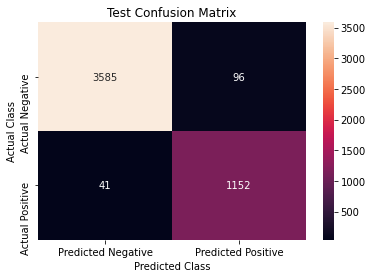

                 Predicted Negative  Predicted Positive
Actual Negative                3585                  96
Actual Positive                  41                1152


In [82]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_svm = confusion_matrix(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_svm_df = pd.DataFrame(cm_test_non_smote_standardized_svm, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_svm_df)

In [83]:
_, _, false_negative_non_smote_standardized_svm, true_positive_non_smote_standardized_svm = cm_test_non_smote_standardized_svm.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_svm/(false_negative_non_smote_standardized_svm+true_positive_non_smote_standardized_svm)) * 100, "%")

False Negative Rate =  3.4367141659681475 %


In [84]:
print(classification_report(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3681
           1       0.92      0.97      0.94      1193

    accuracy                           0.97      4874
   macro avg       0.96      0.97      0.96      4874
weighted avg       0.97      0.97      0.97      4874



## 12.4 SVM On NON-SMOTE Normalized Data

In [67]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [68]:
x_non_smote_normalized_svm = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_svm = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [85]:
# splitting into train & test set..
x_train_non_smote_normalized_svm, x_test_non_smote_normalized_svm, y_train_non_smote_normalized_svm, y_test_non_smote_normalized_svm = train_test_split(x_non_smote_normalized_svm, y_non_smote_normalized_svm, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_svm)

print("len(x_train_non_smote_normalized_svm) = ", len(x_train_non_smote_normalized_svm))
print("len(y_train_non_smote_normalized_svm) = ", len(y_train_non_smote_normalized_svm))

print("\nlen(x_test_non_smote_normalized_svm) = ", len(x_test_non_smote_normalized_svm))
print("len(y_test_non_smote_normalized_svm) = ", len(y_test_non_smote_normalized_svm))

len(x_train_non_smote_normalized_svm) =  19493
len(y_train_non_smote_normalized_svm) =  19493

len(x_test_non_smote_normalized_svm) =  4874
len(y_test_non_smote_normalized_svm) =  4874


In [86]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [87]:
svm_non_smote_normalized = SVC()
gcv_svm_non_smote_normalized = GridSearchCV(svm_non_smote_normalized, hyper_parameter_values_svm_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_svm_non_smote_normalized.fit(x_train_non_smote_normalized_svm, y_train_non_smote_normalized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [88]:
gcv_svm_non_smote_normalized.best_estimator_

SVC(C=100)

In [89]:
gcv_svm_non_smote_normalized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [90]:
gcv_svm_non_smote_normalized.best_estimator_.dual_coef_

array([[-100., -100., -100., ...,  100.,  100.,  100.]])

In [91]:
gcv_svm_non_smote_normalized.best_score_

0.9759120702321858

In [92]:
svm_non_smote_normalized = SVC(C=100, class_weight='balanced', kernel='rbf')
svm_non_smote_normalized.fit(x_train_non_smote_normalized_svm, y_train_non_smote_normalized_svm)

SVC(C=100, class_weight='balanced')

In [93]:
y_train_pred_non_smote_normalized_svm = svm_non_smote_normalized.predict(x_train_non_smote_normalized_svm)
y_test_pred_non_smote_normalized_svm = svm_non_smote_normalized.predict(x_test_non_smote_normalized_svm)


AUC_train =  0.9571961450518519
AUC_test =  0.9528054965201564


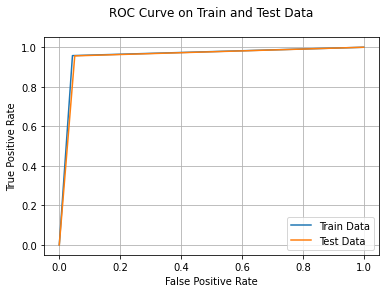

In [94]:
train_fpr_non_smote_normalized_svm, train_tpr_non_smote_normalized_svm, _ = roc_curve(y_train_non_smote_normalized_svm, y_train_pred_non_smote_normalized_svm)
test_fpr_non_smote_normalized_svm, test_tpr_non_smote_normalized_svm, _ = roc_curve(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_svm, y_train_pred_non_smote_normalized_svm))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm))

plt.plot(train_fpr_non_smote_normalized_svm, train_tpr_non_smote_normalized_svm, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_svm, test_tpr_non_smote_normalized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


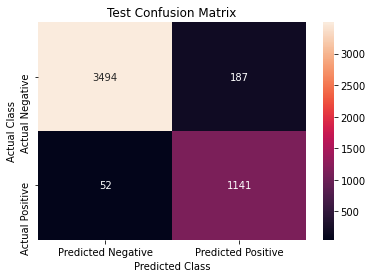

                 Predicted Negative  Predicted Positive
Actual Negative                3494                 187
Actual Positive                  52                1141


In [95]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_svm = confusion_matrix(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_svm_df = pd.DataFrame(cm_test_non_smote_normalized_svm, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_svm_df)

In [96]:
_, _, false_negative_non_smote_normalized_svm, true_positive_non_smote_normalized_svm = cm_test_non_smote_normalized_svm.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_svm/(false_negative_non_smote_normalized_svm+true_positive_non_smote_normalized_svm)) * 100, "%")

False Negative Rate =  4.358759430008382 %


In [97]:
print(classification_report(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3681
           1       0.86      0.96      0.91      1193

    accuracy                           0.95      4874
   macro avg       0.92      0.95      0.94      4874
weighted avg       0.95      0.95      0.95      4874



In [82]:
dill_dump_session('12.4_all_support_vector_machines_models_completed')

# 13 ML Algorithms 5 - Decision Trees (DT)

In [6]:
dill_load_session('12.4_all_support_vector_machines_models_completed')

## 13.1 DT On SMOTE Standardized Data

In [7]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [8]:
x_smote_standardized_dt = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_dt = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [98]:
# splitting into train & test set..
x_train_smote_standardized_dt, x_test_smote_standardized_dt, y_train_smote_standardized_dt, y_test_smote_standardized_dt = train_test_split(x_smote_standardized_dt, y_smote_standardized_dt, test_size = 0.20, random_state=21, stratify=y_smote_standardized_dt)

print("len(x_train_smote_standardized_dt) = ", len(x_train_smote_standardized_dt))
print("len(y_train_smote_standardized_dt) = ", len(y_train_smote_standardized_dt))

print("\nlen(x_test_smote_standardized_dt) = ", len(x_test_smote_standardized_dt))
print("len(y_test_smote_standardized_dt) = ", len(y_test_smote_standardized_dt))

len(x_train_smote_standardized_dt) =  29444
len(y_train_smote_standardized_dt) =  29444

len(x_test_smote_standardized_dt) =  7362
len(y_test_smote_standardized_dt) =  7362


In [99]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [100]:
# class_weight='balanced'

In [101]:
dt_smote_standardized = DecisionTreeClassifier()
gcv_dt_smote_standardized = GridSearchCV(dt_smote_standardized, hyper_parameter_values_dt_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_dt_smote_standardized.fit(x_train_smote_standardized_dt, y_train_smote_standardized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100]},
             scoring='roc_auc')

In [102]:
gcv_dt_smote_standardized.best_estimator_

DecisionTreeClassifier(max_depth=15, max_features='auto', min_samples_leaf=10)

In [103]:
gcv_dt_smote_standardized.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 10}

In [104]:
gcv_dt_smote_standardized.best_score_

0.9864892279081511

In [106]:
dt_smote_standardized = DecisionTreeClassifier(criterion=gcv_dt_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_dt_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_dt_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_smote_standardized.best_params_['min_samples_leaf']
                                               )
dt_smote_standardized.fit(x_train_smote_standardized_dt, y_train_smote_standardized_dt)

DecisionTreeClassifier(max_depth=15, max_features='auto', min_samples_leaf=10)

In [107]:
y_train_pred_smote_standardized_dt = dt_smote_standardized.predict(x_train_smote_standardized_dt)
y_test_pred_smote_standardized_dt = dt_smote_standardized.predict(x_test_smote_standardized_dt)


AUC_train =  0.9580899334329575
AUC_test =  0.9474327628361858


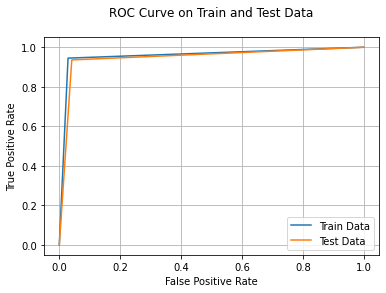

In [108]:
train_fpr_smote_standardized_dt, train_tpr_smote_standardized_dt, _ = roc_curve(y_train_smote_standardized_dt, y_train_pred_smote_standardized_dt)
test_fpr_smote_standardized_dt, test_tpr_smote_standardized_dt, _ = roc_curve(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_dt, y_train_pred_smote_standardized_dt))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt))

plt.plot(train_fpr_smote_standardized_dt, train_tpr_smote_standardized_dt, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_dt, test_tpr_smote_standardized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


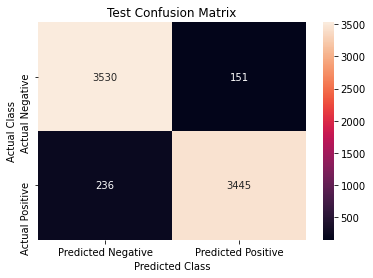

                 Predicted Negative  Predicted Positive
Actual Negative                3530                 151
Actual Positive                 236                3445


In [109]:
print("Test confusion matrix :")
cm_test_smote_standardized_dt = confusion_matrix(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_dt_df = pd.DataFrame(cm_test_smote_standardized_dt, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_dt_df)

In [110]:
_, _, false_negative_smote_standardized_dt, true_positive_smote_standardized_dt = cm_test_smote_standardized_dt.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_dt/(false_negative_smote_standardized_dt+true_positive_smote_standardized_dt)) * 100, "%")

False Negative Rate =  6.411301276826949 %


In [111]:
print(classification_report(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3681
           1       0.96      0.94      0.95      3681

    accuracy                           0.95      7362
   macro avg       0.95      0.95      0.95      7362
weighted avg       0.95      0.95      0.95      7362



In [112]:
x_smote_standardized_dt.columns

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident_False',
       'Work_accident_True', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_product_mng', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [113]:
dot_data_smote_standardized = tree.export_graphviz(dt_smote_standardized, 
                                out_file=None, 
                                feature_names=x_smote_standardized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_smote_standardized = graphviz.Source(dot_data_smote_standardized, format="png") 
# graph_smote_standardized

In [114]:
graph_smote_standardized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_smote_standardized')

'D:/BITS/Semester 4/dev/save/png\\decision_tree_smote_standardized.png'

In [115]:
feature_importance_smote_standardized_dt = pd.DataFrame({'Feature Importance': dt_smote_standardized.feature_importances_}, index=x_smote_standardized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_standardized_dt.head(20)

Feature Importance
satisfaction_level                0.389852
time_spend_company                0.307141
last_evaluation_rating            0.123265
average_montly_hours              0.092295
Work_accident_True                0.052539
projects_worked_on                0.012788
salary_high                       0.010840
salary_medium                     0.004696
Department_management             0.002153
salary_low                        0.001952
Department_technical              0.001296
Department_IT                     0.000418
Department_product_mng            0.000283
Department_RandD                  0.000142
Department_hr                     0.000126
Department_accounting             0.000120
Work_accident_False               0.000093

In [38]:
# dill_dump_session('13.1_working_on_dt')

In [11]:
# dill_load_session('13.1_working_on_dt')

## 13.2 DT On SMOTE Normalized Data

In [12]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [13]:
x_smote_normalized_dt = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_dt = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [116]:
# splitting into train & test set..
x_train_smote_normalized_dt, x_test_smote_normalized_dt, y_train_smote_normalized_dt, y_test_smote_normalized_dt = train_test_split(x_smote_normalized_dt, y_smote_normalized_dt, test_size = 0.20, random_state=21, stratify=y_smote_normalized_dt)

print("len(x_train_smote_normalized_dt) = ", len(x_train_smote_normalized_dt))
print("len(y_train_smote_normalized_dt) = ", len(y_train_smote_normalized_dt))

print("\nlen(x_test_smote_normalized_dt) = ", len(x_test_smote_normalized_dt))
print("len(y_test_smote_normalized_dt) = ", len(y_test_smote_normalized_dt))

len(x_train_smote_normalized_dt) =  29444
len(y_train_smote_normalized_dt) =  29444

len(x_test_smote_normalized_dt) =  7362
len(y_test_smote_normalized_dt) =  7362


In [117]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [118]:
dt_smote_normalized = DecisionTreeClassifier()
gcv_dt_smote_normalized = GridSearchCV(dt_smote_normalized, hyper_parameter_values_dt_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_dt_smote_normalized.fit(x_train_smote_normalized_dt, y_train_smote_normalized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100]},
             scoring='roc_auc')

In [119]:
gcv_dt_smote_normalized.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       min_samples_leaf=10)

In [120]:
gcv_dt_smote_normalized.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 10}

In [121]:
gcv_dt_smote_normalized.best_score_

0.9875575871491632

In [122]:
dt_smote_normalized = DecisionTreeClassifier(criterion=gcv_dt_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_dt_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_dt_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_smote_normalized.best_params_['min_samples_leaf']
                                               )
dt_smote_normalized.fit(x_train_smote_normalized_dt, y_train_smote_normalized_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       min_samples_leaf=10)

In [123]:
y_train_pred_smote_normalized_dt = dt_smote_normalized.predict(x_train_smote_normalized_dt)
y_test_pred_smote_normalized_dt = dt_smote_normalized.predict(x_test_smote_normalized_dt)

In [124]:
train_fpr_smote_normalized_dt, train_tpr_smote_normalized_dt, _ = roc_curve(y_train_smote_normalized_dt, y_train_pred_smote_normalized_dt)
test_fpr_smote_normalized_dt, test_tpr_smote_normalized_dt, _ = roc_curve(y_test_smote_normalized_dt, y_test_pred_smote_normalized_dt)


AUC_train =  0.9559842412715664
AUC_test =  0.9441727791361042


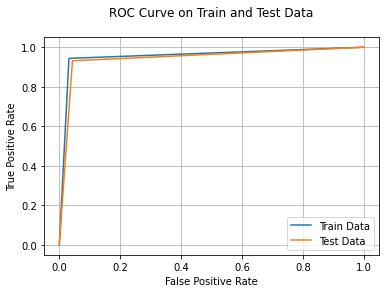

In [125]:
print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_dt, y_train_pred_smote_normalized_dt))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_dt, y_test_pred_smote_normalized_dt))

plt.plot(train_fpr_smote_normalized_dt, train_tpr_smote_normalized_dt, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_dt, test_tpr_smote_normalized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


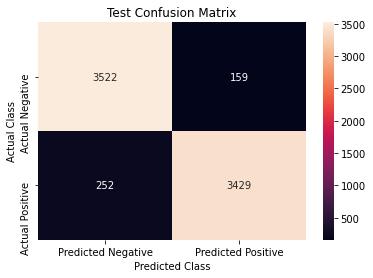

                 Predicted Negative  Predicted Positive
Actual Negative                3522                 159
Actual Positive                 252                3429


In [126]:
print("Test confusion matrix :")
cm_test_smote_normalized_dt = confusion_matrix(y_test_smote_normalized_dt, y_test_pred_smote_normalized_dt)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_dt_df = pd.DataFrame(cm_test_smote_normalized_dt, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_dt_df)

In [127]:
_, _, false_negative_smote_normalized_dt, true_positive_smote_normalized_dt = cm_test_smote_normalized_dt.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_dt/(false_negative_smote_normalized_dt+true_positive_smote_normalized_dt)) * 100, "%")

False Negative Rate =  6.845965770171149 %


In [128]:
print(classification_report(y_test_smote_normalized_dt, y_test_pred_smote_normalized_dt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3681
           1       0.96      0.93      0.94      3681

    accuracy                           0.94      7362
   macro avg       0.94      0.94      0.94      7362
weighted avg       0.94      0.94      0.94      7362



In [129]:
x_smote_normalized_dt.columns
dot_data_smote_normalized = tree.export_graphviz(dt_smote_normalized, 
                                out_file=None, 
                                feature_names=x_smote_normalized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_smote_normalized = graphviz.Source(dot_data_smote_normalized, format="png") 
# graph_smote_normalized
graph_smote_normalized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_smote_normalized')

'D:/BITS/Semester 4/dev/save/png\\decision_tree_smote_normalized.png'

In [130]:
feature_importance_smote_normalized_dt = pd.DataFrame({'Feature Importance': dt_smote_normalized.feature_importances_}, index=x_smote_normalized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_normalized_dt.head(20)

Feature Importance
satisfaction_level                0.411698
time_spend_company                0.191729
average_montly_hours              0.133257
last_evaluation_rating            0.110388
projects_worked_on                0.050187
Work_accident_True                0.049630
salary_high                       0.023410
salary_medium                     0.013909
Department_RandD                  0.002949
salary_low                        0.002941
Department_technical              0.002941
Work_accident_False               0.001880
Department_hr                     0.001421
Department_product_mng            0.001332
Department_IT                     0.001301
Department_management             0.000868
Department_accounting             0.000160

## 13.3 DT On NON-SMOTE Standardized Data

In [29]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [30]:
x_non_smote_standardized_dt = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_dt = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [131]:
# splitting into train & test set..
x_train_non_smote_standardized_dt, x_test_non_smote_standardized_dt, y_train_non_smote_standardized_dt, y_test_non_smote_standardized_dt = train_test_split(x_non_smote_standardized_dt, y_non_smote_standardized_dt, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_dt)

print("len(x_train_non_smote_standardized_dt) = ", len(x_train_non_smote_standardized_dt))
print("len(y_train_non_smote_standardized_dt) = ", len(y_train_non_smote_standardized_dt))

print("\nlen(x_test_non_smote_standardized_dt) = ", len(x_test_non_smote_standardized_dt))
print("len(y_test_non_smote_standardized_dt) = ", len(y_test_non_smote_standardized_dt))

len(x_train_non_smote_standardized_dt) =  19493
len(y_train_non_smote_standardized_dt) =  19493

len(x_test_non_smote_standardized_dt) =  4874
len(y_test_non_smote_standardized_dt) =  4874


In [132]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [133]:
dt_non_smote_standardized = DecisionTreeClassifier()
gcv_dt_non_smote_standardized = GridSearchCV(dt_non_smote_standardized, hyper_parameter_values_dt_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_dt_non_smote_standardized.fit(x_train_non_smote_standardized_dt, y_train_non_smote_standardized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100]},
             scoring='roc_auc')

In [134]:
gcv_dt_non_smote_standardized.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_leaf=10)

In [135]:
gcv_dt_non_smote_standardized.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 10}

In [136]:
gcv_dt_non_smote_standardized.best_score_

0.9826591344551077

In [137]:
dt_non_smote_standardized = DecisionTreeClassifier(criterion=gcv_dt_non_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_dt_non_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_dt_non_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_non_smote_standardized.best_params_['min_samples_leaf'],
                                                class_weight='balanced'
                                               )
dt_non_smote_standardized.fit(x_train_non_smote_standardized_dt, y_train_non_smote_standardized_dt)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, max_features='log2', min_samples_leaf=10)

In [138]:
y_train_pred_non_smote_standardized_dt = dt_non_smote_standardized.predict(x_train_non_smote_standardized_dt)
y_test_pred_non_smote_standardized_dt = dt_non_smote_standardized.predict(x_test_non_smote_standardized_dt)

In [139]:
train_fpr_non_smote_standardized_dt, train_tpr_non_smote_standardized_dt, _ = roc_curve(y_train_non_smote_standardized_dt, y_train_pred_non_smote_standardized_dt)
test_fpr_non_smote_standardized_dt, test_tpr_non_smote_standardized_dt, _ = roc_curve(y_test_non_smote_standardized_dt, y_test_pred_non_smote_standardized_dt)

In [140]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_dt, y_train_pred_non_smote_standardized_dt))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_dt, y_test_pred_non_smote_standardized_dt))


AUC_train =  0.9248528538314128
AUC_test =  0.9278284559960268


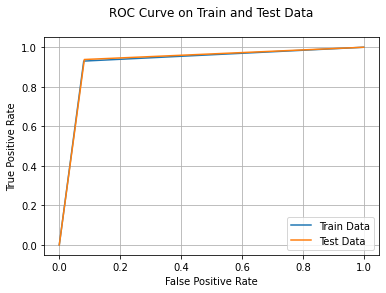

In [141]:
plt.plot(train_fpr_non_smote_standardized_dt, train_tpr_non_smote_standardized_dt, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_dt, test_tpr_non_smote_standardized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


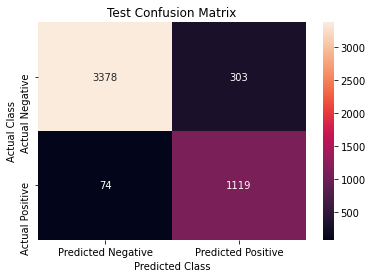

                 Predicted Negative  Predicted Positive
Actual Negative                3378                 303
Actual Positive                  74                1119


In [142]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_dt = confusion_matrix(y_test_non_smote_standardized_dt, y_test_pred_non_smote_standardized_dt)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_dt_df = pd.DataFrame(cm_test_non_smote_standardized_dt, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_dt_df)

In [143]:
_, _, false_negative_non_smote_standardized_dt, true_positive_non_smote_standardized_dt = cm_test_non_smote_standardized_dt.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_dt/(false_negative_non_smote_standardized_dt+true_positive_non_smote_standardized_dt)) * 100, "%")

False Negative Rate =  6.202849958088851 %


In [144]:
print(classification_report(y_test_non_smote_standardized_dt, y_test_pred_non_smote_standardized_dt))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3681
           1       0.79      0.94      0.86      1193

    accuracy                           0.92      4874
   macro avg       0.88      0.93      0.90      4874
weighted avg       0.93      0.92      0.92      4874



In [145]:
print(x_non_smote_standardized_dt.columns)

dot_data_non_smote_standardized = tree.export_graphviz(dt_non_smote_standardized, 
                                out_file=None, 
                                feature_names=x_non_smote_standardized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_non_smote_standardized = graphviz.Source(dot_data_non_smote_standardized, format="png") 
# graph_non_smote_standardized

graph_non_smote_standardized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_non_smote_standardized')

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident_False',
       'Work_accident_True', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_product_mng', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


'D:/BITS/Semester 4/dev/save/png\\decision_tree_non_smote_standardized.png'

In [146]:
feature_importance_non_smote_standardized_dt = pd.DataFrame({'Feature Importance': dt_non_smote_standardized.feature_importances_}, index=x_non_smote_standardized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_standardized_dt.head(20)

Feature Importance
satisfaction_level                0.569069
average_montly_hours              0.160767
time_spend_company                0.112052
projects_worked_on                0.059998
Work_accident_True                0.039373
last_evaluation_rating            0.032451
salary_high                       0.007544
salary_medium                     0.004936
salary_low                        0.004016
Department_technical              0.003240
Department_management             0.002102
Department_RandD                  0.001784
Department_hr                     0.001624
Department_accounting             0.000368
Department_IT                     0.000354
Department_product_mng            0.000322
Work_accident_False               0.000000

## 13.4 DT On NON-SMOTE Normalized Data

In [147]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [52]:
x_non_smote_normalized_dt = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_dt = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [148]:
# splitting into train & test set..
x_train_non_smote_normalized_dt, x_test_non_smote_normalized_dt, y_train_non_smote_normalized_dt, y_test_non_smote_normalized_dt = train_test_split(x_non_smote_normalized_dt, y_non_smote_normalized_dt, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_dt)

print("len(x_train_non_smote_normalized_dt) = ", len(x_train_non_smote_normalized_dt))
print("len(y_train_non_smote_normalized_dt) = ", len(y_train_non_smote_normalized_dt))

print("\nlen(x_test_non_smote_normalized_dt) = ", len(x_test_non_smote_normalized_dt))
print("len(y_test_non_smote_normalized_dt) = ", len(y_test_non_smote_normalized_dt))

len(x_train_non_smote_normalized_dt) =  19493
len(y_train_non_smote_normalized_dt) =  19493

len(x_test_non_smote_normalized_dt) =  4874
len(y_test_non_smote_normalized_dt) =  4874


In [149]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [150]:
dt_non_smote_normalized = DecisionTreeClassifier()
gcv_dt_non_smote_normalized = GridSearchCV(dt_non_smote_normalized, hyper_parameter_values_dt_dict, cv=5, scoring="roc_auc", n_jobs=12)
gcv_dt_non_smote_normalized.fit(x_train_non_smote_normalized_dt, y_train_non_smote_normalized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100]},
             scoring='roc_auc')

In [151]:
gcv_dt_non_smote_normalized.best_estimator_

DecisionTreeClassifier(max_depth=15, max_features='log2', min_samples_leaf=10)

In [152]:
gcv_dt_non_smote_normalized.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 10}

In [153]:
gcv_dt_non_smote_normalized.best_score_

0.981458285902122

In [154]:
dt_non_smote_normalized = DecisionTreeClassifier(criterion=gcv_dt_non_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_dt_non_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_dt_non_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_non_smote_normalized.best_params_['min_samples_leaf'],
                                                class_weight='balanced'
                                               )
dt_non_smote_normalized.fit(x_train_non_smote_normalized_dt, y_train_non_smote_normalized_dt)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       max_features='log2', min_samples_leaf=10)

In [155]:
y_train_pred_non_smote_normalized_dt = dt_non_smote_normalized.predict(x_train_non_smote_normalized_dt)
y_test_pred_non_smote_normalized_dt = dt_non_smote_normalized.predict(x_test_non_smote_normalized_dt)

In [156]:
train_fpr_non_smote_normalized_dt, train_tpr_non_smote_normalized_dt, _ = roc_curve(y_train_non_smote_normalized_dt, y_train_pred_non_smote_normalized_dt)
test_fpr_non_smote_normalized_dt, test_tpr_non_smote_normalized_dt, _ = roc_curve(y_test_non_smote_normalized_dt, y_test_pred_non_smote_normalized_dt)


AUC_train =  0.9491576234752307
AUC_test =  0.9429639482146261


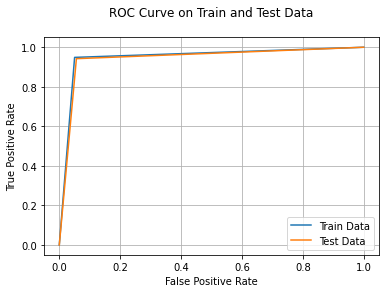

In [157]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_dt, y_train_pred_non_smote_normalized_dt))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_dt, y_test_pred_non_smote_normalized_dt))

plt.plot(train_fpr_non_smote_normalized_dt, train_tpr_non_smote_normalized_dt, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_dt, test_tpr_non_smote_normalized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


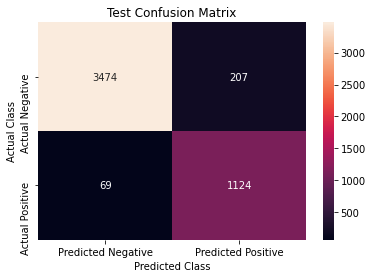

                 Predicted Negative  Predicted Positive
Actual Negative                3474                 207
Actual Positive                  69                1124


In [158]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_dt = confusion_matrix(y_test_non_smote_normalized_dt, y_test_pred_non_smote_normalized_dt)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_dt_df = pd.DataFrame(cm_test_non_smote_normalized_dt, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_dt_df)

In [159]:
_, _, false_negative_non_smote_normalized_dt, true_positive_non_smote_normalized_dt = cm_test_non_smote_normalized_dt.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_dt/(false_negative_non_smote_normalized_dt+true_positive_non_smote_normalized_dt)) * 100, "%")

False Negative Rate =  5.7837384744342 %


In [160]:
print(classification_report(y_test_non_smote_normalized_dt, y_test_pred_non_smote_normalized_dt))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3681
           1       0.84      0.94      0.89      1193

    accuracy                           0.94      4874
   macro avg       0.91      0.94      0.93      4874
weighted avg       0.95      0.94      0.94      4874



In [161]:
print(x_non_smote_normalized_dt.columns)

dot_data_non_smote_normalized = tree.export_graphviz(dt_non_smote_normalized, 
                                out_file=None, 
                                feature_names=x_non_smote_normalized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_non_smote_normalized = graphviz.Source(dot_data_non_smote_normalized, format="png") 
# graph_non_smote_normalized

graph_non_smote_normalized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_non_smote_normalized')

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident_False',
       'Work_accident_True', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_product_mng', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


'D:/BITS/Semester 4/dev/save/png\\decision_tree_non_smote_normalized.png'

In [162]:
feature_importance_non_smote_normalized_dt = pd.DataFrame({'Feature Importance': dt_non_smote_normalized.feature_importances_}, index=x_non_smote_normalized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_normalized_dt.head(20)

Feature Importance
satisfaction_level                0.420673
average_montly_hours              0.199563
last_evaluation_rating            0.141603
time_spend_company                0.098093
projects_worked_on                0.069674
Work_accident_True                0.045410
salary_high                       0.008929
salary_low                        0.005003
Department_technical              0.003469
salary_medium                     0.003462
Department_hr                     0.001485
Department_accounting             0.000792
Department_management             0.000727
Department_RandD                  0.000523
Department_IT                     0.000351
Department_product_mng            0.000241
Work_accident_False               0.000000

In [163]:
dill_dump_session('13.4_all_decision_trees_models_completed')

# 14 ML Algorithms 6 - Random Forests (RF)

In [4]:
dill_load_session('13.4_all_decision_trees_models_completed')

## 14.1 RF On SMOTE Standardized Data

In [5]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [6]:
x_smote_standardized_rf = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_rf = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [164]:
# splitting into train & test set..
x_train_smote_standardized_rf, x_test_smote_standardized_rf, y_train_smote_standardized_rf, y_test_smote_standardized_rf = train_test_split(x_smote_standardized_rf, y_smote_standardized_rf, test_size = 0.20, random_state=21, stratify=y_smote_standardized_rf)

print("len(x_train_smote_standardized_rf) = ", len(x_train_smote_standardized_rf))
print("len(y_train_smote_standardized_rf) = ", len(y_train_smote_standardized_rf))

print("\nlen(x_test_smote_standardized_rf) = ", len(x_test_smote_standardized_rf))
print("len(y_test_smote_standardized_rf) = ", len(y_test_smote_standardized_rf))

len(x_train_smote_standardized_rf) =  29444
len(y_train_smote_standardized_rf) =  29444

len(x_test_smote_standardized_rf) =  7362
len(y_test_smote_standardized_rf) =  7362


In [165]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 80)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2'],
#     'n_jobs' : 12,
#     'random_state' : 21
}
# class_weight='balanced'

In [166]:
rf_smote_standardized = RandomForestClassifier()
gcv_rf_smote_standardized = GridSearchCV(rf_smote_standardized, hyper_parameter_values_rf_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=5)
gcv_rf_smote_standardized.fit(x_train_smote_standardized_rf, y_train_smote_standardized_rf)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100],
                         'n_estimators': [75, 76, 77, 78, 79]},
             scoring='roc_auc', verbose=5)

In [167]:
gcv_rf_smote_standardized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_leaf=10, n_estimators=75)

In [168]:
gcv_rf_smote_standardized.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'n_estimators': 75}

In [169]:
gcv_rf_smote_standardized.best_score_

0.9930387823905491

In [20]:
# gcv_rf_smote_standardized.cv_results_['mean_train_score']

In [21]:
# gcv_rf_smote_standardized.cv_results_['mean_test_score']

In [170]:
rf_smote_standardized = RandomForestClassifier(n_estimators=gcv_rf_smote_standardized.best_params_['n_estimators'],
                                                criterion=gcv_rf_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_rf_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_rf_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_smote_standardized.best_params_['min_samples_leaf'],
                                                n_jobs=12
                                               )
rf_smote_standardized.fit(x_train_smote_standardized_rf, y_train_smote_standardized_rf)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_leaf=10, n_estimators=75, n_jobs=12)

In [171]:
y_train_pred_smote_standardized_rf = rf_smote_standardized.predict(x_train_smote_standardized_rf)
y_test_pred_smote_standardized_rf = rf_smote_standardized.predict(x_test_smote_standardized_rf)


AUC_train =  0.9613843227822307
AUC_test =  0.9588427057864711


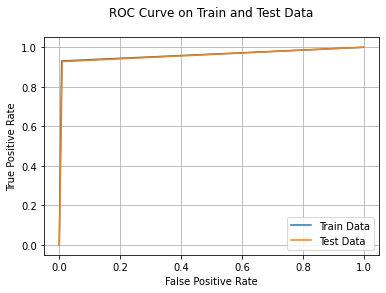

In [172]:
train_fpr_smote_standardized_rf, train_tpr_smote_standardized_rf, _ = roc_curve(y_train_smote_standardized_rf, y_train_pred_smote_standardized_rf)
test_fpr_smote_standardized_rf, test_tpr_smote_standardized_rf, _ = roc_curve(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_rf, y_train_pred_smote_standardized_rf))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf))

plt.plot(train_fpr_smote_standardized_rf, train_tpr_smote_standardized_rf, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_rf, test_tpr_smote_standardized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


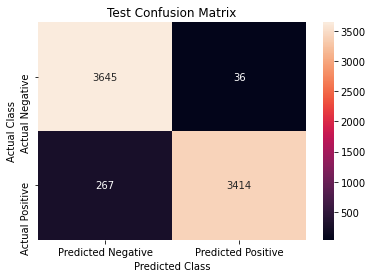

                 Predicted Negative  Predicted Positive
Actual Negative                3645                  36
Actual Positive                 267                3414


In [173]:
print("Test confusion matrix :")
cm_test_smote_standardized_rf = confusion_matrix(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_rf_df = pd.DataFrame(cm_test_smote_standardized_rf, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_rf_df)

In [174]:
_, _, false_negative_smote_standardized_rf, true_positive_smote_standardized_rf = cm_test_smote_standardized_rf.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_rf/(false_negative_smote_standardized_rf+true_positive_smote_standardized_rf)) * 100, "%")

False Negative Rate =  7.253463732681337 %


In [175]:
print(classification_report(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3681
           1       0.99      0.93      0.96      3681

    accuracy                           0.96      7362
   macro avg       0.96      0.96      0.96      7362
weighted avg       0.96      0.96      0.96      7362



In [176]:
feature_importance_smote_standardized_rf = pd.DataFrame({'Feature Importance': rf_smote_standardized.feature_importances_}, index=x_smote_standardized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_standardized_rf.head(20)

Feature Importance
satisfaction_level                0.328025
time_spend_company                0.243991
average_montly_hours              0.140106
last_evaluation_rating            0.125509
projects_worked_on                0.107184
Work_accident_True                0.018371
salary_high                       0.010295
salary_medium                     0.006018
salary_low                        0.005987
Work_accident_False               0.005453
Department_RandD                  0.002175
Department_technical              0.001964
Department_IT                     0.001517
Department_product_mng            0.001262
Department_management             0.000962
Department_accounting             0.000609
Department_hr                     0.000574

## 14.2 RF On SMOTE Normalized Data

In [30]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [31]:
x_smote_normalized_rf = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_rf = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [177]:
# splitting into train & test set..
x_train_smote_normalized_rf, x_test_smote_normalized_rf, y_train_smote_normalized_rf, y_test_smote_normalized_rf = train_test_split(x_smote_normalized_rf, y_smote_normalized_rf, test_size = 0.20, random_state=21, stratify=y_smote_normalized_rf)

print("len(x_train_smote_normalized_rf) = ", len(x_train_smote_normalized_rf))
print("len(y_train_smote_normalized_rf) = ", len(y_train_smote_normalized_rf))

print("\nlen(x_test_smote_normalized_rf) = ", len(x_test_smote_normalized_rf))
print("len(y_test_smote_normalized_rf) = ", len(y_test_smote_normalized_rf))

len(x_train_smote_normalized_rf) =  29444
len(y_train_smote_normalized_rf) =  29444

len(x_test_smote_normalized_rf) =  7362
len(y_test_smote_normalized_rf) =  7362


In [180]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 80)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2'],
}

In [181]:
# class_weight='balanced'

In [182]:
rf_smote_normalized = RandomForestClassifier()
gcv_rf_smote_normalized = GridSearchCV(rf_smote_normalized, hyper_parameter_values_rf_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=4)
gcv_rf_smote_normalized.fit(x_train_smote_normalized_rf, y_train_smote_normalized_rf)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100],
                         'n_estimators': [75, 76, 77, 78, 79]},
             scoring='roc_auc', verbose=4)

In [184]:
gcv_rf_smote_normalized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       n_estimators=76)

In [185]:
gcv_rf_smote_normalized.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 76}

In [186]:
gcv_rf_smote_normalized.best_score_

0.9931261233834165

In [187]:
rf_smote_normalized = RandomForestClassifier(n_estimators=gcv_rf_smote_normalized.best_params_['n_estimators'],
                                                criterion=gcv_rf_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_rf_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_rf_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_smote_normalized.best_params_['min_samples_leaf'],
                                                n_jobs=12
                                               )
rf_smote_normalized.fit(x_train_smote_normalized_rf, y_train_smote_normalized_rf)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       n_estimators=76, n_jobs=12)

In [188]:
y_train_pred_smote_normalized_rf = rf_smote_normalized.predict(x_train_smote_normalized_rf)
y_test_pred_smote_normalized_rf = rf_smote_normalized.predict(x_test_smote_normalized_rf)

In [189]:
train_fpr_smote_normalized_rf, train_tpr_smote_normalized_rf, _ = roc_curve(y_train_smote_normalized_rf, y_train_pred_smote_normalized_rf)
test_fpr_smote_normalized_rf, test_tpr_smote_normalized_rf, _ = roc_curve(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf)


AUC_train =  0.9624032060861296
AUC_test =  0.958842705786471


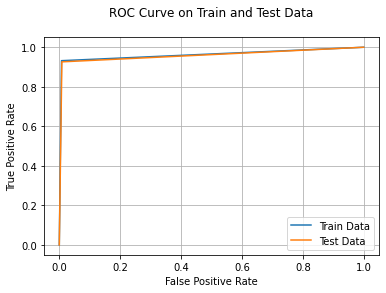

In [190]:
print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_rf, y_train_pred_smote_normalized_rf))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf))

plt.plot(train_fpr_smote_normalized_rf, train_tpr_smote_normalized_rf, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_rf, test_tpr_smote_normalized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


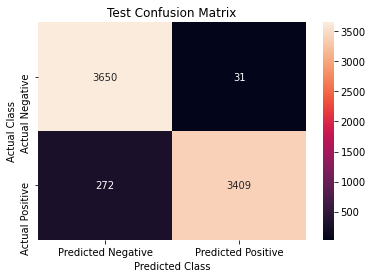

                 Predicted Negative  Predicted Positive
Actual Negative                3650                  31
Actual Positive                 272                3409


In [191]:
print("Test confusion matrix :")
cm_test_smote_normalized_rf = confusion_matrix(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_rf_df = pd.DataFrame(cm_test_smote_normalized_rf, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_rf_df)

In [192]:
_, _, false_negative_smote_normalized_rf, true_positive_smote_normalized_rf = cm_test_smote_normalized_rf.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_rf/(false_negative_smote_normalized_rf+true_positive_smote_normalized_rf)) * 100, "%")

False Negative Rate =  7.389296386851399 %


In [193]:
print(classification_report(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3681
           1       0.99      0.93      0.96      3681

    accuracy                           0.96      7362
   macro avg       0.96      0.96      0.96      7362
weighted avg       0.96      0.96      0.96      7362



In [194]:
feature_importance_smote_normalized_rf = pd.DataFrame({'Feature Importance': rf_smote_normalized.feature_importances_}, index=x_smote_normalized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_normalized_rf.head(20)

Feature Importance
satisfaction_level                0.337785
time_spend_company                0.251422
last_evaluation_rating            0.132752
average_montly_hours              0.130657
projects_worked_on                0.091768
Work_accident_True                0.018295
salary_high                       0.010151
Work_accident_False               0.007720
salary_low                        0.005565
salary_medium                     0.005492
Department_RandD                  0.001989
Department_technical              0.001816
Department_product_mng            0.001392
Department_IT                     0.001353
Department_management             0.000804
Department_accounting             0.000577
Department_hr                     0.000462

## 14.3 RF On NON-SMOTE Standardized Data

In [195]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [49]:
x_non_smote_standardized_rf = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_rf = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [196]:
# splitting into train & test set..
x_train_non_smote_standardized_rf, x_test_non_smote_standardized_rf, y_train_non_smote_standardized_rf, y_test_non_smote_standardized_rf = train_test_split(x_non_smote_standardized_rf, y_non_smote_standardized_rf, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_rf)

print("len(x_train_non_smote_standardized_rf) = ", len(x_train_non_smote_standardized_rf))
print("len(y_train_non_smote_standardized_rf) = ", len(y_train_non_smote_standardized_rf))

print("\nlen(x_test_non_smote_standardized_rf) = ", len(x_test_non_smote_standardized_rf))
print("len(y_test_non_smote_standardized_rf) = ", len(y_test_non_smote_standardized_rf))

len(x_train_non_smote_standardized_rf) =  19493
len(y_train_non_smote_standardized_rf) =  19493

len(x_test_non_smote_standardized_rf) =  4874
len(y_test_non_smote_standardized_rf) =  4874


In [197]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 80)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2'],
#     'n_jobs' : 12,
#     'random_state' : 21
}

In [198]:
# class_weight='balanced'

In [199]:
rf_non_smote_standardized = RandomForestClassifier()
gcv_rf_non_smote_standardized = GridSearchCV(rf_non_smote_standardized, hyper_parameter_values_rf_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=4)
gcv_rf_non_smote_standardized.fit(x_train_non_smote_standardized_rf, y_train_non_smote_standardized_rf)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100],
                         'n_estimators': [75, 76, 77, 78, 79]},
             scoring='roc_auc', verbose=4)

In [200]:
gcv_rf_non_smote_standardized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=10, n_estimators=78)

In [201]:
gcv_rf_non_smote_standardized.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 78}

In [202]:
gcv_rf_non_smote_standardized.best_score_

0.989073665547792

In [203]:
rf_non_smote_standardized = RandomForestClassifier(n_estimators=gcv_rf_non_smote_standardized.best_params_['n_estimators'],
                                                criterion=gcv_rf_non_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_rf_non_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_rf_non_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_non_smote_standardized.best_params_['min_samples_leaf'],
                                                n_jobs=12, class_weight='balanced'
                                               )
rf_non_smote_standardized.fit(x_train_non_smote_standardized_rf, y_train_non_smote_standardized_rf)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=78, n_jobs=12)

In [204]:
y_train_pred_non_smote_standardized_rf = rf_non_smote_standardized.predict(x_train_non_smote_standardized_rf)
y_test_pred_non_smote_standardized_rf = rf_non_smote_standardized.predict(x_test_non_smote_standardized_rf)

In [205]:
train_fpr_non_smote_standardized_rf, train_tpr_non_smote_standardized_rf, _ = roc_curve(y_train_non_smote_standardized_rf, y_train_pred_non_smote_standardized_rf)
test_fpr_non_smote_standardized_rf, test_tpr_non_smote_standardized_rf, _ = roc_curve(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf)


AUC_train =  0.9615074245007684
AUC_test =  0.9611619942738509


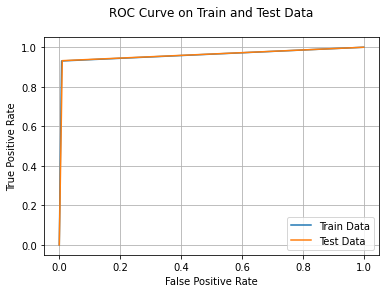

In [206]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_rf, y_train_pred_non_smote_standardized_rf))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf))

plt.plot(train_fpr_non_smote_standardized_rf, train_tpr_non_smote_standardized_rf, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_rf, test_tpr_non_smote_standardized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


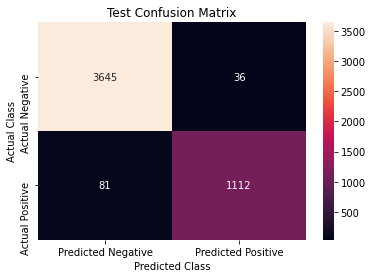

                 Predicted Negative  Predicted Positive
Actual Negative                3645                  36
Actual Positive                  81                1112


In [207]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_rf = confusion_matrix(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_rf_df = pd.DataFrame(cm_test_non_smote_standardized_rf, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_rf_df)

In [208]:
_, _, false_negative_non_smote_standardized_rf, true_positive_non_smote_standardized_rf = cm_test_non_smote_standardized_rf.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_rf/(false_negative_non_smote_standardized_rf+true_positive_non_smote_standardized_rf)) * 100, "%")

False Negative Rate =  6.789606035205365 %


In [209]:
print(classification_report(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3681
           1       0.97      0.93      0.95      1193

    accuracy                           0.98      4874
   macro avg       0.97      0.96      0.97      4874
weighted avg       0.98      0.98      0.98      4874



In [210]:
feature_importance_non_smote_standardized_rf = pd.DataFrame({'Feature Importance': rf_non_smote_standardized.feature_importances_}, index=x_non_smote_standardized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_standardized_rf.head(20)

Feature Importance
satisfaction_level                0.310157
time_spend_company                0.252380
average_montly_hours              0.146533
last_evaluation_rating            0.137279
projects_worked_on                0.112833
Work_accident_True                0.009319
salary_high                       0.007310
Work_accident_False               0.007077
salary_low                        0.005361
salary_medium                     0.003226
Department_technical              0.003134
Department_hr                     0.001193
Department_IT                     0.001144
Department_RandD                  0.000989
Department_accounting             0.000861
Department_product_mng            0.000737
Department_management             0.000466

## 14.4 RF On NON-SMOTE Normalized Data

In [65]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [66]:
x_non_smote_normalized_rf = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_rf = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [211]:
# splitting into train & test set..
x_train_non_smote_normalized_rf, x_test_non_smote_normalized_rf, y_train_non_smote_normalized_rf, y_test_non_smote_normalized_rf = train_test_split(x_non_smote_normalized_rf, y_non_smote_normalized_rf, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_rf)

print("len(x_train_non_smote_normalized_rf) = ", len(x_train_non_smote_normalized_rf))
print("len(y_train_non_smote_normalized_rf) = ", len(y_train_non_smote_normalized_rf))

print("\nlen(x_test_non_smote_normalized_rf) = ", len(x_test_non_smote_normalized_rf))
print("len(y_test_non_smote_normalized_rf) = ", len(y_test_non_smote_normalized_rf))

len(x_train_non_smote_normalized_rf) =  19493
len(y_train_non_smote_normalized_rf) =  19493

len(x_test_non_smote_normalized_rf) =  4874
len(y_test_non_smote_normalized_rf) =  4874


In [212]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 80)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2'],
#     'n_jobs' : 12,
#     'random_state' : 21
}

In [213]:
rf_non_smote_normalized = RandomForestClassifier()
gcv_rf_non_smote_normalized = GridSearchCV(rf_non_smote_normalized, hyper_parameter_values_rf_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=4)
gcv_rf_non_smote_normalized.fit(x_train_non_smote_normalized_rf, y_train_non_smote_normalized_rf)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100],
                         'n_estimators': [75, 76, 77, 78, 79]},
             scoring='roc_auc', verbose=4)

In [214]:
gcv_rf_non_smote_normalized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_leaf=10, n_estimators=75)

In [215]:
gcv_rf_non_smote_normalized.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'n_estimators': 75}

In [216]:
gcv_rf_non_smote_normalized.best_score_

0.9891595427992302

In [217]:
rf_non_smote_normalized = RandomForestClassifier(n_estimators=gcv_rf_non_smote_normalized.best_params_['n_estimators'],
                                                criterion=gcv_rf_non_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_rf_non_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_rf_non_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_non_smote_normalized.best_params_['min_samples_leaf'],
                                                n_jobs=12, class_weight='balanced'
                                               )
rf_non_smote_normalized.fit(x_train_non_smote_normalized_rf, y_train_non_smote_normalized_rf)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, max_features='log2', min_samples_leaf=10,
                       n_estimators=75, n_jobs=12)

In [218]:
y_train_pred_non_smote_normalized_rf = rf_non_smote_normalized.predict(x_train_non_smote_normalized_rf)
y_test_pred_non_smote_normalized_rf = rf_non_smote_normalized.predict(x_test_non_smote_normalized_rf)

In [219]:
train_fpr_non_smote_normalized_rf, train_tpr_non_smote_normalized_rf, _ = roc_curve(y_train_non_smote_normalized_rf, y_train_pred_non_smote_normalized_rf)
test_fpr_non_smote_normalized_rf, test_tpr_non_smote_normalized_rf, _ = roc_curve(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf)


AUC_train =  0.9631725758101713
AUC_test =  0.9629626593414952


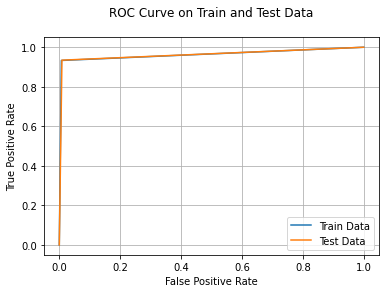

In [220]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_rf, y_train_pred_non_smote_normalized_rf))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf))

plt.plot(train_fpr_non_smote_normalized_rf, train_tpr_non_smote_normalized_rf, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_rf, test_tpr_non_smote_normalized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


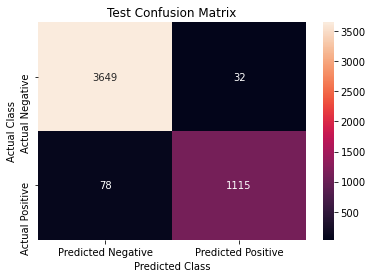

                 Predicted Negative  Predicted Positive
Actual Negative                3649                  32
Actual Positive                  78                1115


In [221]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_rf = confusion_matrix(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_rf_df = pd.DataFrame(cm_test_non_smote_normalized_rf, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_rf_df)

In [222]:
_, _, false_negative_non_smote_normalized_rf, true_positive_non_smote_normalized_rf = cm_test_non_smote_normalized_rf.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_rf/(false_negative_non_smote_normalized_rf+true_positive_non_smote_normalized_rf)) * 100, "%")

False Negative Rate =  6.538139145012574 %


In [223]:
print(classification_report(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3681
           1       0.97      0.93      0.95      1193

    accuracy                           0.98      4874
   macro avg       0.98      0.96      0.97      4874
weighted avg       0.98      0.98      0.98      4874



In [224]:
feature_importance_non_smote_normalized_rf = pd.DataFrame({'Feature Importance': rf_non_smote_normalized.feature_importances_}, index=x_non_smote_normalized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_normalized_rf.head(20)

Feature Importance
satisfaction_level                0.336996
time_spend_company                0.254130
average_montly_hours              0.129620
last_evaluation_rating            0.126518
projects_worked_on                0.111319
Work_accident_True                0.010318
Work_accident_False               0.007832
salary_high                       0.006537
salary_low                        0.005014
salary_medium                     0.003245
Department_technical              0.002984
Department_hr                     0.001284
Department_IT                     0.001035
Department_product_mng            0.001003
Department_RandD                  0.000881
Department_accounting             0.000816
Department_management             0.000467

#                                   --------------------------END OF MID-SEM--------------------------

In [129]:
# dill_dump_session('15_all_machine_learning_models_completed')

In [259]:
dill_dump_session('15_all_machine_learning_models_retrained')

In [4]:
# dill_load_session('15_all_machine_learning_models_completed')

In [6]:
dill_load_session('15_all_machine_learning_models_retrained')

#                                   --------------------------Start OF Final-Sem--------------------------

# 15 ML Algorithms 7 - XGBoost (XGB)

## 15.1 XGB On SMOTE Standardized Data

In [7]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [8]:
x_smote_standardized_xgb = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_xgb = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [9]:
# splitting into train & test set..
x_train_smote_standardized_xgb, x_test_smote_standardized_xgb, y_train_smote_standardized_xgb, y_test_smote_standardized_xgb = train_test_split(x_smote_standardized_xgb, y_smote_standardized_xgb, test_size = 0.20, random_state=21, stratify=y_smote_standardized_xgb)

print("len(x_train_smote_standardized_xgb) = ", len(x_train_smote_standardized_xgb))
print("len(y_train_smote_standardized_xgb) = ", len(y_train_smote_standardized_xgb))

print("\nlen(x_test_smote_standardized_xgb) = ", len(x_test_smote_standardized_xgb))
print("len(y_test_smote_standardized_xgb) = ", len(y_test_smote_standardized_xgb))

len(x_train_smote_standardized_xgb) =  29444
len(y_train_smote_standardized_xgb) =  29444

len(x_test_smote_standardized_xgb) =  7362
len(y_test_smote_standardized_xgb) =  7362


In [17]:
hyper_parameter_values_xgb_dict = {
    'eta': [0.1, 0.2, 0.3],
    'gamma': [0.5, 1, 1.5, 2, 2.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.4, 0.6, 0.8],
    'verbosity': [3]
}
# scale_pos_weight [default=1] - 
# Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).

In [18]:
xgb_smote_standardized = XGBClassifier()
gcv_xgb_smote_standardized = GridSearchCV(xgb_smote_standardized, hyper_parameter_values_xgb_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=5)
gcv_xgb_smote_standardized.fit(x_train_smote_standardized_xgb, y_train_smote_standardized_xgb)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[15:01:38] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:01:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 310 extra nodes, 6 pruned nodes, max_depth=11
[15:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 302 extra nodes, 10 pruned nodes, max_depth=11
[15:01:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 314 extra nodes, 16 pruned nod

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [19]:
gcv_xgb_smote_standardized.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=3)

In [20]:
gcv_xgb_smote_standardized.best_params_

{'eta': 0.2, 'gamma': 0.5, 'max_depth': 11, 'subsample': 0.8, 'verbosity': 3}

In [21]:
gcv_xgb_smote_standardized.best_score_

0.9983116039422614

In [22]:
xgb_smote_standardized = XGBClassifier(eta=gcv_xgb_smote_standardized.best_params_['eta'],
                                       gamma=gcv_xgb_smote_standardized.best_params_['gamma'], 
                                       max_depth=gcv_xgb_smote_standardized.best_params_['max_depth'],
                                       subsample=gcv_xgb_smote_standardized.best_params_['subsample'],
                                       verbosity=gcv_xgb_smote_standardized.best_params_['verbosity'],
                                       n_jobs=12
                                       )
xgb_smote_standardized.fit(x_train_smote_standardized_xgb, y_train_smote_standardized_xgb)

[15:01:42] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:01:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 310 extra nodes, 6 pruned nodes, max_depth=11
[15:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 302 extra nodes, 10 pruned nodes, max_depth=11
[15:01:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 314 extra nodes, 16 pruned nodes, max_depth=11
[15:01:43] INFO: C:/Users/Administrator/worksp

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=3)

In [23]:
y_train_pred_smote_standardized_xgb = xgb_smote_standardized.predict(x_train_smote_standardized_xgb)
y_test_pred_smote_standardized_xgb = xgb_smote_standardized.predict(x_test_smote_standardized_xgb)


AUC_train =  0.9989471539193044
AUC_test =  0.989133387666395


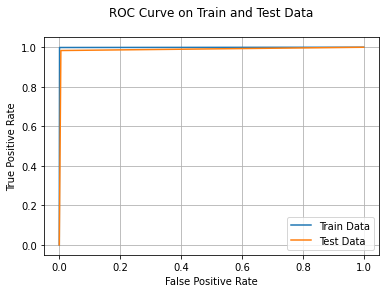

In [24]:
train_fpr_smote_standardized_xgb, train_tpr_smote_standardized_xgb, _ = roc_curve(y_train_smote_standardized_xgb, y_train_pred_smote_standardized_xgb)
test_fpr_smote_standardized_xgb, test_tpr_smote_standardized_xgb, _ = roc_curve(y_test_smote_standardized_xgb, y_test_pred_smote_standardized_xgb)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_xgb, y_train_pred_smote_standardized_xgb))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_xgb, y_test_pred_smote_standardized_xgb))

plt.plot(train_fpr_smote_standardized_xgb, train_tpr_smote_standardized_xgb, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_xgb, test_tpr_smote_standardized_xgb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


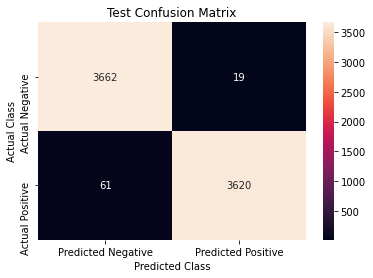

                 Predicted Negative  Predicted Positive
Actual Negative                3662                  19
Actual Positive                  61                3620


In [25]:
print("Test confusion matrix :")
cm_test_smote_standardized_xgb = confusion_matrix(y_test_smote_standardized_xgb, y_test_pred_smote_standardized_xgb)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_xgb_df = pd.DataFrame(cm_test_smote_standardized_xgb, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_xgb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_xgb_df)

In [26]:
_, _, false_negative_smote_standardized_xgb, true_positive_smote_standardized_xgb = cm_test_smote_standardized_xgb.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_xgb/(false_negative_smote_standardized_xgb+true_positive_smote_standardized_xgb)) * 100, "%")

False Negative Rate =  1.657158380874762 %


In [27]:
print(classification_report(y_test_smote_standardized_xgb, y_test_pred_smote_standardized_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3681
           1       0.99      0.98      0.99      3681

    accuracy                           0.99      7362
   macro avg       0.99      0.99      0.99      7362
weighted avg       0.99      0.99      0.99      7362



In [28]:
feature_importance_smote_standardized_xgb = pd.DataFrame({'Feature Importance': rf_smote_standardized.feature_importances_}, index=x_smote_standardized_xgb.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_standardized_xgb.head(20)

Feature Importance
satisfaction_level                0.328025
time_spend_company                0.243991
average_montly_hours              0.140106
last_evaluation_rating            0.125509
projects_worked_on                0.107184
Work_accident_True                0.018371
salary_high                       0.010295
salary_medium                     0.006018
salary_low                        0.005987
Work_accident_False               0.005453
Department_RandD                  0.002175
Department_technical              0.001964
Department_IT                     0.001517
Department_product_mng            0.001262
Department_management             0.000962
Department_accounting             0.000609
Department_hr                     0.000574

## 15.2 XGB On SMOTE Normalized Data

In [29]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [30]:
x_smote_normalized_xgb = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_xgb = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [31]:
# splitting into train & test set..
x_train_smote_normalized_xgb, x_test_smote_normalized_xgb, y_train_smote_normalized_xgb, y_test_smote_normalized_xgb = train_test_split(x_smote_normalized_xgb, y_smote_normalized_xgb, test_size = 0.20, random_state=21, stratify=y_smote_normalized_xgb)

print("len(x_train_smote_normalized_xgb) = ", len(x_train_smote_normalized_xgb))
print("len(y_train_smote_normalized_xgb) = ", len(y_train_smote_normalized_xgb))

print("\nlen(x_test_smote_normalized_xgb) = ", len(x_test_smote_normalized_xgb))
print("len(y_test_smote_normalized_xgb) = ", len(y_test_smote_normalized_xgb))

len(x_train_smote_normalized_xgb) =  29444
len(y_train_smote_normalized_xgb) =  29444

len(x_test_smote_normalized_xgb) =  7362
len(y_test_smote_normalized_xgb) =  7362


In [32]:
hyper_parameter_values_xgb_dict = {
    'eta': [0.1, 0.2, 0.3],
    'gamma': [0.5, 1, 1.5, 2, 2.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.4, 0.6, 0.8],
    'verbosity': [3]
}

In [33]:
xgb_smote_normalized = XGBClassifier()
gcv_xgb_smote_normalized = GridSearchCV(xgb_smote_normalized, hyper_parameter_values_xgb_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=5)
gcv_xgb_smote_normalized.fit(x_train_smote_normalized_xgb, y_train_smote_normalized_xgb)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[15:12:37] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:12:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 230 extra nodes, 6 pruned nodes, max_depth=9
[15:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 222 extra nodes, 14 pruned nodes, max_depth=9
[15:12:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 234 extra nodes, 16 pruned nodes

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [34]:
gcv_xgb_smote_normalized.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=3)

In [35]:
gcv_xgb_smote_normalized.best_params_

{'eta': 0.3, 'gamma': 0.5, 'max_depth': 9, 'subsample': 0.8, 'verbosity': 3}

In [36]:
gcv_xgb_smote_normalized.best_score_

0.9983095653227125

In [37]:
xgb_smote_normalized = XGBClassifier(eta=gcv_xgb_smote_normalized.best_params_['eta'],
                                     gamma=gcv_xgb_smote_normalized.best_params_['gamma'], 
                                     max_depth=gcv_xgb_smote_normalized.best_params_['max_depth'],
                                     subsample=gcv_xgb_smote_normalized.best_params_['subsample'],
                                     verbosity=gcv_xgb_smote_normalized.best_params_['verbosity'],
                                     n_jobs=12
                                     )
xgb_smote_normalized.fit(x_train_smote_normalized_xgb, y_train_smote_normalized_xgb)

[15:12:41] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:12:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 230 extra nodes, 6 pruned nodes, max_depth=9
[15:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 222 extra nodes, 14 pruned nodes, max_depth=9
[15:12:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 234 extra nodes, 16 pruned nodes, max_depth=9
[15:12:41] INFO: C:/Users/Administrator/workspace

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=3)

In [38]:
y_train_pred_smote_normalized_xgb = xgb_smote_normalized.predict(x_train_smote_normalized_xgb)
y_test_pred_smote_normalized_xgb = xgb_smote_normalized.predict(x_test_smote_normalized_xgb)

In [39]:
train_fpr_smote_normalized_xgb, train_tpr_smote_normalized_xgb, _ = roc_curve(y_train_smote_normalized_xgb, y_train_pred_smote_normalized_xgb)
test_fpr_smote_normalized_xgb, test_tpr_smote_normalized_xgb, _ = roc_curve(y_test_smote_normalized_xgb, y_test_pred_smote_normalized_xgb)


AUC_train =  0.9992867816872708
AUC_test =  0.988861722358055


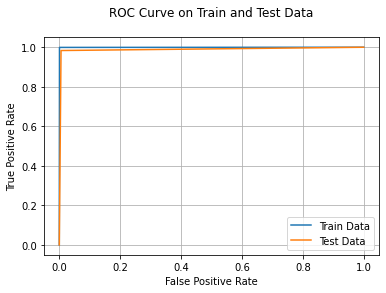

In [40]:
print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_xgb, y_train_pred_smote_normalized_xgb))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_xgb, y_test_pred_smote_normalized_xgb))

plt.plot(train_fpr_smote_normalized_xgb, train_tpr_smote_normalized_xgb, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_xgb, test_tpr_smote_normalized_xgb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


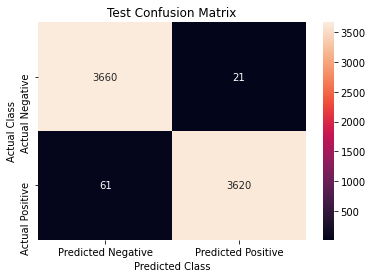

                 Predicted Negative  Predicted Positive
Actual Negative                3660                  21
Actual Positive                  61                3620


In [41]:
print("Test confusion matrix :")
cm_test_smote_normalized_xgb = confusion_matrix(y_test_smote_normalized_xgb, y_test_pred_smote_normalized_xgb)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_xgb_df = pd.DataFrame(cm_test_smote_normalized_xgb, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_xgb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_xgb_df)

In [42]:
_, _, false_negative_smote_normalized_xgb, true_positive_smote_normalized_xgb = cm_test_smote_normalized_xgb.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_xgb/(false_negative_smote_normalized_xgb+true_positive_smote_normalized_xgb)) * 100, "%")

False Negative Rate =  1.657158380874762 %


In [43]:
print(classification_report(y_test_smote_normalized_xgb, y_test_pred_smote_normalized_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3681
           1       0.99      0.98      0.99      3681

    accuracy                           0.99      7362
   macro avg       0.99      0.99      0.99      7362
weighted avg       0.99      0.99      0.99      7362



In [44]:
feature_importance_smote_normalized_xgb = pd.DataFrame({'Feature Importance': rf_smote_normalized.feature_importances_}, index=x_smote_normalized_xgb.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_normalized_xgb.head(20)

Feature Importance
satisfaction_level                0.337785
time_spend_company                0.251422
last_evaluation_rating            0.132752
average_montly_hours              0.130657
projects_worked_on                0.091768
Work_accident_True                0.018295
salary_high                       0.010151
Work_accident_False               0.007720
salary_low                        0.005565
salary_medium                     0.005492
Department_RandD                  0.001989
Department_technical              0.001816
Department_product_mng            0.001392
Department_IT                     0.001353
Department_management             0.000804
Department_accounting             0.000577
Department_hr                     0.000462

## 15.3 XGB On NON-SMOTE Standardized Data

In [45]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [46]:
x_non_smote_standardized_xgb = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_xgb = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [47]:
# splitting into train & test set..
x_train_non_smote_standardized_xgb, x_test_non_smote_standardized_xgb, y_train_non_smote_standardized_xgb, y_test_non_smote_standardized_xgb = train_test_split(x_non_smote_standardized_xgb, y_non_smote_standardized_xgb, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_xgb)

print("len(x_train_non_smote_standardized_xgb) = ", len(x_train_non_smote_standardized_xgb))
print("len(y_train_non_smote_standardized_xgb) = ", len(y_train_non_smote_standardized_xgb))

print("\nlen(x_test_non_smote_standardized_xgb) = ", len(x_test_non_smote_standardized_xgb))
print("len(y_test_non_smote_standardized_xgb) = ", len(y_test_non_smote_standardized_xgb))

len(x_train_non_smote_standardized_xgb) =  19493
len(y_train_non_smote_standardized_xgb) =  19493

len(x_test_non_smote_standardized_xgb) =  4874
len(y_test_non_smote_standardized_xgb) =  4874


In [54]:
y_train_non_smote_standardized_xgb.value_counts()

Attrition
0            14722
1             4771
dtype: int64

In [56]:
print(y_train_non_smote_standardized_xgb.value_counts()[0])
print(y_train_non_smote_standardized_xgb.value_counts()[1])

14722
4771


In [60]:
scale_pos_weight = y_train_non_smote_standardized_xgb.value_counts()[0]/y_train_non_smote_standardized_xgb.value_counts()[1]

In [61]:
hyper_parameter_values_xgb_dict = {
    'eta': [0.1, 0.2, 0.3],
    'gamma': [0.5, 1, 1.5, 2, 2.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.4, 0.6, 0.8],
    'scale_pos_weight': [scale_pos_weight],
    'verbosity': [3]
}
# scale_pos_weight [default=1] - 
# Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).

In [62]:
xgb_non_smote_standardized = XGBClassifier()
gcv_xgb_non_smote_standardized = GridSearchCV(xgb_non_smote_standardized, hyper_parameter_values_xgb_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=5)
gcv_xgb_non_smote_standardized.fit(x_train_non_smote_standardized_xgb, y_train_non_smote_standardized_xgb)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[15:33:42] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:33:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 296 extra nodes, 42 pruned nodes, max_depth=11
[15:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 292 extra nodes, 46 pruned nodes, max_depth=11
[15:33:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 294 extra nodes, 66 pruned no

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [63]:
gcv_xgb_non_smote_standardized.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=2.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0857262628379796,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=3)

In [64]:
gcv_xgb_non_smote_standardized.best_params_

{'eta': 0.2,
 'gamma': 2.5,
 'max_depth': 11,
 'scale_pos_weight': 3.0857262628379796,
 'subsample': 0.8,
 'verbosity': 3}

In [65]:
gcv_xgb_non_smote_standardized.best_score_

0.9945186006148496

In [66]:
xgb_non_smote_standardized = XGBClassifier(eta=gcv_xgb_non_smote_standardized.best_params_['eta'],
                                       gamma=gcv_xgb_non_smote_standardized.best_params_['gamma'], 
                                       max_depth=gcv_xgb_non_smote_standardized.best_params_['max_depth'],
                                       subsample=gcv_xgb_non_smote_standardized.best_params_['subsample'],
                                       scale_pos_weight=gcv_xgb_non_smote_standardized.best_params_['scale_pos_weight'],
                                       verbosity=gcv_xgb_non_smote_standardized.best_params_['verbosity'],
                                       n_jobs=12
                                       )
xgb_non_smote_standardized.fit(x_train_non_smote_standardized_xgb, y_train_non_smote_standardized_xgb)

[15:33:44] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:33:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 296 extra nodes, 42 pruned nodes, max_depth=11
[15:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 292 extra nodes, 46 pruned nodes, max_depth=11
[15:33:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 294 extra nodes, 66 pruned nodes, max_depth=11
[15:33:44] INFO: C:/Users/Administrator/works

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=2.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0857262628379796,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=3)

In [67]:
y_train_pred_non_smote_standardized_xgb = xgb_non_smote_standardized.predict(x_train_non_smote_standardized_xgb)
y_test_pred_non_smote_standardized_xgb = xgb_non_smote_standardized.predict(x_test_non_smote_standardized_xgb)

In [68]:
train_fpr_non_smote_standardized_xgb, train_tpr_non_smote_standardized_xgb, _ = roc_curve(y_train_non_smote_standardized_xgb, y_train_pred_non_smote_standardized_xgb)
test_fpr_non_smote_standardized_xgb, test_tpr_non_smote_standardized_xgb, _ = roc_curve(y_test_non_smote_standardized_xgb, y_test_pred_non_smote_standardized_xgb)


AUC_train =  0.9984658520402908
AUC_test =  0.985695671549583


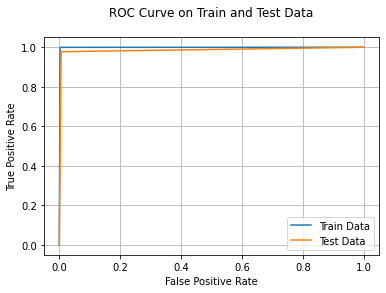

In [69]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_xgb, y_train_pred_non_smote_standardized_xgb))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_xgb, y_test_pred_non_smote_standardized_xgb))

plt.plot(train_fpr_non_smote_standardized_xgb, train_tpr_non_smote_standardized_xgb, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_xgb, test_tpr_non_smote_standardized_xgb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


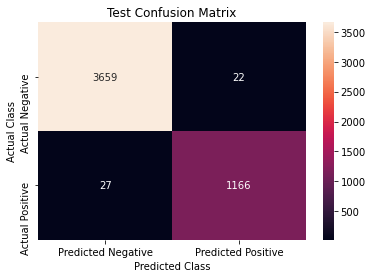

                 Predicted Negative  Predicted Positive
Actual Negative                3659                  22
Actual Positive                  27                1166


In [70]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_xgb = confusion_matrix(y_test_non_smote_standardized_xgb, y_test_pred_non_smote_standardized_xgb)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_xgb_df = pd.DataFrame(cm_test_non_smote_standardized_xgb, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_xgb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_xgb_df)

In [71]:
_, _, false_negative_non_smote_standardized_xgb, true_positive_non_smote_standardized_xgb = cm_test_non_smote_standardized_xgb.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_xgb/(false_negative_non_smote_standardized_xgb+true_positive_non_smote_standardized_xgb)) * 100, "%")

False Negative Rate =  2.2632020117351215 %


In [72]:
print(classification_report(y_test_non_smote_standardized_xgb, y_test_pred_non_smote_standardized_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3681
           1       0.98      0.98      0.98      1193

    accuracy                           0.99      4874
   macro avg       0.99      0.99      0.99      4874
weighted avg       0.99      0.99      0.99      4874



In [73]:
feature_importance_non_smote_standardized_xgb = pd.DataFrame({'Feature Importance': rf_non_smote_standardized.feature_importances_}, index=x_non_smote_standardized_xgb.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_standardized_xgb.head(20)

Feature Importance
satisfaction_level                0.310157
time_spend_company                0.252380
average_montly_hours              0.146533
last_evaluation_rating            0.137279
projects_worked_on                0.112833
Work_accident_True                0.009319
salary_high                       0.007310
Work_accident_False               0.007077
salary_low                        0.005361
salary_medium                     0.003226
Department_technical              0.003134
Department_hr                     0.001193
Department_IT                     0.001144
Department_RandD                  0.000989
Department_accounting             0.000861
Department_product_mng            0.000737
Department_management             0.000466

## 15.4 XGB On NON-SMOTE Normalized Data

In [74]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [75]:
x_non_smote_normalized_xgb = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_xgb = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [76]:
# splitting into train & test set..
x_train_non_smote_normalized_xgb, x_test_non_smote_normalized_xgb, y_train_non_smote_normalized_xgb, y_test_non_smote_normalized_xgb = train_test_split(x_non_smote_normalized_xgb, y_non_smote_normalized_xgb, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_xgb)

print("len(x_train_non_smote_normalized_xgb) = ", len(x_train_non_smote_normalized_xgb))
print("len(y_train_non_smote_normalized_xgb) = ", len(y_train_non_smote_normalized_xgb))

print("\nlen(x_test_non_smote_normalized_xgb) = ", len(x_test_non_smote_normalized_xgb))
print("len(y_test_non_smote_normalized_xgb) = ", len(y_test_non_smote_normalized_xgb))

len(x_train_non_smote_normalized_xgb) =  19493
len(y_train_non_smote_normalized_xgb) =  19493

len(x_test_non_smote_normalized_xgb) =  4874
len(y_test_non_smote_normalized_xgb) =  4874


In [79]:
y_train_non_smote_standardized_xgb.value_counts()

Attrition
0            14722
1             4771
dtype: int64

In [80]:
hyper_parameter_values_xgb_dict = {
    'eta': [0.1, 0.2, 0.3],
    'gamma': [0.5, 1, 1.5, 2, 2.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.4, 0.6, 0.8],
    'scale_pos_weight': [scale_pos_weight],
    'verbosity': [3]
}
# scale_pos_weight [default=1] - 
# Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).

In [81]:
xgb_non_smote_normalized = XGBClassifier()
gcv_xgb_non_smote_normalized = GridSearchCV(xgb_non_smote_normalized, hyper_parameter_values_xgb_dict, cv=3, scoring="roc_auc", n_jobs=12, verbose=5)
gcv_xgb_non_smote_normalized.fit(x_train_non_smote_normalized_xgb, y_train_non_smote_normalized_xgb)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[15:45:20] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 296 extra nodes, 42 pruned nodes, max_depth=11
[15:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 292 extra nodes, 46 pruned nodes, max_depth=11
[15:45:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 294 extra nodes, 66 pruned no

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [82]:
gcv_xgb_non_smote_normalized.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=2.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0857262628379796,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=3)

In [83]:
gcv_xgb_non_smote_normalized.best_params_

{'eta': 0.2,
 'gamma': 2.5,
 'max_depth': 11,
 'scale_pos_weight': 3.0857262628379796,
 'subsample': 0.8,
 'verbosity': 3}

In [84]:
gcv_xgb_non_smote_normalized.best_score_

0.9946123816134147

In [85]:
xgb_non_smote_normalized = XGBClassifier(eta=gcv_xgb_non_smote_normalized.best_params_['eta'],
                                       gamma=gcv_xgb_non_smote_normalized.best_params_['gamma'], 
                                       max_depth=gcv_xgb_non_smote_normalized.best_params_['max_depth'],
                                       subsample=gcv_xgb_non_smote_normalized.best_params_['subsample'],
                                       scale_pos_weight=gcv_xgb_non_smote_normalized.best_params_['scale_pos_weight'],
                                       verbosity=gcv_xgb_non_smote_normalized.best_params_['verbosity'],
                                       n_jobs=12
                                       )
xgb_non_smote_normalized.fit(x_train_non_smote_normalized_xgb, y_train_non_smote_normalized_xgb)

[15:45:23] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 296 extra nodes, 42 pruned nodes, max_depth=11
[15:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 292 extra nodes, 46 pruned nodes, max_depth=11
[15:45:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 294 extra nodes, 66 pruned nodes, max_depth=11
[15:45:23] INFO: C:/Users/Administrator/works

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=2.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0857262628379796,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=3)

In [86]:
y_train_pred_non_smote_normalized_xgb = xgb_non_smote_normalized.predict(x_train_non_smote_normalized_xgb)
y_test_pred_non_smote_normalized_xgb = xgb_non_smote_normalized.predict(x_test_non_smote_normalized_xgb)

In [87]:
train_fpr_non_smote_normalized_xgb, train_tpr_non_smote_normalized_xgb, _ = roc_curve(y_train_non_smote_normalized_xgb, y_train_pred_non_smote_normalized_xgb)
test_fpr_non_smote_normalized_xgb, test_tpr_non_smote_normalized_xgb, _ = roc_curve(y_test_non_smote_normalized_xgb, y_test_pred_non_smote_normalized_xgb)


AUC_train =  0.9982193780969234
AUC_test =  0.9855482253742684


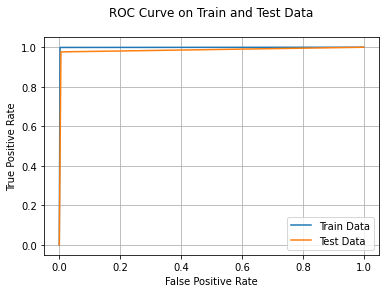

In [88]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_xgb, y_train_pred_non_smote_normalized_xgb))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_xgb, y_test_pred_non_smote_normalized_xgb))

plt.plot(train_fpr_non_smote_normalized_xgb, train_tpr_non_smote_normalized_xgb, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_xgb, test_tpr_non_smote_normalized_xgb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


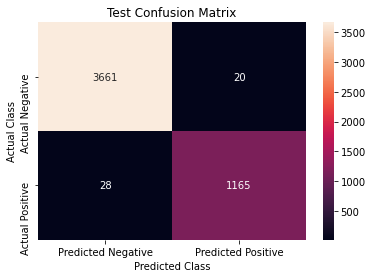

                 Predicted Negative  Predicted Positive
Actual Negative                3661                  20
Actual Positive                  28                1165


In [89]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_xgb = confusion_matrix(y_test_non_smote_normalized_xgb, y_test_pred_non_smote_normalized_xgb)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_xgb_df = pd.DataFrame(cm_test_non_smote_normalized_xgb, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_xgb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_xgb_df)

In [90]:
_, _, false_negative_non_smote_normalized_xgb, true_positive_non_smote_normalized_xgb = cm_test_non_smote_normalized_xgb.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_xgb/(false_negative_non_smote_normalized_xgb+true_positive_non_smote_normalized_xgb)) * 100, "%")

False Negative Rate =  2.347024308466052 %


In [91]:
print(classification_report(y_test_non_smote_normalized_xgb, y_test_pred_non_smote_normalized_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3681
           1       0.98      0.98      0.98      1193

    accuracy                           0.99      4874
   macro avg       0.99      0.99      0.99      4874
weighted avg       0.99      0.99      0.99      4874



In [92]:
feature_importance_non_smote_normalized_xgb = pd.DataFrame({'Feature Importance': rf_non_smote_normalized.feature_importances_}, index=x_non_smote_normalized_xgb.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_normalized_xgb.head(20)

Feature Importance
satisfaction_level                0.336996
time_spend_company                0.254130
average_montly_hours              0.129620
last_evaluation_rating            0.126518
projects_worked_on                0.111319
Work_accident_True                0.010318
Work_accident_False               0.007832
salary_high                       0.006537
salary_low                        0.005014
salary_medium                     0.003245
Department_technical              0.002984
Department_hr                     0.001284
Department_IT                     0.001035
Department_product_mng            0.001003
Department_RandD                  0.000881
Department_accounting             0.000816
Department_management             0.000467

In [94]:
dill_dump_session('15_all_xgboost_model_trained')

# 16 DL Algorithms 1 - Artificial Neural Networks 1 (ANN-1)

In [4]:
dill_load_session('15_all_xgboost_model_trained')

## 16.1 ANN-1 On SMOTE Standardized Data

In [5]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [11]:
x_smote_standardized_ann1 = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_ann1 = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [12]:
# splitting into train & test set..
x_train_smote_standardized_ann1, x_test_smote_standardized_ann1, y_train_smote_standardized_ann1, y_test_smote_standardized_ann1 = train_test_split(x_smote_standardized_ann1, y_smote_standardized_ann1, test_size = 0.20, random_state=21, stratify=y_smote_standardized_ann1)

print("len(x_train_smote_standardized_ann1) = ", len(x_train_smote_standardized_ann1))
print("len(y_train_smote_standardized_ann1) = ", len(y_train_smote_standardized_ann1))

print("\nlen(x_test_smote_standardized_ann1) = ", len(x_test_smote_standardized_ann1))
print("len(y_test_smote_standardized_ann1) = ", len(y_test_smote_standardized_ann1))

len(x_train_smote_standardized_xgb) =  29444
len(y_train_smote_standardized_xgb) =  29444

len(x_test_smote_standardized_xgb) =  7362
len(y_test_smote_standardized_xgb) =  7362


In [136]:
y_train_smote_standardized_ann1_to_cateogrical = to_categorical(y_train_smote_standardized_ann1, num_classes=2)
print(y_train_smote_standardized_ann1_to_cateogrical.shape)

y_test_smote_standardized_ann1_to_cateogrical = to_categorical(y_test_smote_standardized_ann1, num_classes=2)
print(y_test_smote_standardized_ann1_to_cateogrical.shape)

(29444, 2)
(7362, 2)


In [207]:
y_train_smote_standardized_ann1[:5]

Attrition
22615          0
6727           0
23999          1
33954          1
24229          1

In [206]:
y_train_smote_standardized_ann1_to_cateogrical[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [183]:
# model params:
input_dim, output_dim, n_epochs = x_train_smote_standardized_ann1.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [18]:
x_train_smote_standardized_ann1.shape

(29444, 17)

In [153]:
y_train_smote_standardized_ann1.shape

(29444, 1)

In [123]:
y_train_smote_standardized_ann1.nunique()

Attrition    2
dtype: int64

In [94]:
# ann1_model_standardized = Sequential()
# ann1_model_standardized.add(Dense(1360, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))

# ann1_model_standardized.add(BatchNormalization())

# ann1_model_standardized.add(Dense(680, activation='relu'))

# ann1_model_standardized.add(Dropout(0.25))

# ann1_model_standardized.add(Dense(170, activation='relu'))

# ann1_model_standardized.add(BatchNormalization())

# ann1_model_standardized.add(Dense(80, activation='relu'))

# ann1_model_standardized.add(Dropout(0.25))

# ann1_model_standardized.add(Dense(40, activation='relu'))
# ann1_model_standardized.add(Dense(output_dim, activation='sigmoid'))

# ann1_model_standardized.summary()

In [250]:
ann1_model_smote_standardized = Sequential()
ann1_model_smote_standardized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann1_model_smote_standardized.add(Dense(170, activation='relu'))
ann1_model_smote_standardized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann1_model_smote_standardized.add(Dense(40, activation='relu'))
ann1_model_smote_standardized.add(Dense(output_dim, activation='sigmoid'))

ann1_model_smote_standardized.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 680)               12240     
_________________________________________________________________
dense_138 (Dense)            (None, 170)               115770    
_________________________________________________________________
dense_139 (Dense)            (None, 80)                13680     
_________________________________________________________________
dense_140 (Dense)            (None, 40)                3240      
_________________________________________________________________
dense_141 (Dense)            (None, 2)                 82        
Total params: 145,012
Trainable params: 145,012
Non-trainable params: 0
_________________________________________________________________


In [251]:
# ann1_model_standardized = Sequential()
# ann1_model_standardized.add(Dense(34, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# ann1_model_standardized.add(Dense(17, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
# ann1_model_standardized.add(Dense(output_dim, activation='sigmoid'))

# ann1_model_standardized.summary()

In [252]:
ALL_METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

In [253]:
adam_optimizer = Adam(learning_rate=0.01)
ann1_model_smote_standardized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [254]:
ann1_model_fit_standardized = ann1_model_smote_standardized.fit(x_train_smote_standardized_ann1, y_train_smote_standardized_ann1_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
617/617 [==============================] - 10s 9ms/step - loss: 2.0027 - tp: 9000.7249 - fp: 879.4126 - tn: 9024.4806 - fn: 903.1683 - accuracy: 0.8979 - precision: 0.8993 - recall: 0.8934 - auc: 0.9474 - val_loss: 0.2648 - val_tp: 8994.0000 - val_fp: 713.0000 - val_tn: 9004.0000 - val_fn: 723.0000 - val_accuracy: 0.9261 - val_precision: 0.9265 - val_recall: 0.9256 - val_auc: 0.9707
Epoch 2/50
617/617 [==============================] - 4s 6ms/step - loss: 0.2531 - tp: 9234.9935 - fp: 663.3625 - tn: 9240.5307 - fn: 668.8997 - accuracy: 0.9328 - precision: 0.9330 - recall: 0.9325 - auc: 0.9713 - val_loss: 0.2386 - val_tp: 9089.0000 - val_fp: 619.0000 - val_tn: 9098.0000 - val_fn: 628.0000 - val_accuracy: 0.9358 - val_precision: 0.9362 - val_recall: 0.9354 - val_auc: 0.9730
Epoch 3/50
617/617 [==============================] - 4s 6ms/step - loss: 0.2434 - tp: 9254.7330 - fp: 644.9401 - tn: 9258.9531 - fn: 649.1602 - accuracy: 0.9347 - precision: 0.9350 - recall: 0.9344 - auc: 0

In [326]:
# ann1_model_smote_standardized.history

In [328]:
# ann1_model_smote_standardized.get_weights()

In [257]:
y_train_pred_smote_standardized_ann1 = np.argmax(ann1_model_smote_standardized.predict(x_train_smote_standardized_ann1), axis=1)
y_test_pred_smote_standardized_ann1 = np.argmax(ann1_model_smote_standardized.predict(x_test_smote_standardized_ann1), axis=1)

In [258]:
print(y_train_smote_standardized_ann1.shape)
print(y_train_pred_smote_standardized_ann1.shape)

(29444, 1)
(29444,)



AUC_train =  0.9437576416247792
AUC_test =  0.939554468894322


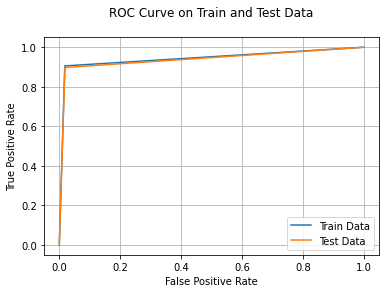

In [259]:
train_fpr_smote_standardized_ann1, train_tpr_smote_standardized_ann1, _ = roc_curve(y_train_smote_standardized_ann1, y_train_pred_smote_standardized_ann1)
test_fpr_smote_standardized_ann1, test_tpr_smote_standardized_ann1, _ = roc_curve(y_test_smote_standardized_ann1, y_test_pred_smote_standardized_ann1)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_ann1, y_train_pred_smote_standardized_ann1))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_ann1, y_test_pred_smote_standardized_ann1))

plt.plot(train_fpr_smote_standardized_ann1, train_tpr_smote_standardized_ann1, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_ann1, test_tpr_smote_standardized_ann1, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


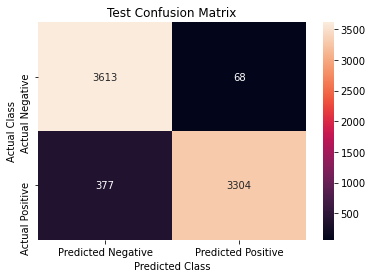

                 Predicted Negative  Predicted Positive
Actual Negative                3613                  68
Actual Positive                 377                3304


In [260]:
print("Test confusion matrix :")
cm_test_smote_standardized_ann1 = confusion_matrix(y_test_smote_standardized_ann1, y_test_pred_smote_standardized_ann1)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_ann1_df = pd.DataFrame(cm_test_smote_standardized_ann1, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_ann1_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_ann1_df)

In [261]:
_, _, false_negative_smote_standardized_ann1, true_positive_smote_standardized_ann1 = cm_test_smote_standardized_ann1.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_ann1/(false_negative_smote_standardized_ann1+true_positive_smote_standardized_ann1)) * 100, "%")

False Negative Rate =  10.241782124422711 %


In [262]:
print(classification_report(y_test_smote_standardized_ann1, y_test_pred_smote_standardized_ann1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3681
           1       0.98      0.90      0.94      3681

    accuracy                           0.94      7362
   macro avg       0.94      0.94      0.94      7362
weighted avg       0.94      0.94      0.94      7362



## 16.2 ANN-1 On SMOTE Normalized Data

In [208]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [209]:
x_smote_normalized_ann1 = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_ann1 = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [210]:
# splitting into train & test set..
x_train_smote_normalized_ann1, x_test_smote_normalized_ann1, y_train_smote_normalized_ann1, y_test_smote_normalized_ann1 = train_test_split(x_smote_normalized_ann1, y_smote_normalized_ann1, test_size = 0.20, random_state=21, stratify=y_smote_normalized_ann1)

print("len(x_train_smote_normalized_ann1) = ", len(x_train_smote_normalized_ann1))
print("len(y_train_smote_normalized_ann1) = ", len(y_train_smote_normalized_ann1))

print("\nlen(x_test_smote_normalized_ann1) = ", len(x_test_smote_normalized_ann1))
print("len(y_test_smote_normalized_ann1) = ", len(y_test_smote_normalized_ann1))

len(x_train_smote_normalized_ann1) =  29444
len(y_train_smote_normalized_ann1) =  29444

len(x_test_smote_normalized_ann1) =  7362
len(y_test_smote_normalized_ann1) =  7362


In [211]:
y_train_smote_normalized_ann1_to_cateogrical = to_categorical(y_train_smote_normalized_ann1, num_classes=2)
print(y_train_smote_normalized_ann1_to_cateogrical.shape)

y_test_smote_normalized_ann1_to_cateogrical = to_categorical(y_test_smote_normalized_ann1, num_classes=2)
print(y_test_smote_normalized_ann1_to_cateogrical.shape)

(29444, 2)
(7362, 2)


In [212]:
# model params:
input_dim, output_dim, n_epochs = x_train_smote_normalized_ann1.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [263]:
ann1_model_smote_normalized = Sequential()
ann1_model_smote_normalized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann1_model_smote_normalized.add(Dense(170, activation='relu'))
ann1_model_smote_normalized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann1_model_smote_normalized.add(Dense(40, activation='relu'))
ann1_model_smote_normalized.add(Dense(output_dim, activation='sigmoid'))

ann1_model_smote_normalized.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 680)               12240     
_________________________________________________________________
dense_143 (Dense)            (None, 170)               115770    
_________________________________________________________________
dense_144 (Dense)            (None, 80)                13680     
_________________________________________________________________
dense_145 (Dense)            (None, 40)                3240      
_________________________________________________________________
dense_146 (Dense)            (None, 2)                 82        
Total params: 145,012
Trainable params: 145,012
Non-trainable params: 0
_________________________________________________________________


In [264]:
adam_optimizer = Adam(learning_rate=0.01)
ann1_model_smote_normalized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [265]:
ann1_model_fit_normalized = ann1_model_smote_normalized.fit(x_train_smote_normalized_ann1, y_train_smote_normalized_ann1_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
617/617 [==============================] - 9s 9ms/step - loss: 2.1403 - tp: 17404.2896 - fp: 2281.3900 - tn: 17339.5032 - fn: 2216.6036 - accuracy: 0.8873 - precision: 0.8859 - recall: 0.8891 - auc: 0.9546 - val_loss: 0.3135 - val_tp: 8834.0000 - val_fp: 871.0000 - val_tn: 8846.0000 - val_fn: 883.0000 - val_accuracy: 0.9097 - val_precision: 0.9103 - val_recall: 0.9091 - val_auc: 0.9594
Epoch 2/50
617/617 [==============================] - 4s 6ms/step - loss: 0.2995 - tp: 9062.2362 - fp: 838.5243 - tn: 9065.3689 - fn: 841.6570 - accuracy: 0.9144 - precision: 0.9145 - recall: 0.9143 - auc: 0.9607 - val_loss: 0.3000 - val_tp: 8828.0000 - val_fp: 890.0000 - val_tn: 8827.0000 - val_fn: 889.0000 - val_accuracy: 0.9085 - val_precision: 0.9084 - val_recall: 0.9085 - val_auc: 0.9598
Epoch 3/50
617/617 [==============================] - 4s 7ms/step - loss: 0.2812 - tp: 9102.8932 - fp: 796.9531 - tn: 9106.9401 - fn: 801.0000 - accuracy: 0.9191 - precision: 0.9193 - recall: 0.9190 - auc

In [266]:
y_train_pred_smote_normalized_ann1 = np.argmax(ann1_model_smote_normalized.predict(x_train_smote_normalized_ann1), axis=1)
y_test_pred_smote_normalized_ann1 = np.argmax(ann1_model_smote_normalized.predict(x_test_smote_normalized_ann1), axis=1)


AUC_train =  0.9275913598695829
AUC_test =  0.9198587340396631


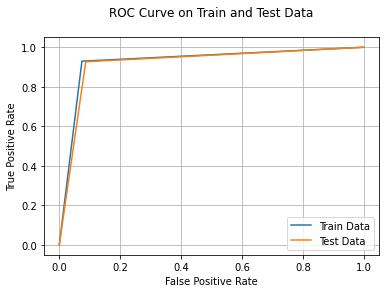

In [267]:
train_fpr_smote_normalized_ann1, train_tpr_smote_normalized_ann1, _ = roc_curve(y_train_smote_normalized_ann1, y_train_pred_smote_normalized_ann1)
test_fpr_smote_normalized_ann1, test_tpr_smote_normalized_ann1, _ = roc_curve(y_test_smote_normalized_ann1, y_test_pred_smote_normalized_ann1)

print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_ann1, y_train_pred_smote_normalized_ann1))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_ann1, y_test_pred_smote_normalized_ann1))

plt.plot(train_fpr_smote_normalized_ann1, train_tpr_smote_normalized_ann1, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_ann1, test_tpr_smote_normalized_ann1, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


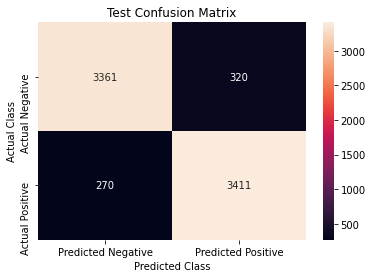

                 Predicted Negative  Predicted Positive
Actual Negative                3361                 320
Actual Positive                 270                3411


In [268]:
print("Test confusion matrix :")
cm_test_smote_normalized_ann1 = confusion_matrix(y_test_smote_normalized_ann1, y_test_pred_smote_normalized_ann1)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_ann1_df = pd.DataFrame(cm_test_smote_normalized_ann1, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_ann1_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_ann1_df)


In [269]:
_, _, false_negative_smote_normalized_ann1, true_positive_smote_normalized_ann1 = cm_test_smote_normalized_ann1.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_ann1/(false_negative_smote_normalized_ann1+true_positive_smote_normalized_ann1)) * 100, "%")

False Negative Rate =  7.334963325183375 %


In [270]:
print(classification_report(y_test_smote_normalized_ann1, y_test_pred_smote_normalized_ann1))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3681
           1       0.91      0.93      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362



## 16.3 ANN-1 On NON-SMOTE Standardized Data

In [221]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [222]:
x_non_smote_standardized_ann1 = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_ann1 = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [223]:
# splitting into train & test set..
x_train_non_smote_standardized_ann1, x_test_non_smote_standardized_ann1, y_train_non_smote_standardized_ann1, y_test_non_smote_standardized_ann1 = train_test_split(x_non_smote_standardized_ann1, y_non_smote_standardized_ann1, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_ann1)

print("len(x_train_non_smote_standardized_ann1) = ", len(x_train_non_smote_standardized_ann1))
print("len(y_train_non_smote_standardized_ann1) = ", len(y_train_non_smote_standardized_ann1))

print("\nlen(x_test_non_smote_standardized_ann1) = ", len(x_test_non_smote_standardized_ann1))
print("len(y_test_non_smote_standardized_ann1) = ", len(y_test_non_smote_standardized_ann1))

len(x_train_non_smote_standardized_ann1) =  19493
len(y_train_non_smote_standardized_ann1) =  19493

len(x_test_non_smote_standardized_ann1) =  4874
len(y_test_non_smote_standardized_ann1) =  4874


In [224]:
y_train_non_smote_standardized_ann1_to_cateogrical = to_categorical(y_train_non_smote_standardized_ann1, num_classes=2)
print(y_train_non_smote_standardized_ann1_to_cateogrical.shape)

y_test_non_smote_standardized_ann1_to_cateogrical = to_categorical(y_test_non_smote_standardized_ann1, num_classes=2)
print(y_test_non_smote_standardized_ann1_to_cateogrical.shape)

(19493, 2)
(4874, 2)


In [225]:
# model params:
input_dim, output_dim, n_epochs = x_train_non_smote_standardized_ann1.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [227]:
ann1_model_non_smote_standardized = Sequential()
ann1_model_non_smote_standardized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann1_model_non_smote_standardized.add(Dense(170, activation='relu'))
ann1_model_non_smote_standardized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann1_model_non_smote_standardized.add(Dense(40, activation='relu'))
ann1_model_non_smote_standardized.add(Dense(output_dim, activation='sigmoid'))

ann1_model_non_smote_standardized.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 680)               12240     
_________________________________________________________________
dense_123 (Dense)            (None, 170)               115770    
_________________________________________________________________
dense_124 (Dense)            (None, 80)                13680     
_________________________________________________________________
dense_125 (Dense)            (None, 40)                3240      
_________________________________________________________________
dense_126 (Dense)            (None, 2)                 82        
Total params: 145,012
Trainable params: 145,012
Non-trainable params: 0
_________________________________________________________________


In [228]:
adam_optimizer = Adam(learning_rate=0.01)
ann1_model_non_smote_standardized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [229]:
ann1_model_fit_non_smote_standardized = ann1_model_non_smote_standardized.fit(x_train_non_smote_standardized_ann1, y_train_non_smote_standardized_ann1_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
409/409 [==============================] - 10s 14ms/step - loss: 2.5935 - tp: 14932.6878 - fp: 1374.6854 - tn: 14918.1000 - fn: 1360.0976 - accuracy: 0.9161 - precision: 0.9158 - recall: 0.9165 - auc: 0.9650 - val_loss: 0.2484 - val_tp: 6070.0000 - val_fp: 370.0000 - val_tn: 6063.0000 - val_fn: 363.0000 - val_accuracy: 0.9430 - val_precision: 0.9425 - val_recall: 0.9436 - val_auc: 0.9760
Epoch 2/50
409/409 [==============================] - 3s 7ms/step - loss: 0.2456 - tp: 6157.4756 - fp: 414.9585 - tn: 6160.8268 - fn: 418.3098 - accuracy: 0.9349 - precision: 0.9350 - recall: 0.9346 - auc: 0.9754 - val_loss: 0.3214 - val_tp: 5725.0000 - val_fp: 712.0000 - val_tn: 5721.0000 - val_fn: 708.0000 - val_accuracy: 0.8896 - val_precision: 0.8894 - val_recall: 0.8899 - val_auc: 0.9612
Epoch 3/50
409/409 [==============================] - 3s 8ms/step - loss: 0.2481 - tp: 6181.4220 - fp: 394.7122 - tn: 6181.0732 - fn: 394.3634 - accuracy: 0.9356 - precision: 0.9355 - recall: 0.9357 - a

In [230]:
y_train_pred_non_smote_standardized_ann1 = np.argmax(ann1_model_non_smote_standardized.predict(x_train_non_smote_standardized_ann1), axis=1)
y_test_pred_non_smote_standardized_ann1 = np.argmax(ann1_model_non_smote_standardized.predict(x_test_non_smote_standardized_ann1), axis=1)


AUC_train =  0.9429355658853524
AUC_test =  0.9456270880143225


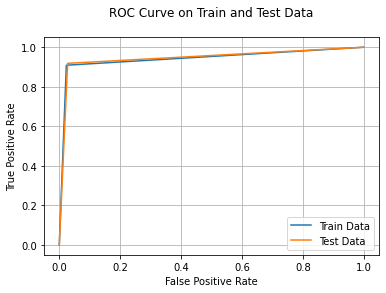

In [231]:
train_fpr_non_smote_standardized_ann1, train_tpr_non_smote_standardized_ann1, _ = roc_curve(y_train_non_smote_standardized_ann1, y_train_pred_non_smote_standardized_ann1)
test_fpr_non_smote_standardized_ann1, test_tpr_non_smote_standardized_ann1, _ = roc_curve(y_test_non_smote_standardized_ann1, y_test_pred_non_smote_standardized_ann1)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_ann1, y_train_pred_non_smote_standardized_ann1))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_ann1, y_test_pred_non_smote_standardized_ann1))

plt.plot(train_fpr_non_smote_standardized_ann1, train_tpr_non_smote_standardized_ann1, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_ann1, test_tpr_non_smote_standardized_ann1, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


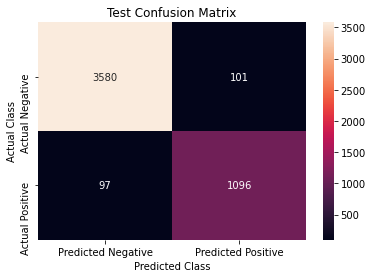

                 Predicted Negative  Predicted Positive
Actual Negative                3580                 101
Actual Positive                  97                1096


In [232]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_ann1 = confusion_matrix(y_test_non_smote_standardized_ann1, y_test_pred_non_smote_standardized_ann1)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_ann1_df = pd.DataFrame(cm_test_non_smote_standardized_ann1, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_ann1_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_ann1_df)

In [233]:
_, _, false_negative_non_smote_standardized_ann1, true_positive_non_smote_standardized_ann1 = cm_test_non_smote_standardized_ann1.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_ann1/(false_negative_non_smote_standardized_ann1+true_positive_non_smote_standardized_ann1)) * 100, "%")

False Negative Rate =  8.130762782900252 %


In [234]:
print(classification_report(y_test_non_smote_standardized_ann1, y_test_pred_non_smote_standardized_ann1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3681
           1       0.92      0.92      0.92      1193

    accuracy                           0.96      4874
   macro avg       0.94      0.95      0.95      4874
weighted avg       0.96      0.96      0.96      4874



## 16.4 ANN-1 On NON-SMOTE Normalized Data

In [235]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [236]:
x_non_smote_normalized_ann1 = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_ann1 = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [237]:
# splitting into train & test set..
x_train_non_smote_normalized_ann1, x_test_non_smote_normalized_ann1, y_train_non_smote_normalized_ann1, y_test_non_smote_normalized_ann1 = train_test_split(x_non_smote_normalized_ann1, y_non_smote_normalized_ann1, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_ann1)

print("len(x_train_non_smote_normalized_ann1) = ", len(x_train_non_smote_normalized_ann1))
print("len(y_train_non_smote_normalized_ann1) = ", len(y_train_non_smote_normalized_ann1))

print("\nlen(x_test_non_smote_normalized_ann1) = ", len(x_test_non_smote_normalized_ann1))
print("len(y_test_non_smote_normalized_ann1) = ", len(y_test_non_smote_normalized_ann1))

len(x_train_non_smote_normalized_ann1) =  19493
len(y_train_non_smote_normalized_ann1) =  19493

len(x_test_non_smote_normalized_ann1) =  4874
len(y_test_non_smote_normalized_ann1) =  4874


In [238]:
y_train_non_smote_normalized_ann1_to_cateogrical = to_categorical(y_train_non_smote_normalized_ann1, num_classes=2)
print(y_train_non_smote_normalized_ann1_to_cateogrical.shape)

y_test_non_smote_normalized_ann1_to_cateogrical = to_categorical(y_test_non_smote_normalized_ann1, num_classes=2)
print(y_test_non_smote_normalized_ann1_to_cateogrical.shape)

(19493, 2)
(4874, 2)


In [239]:
# model params:
input_dim, output_dim, n_epochs = x_train_non_smote_normalized_ann1.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [240]:
ann1_model_non_smote_normalized = Sequential()
ann1_model_non_smote_normalized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann1_model_non_smote_normalized.add(Dense(170, activation='relu'))
ann1_model_non_smote_normalized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann1_model_non_smote_normalized.add(Dense(40, activation='relu'))
ann1_model_non_smote_normalized.add(Dense(output_dim, activation='sigmoid'))

ann1_model_non_smote_normalized.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 680)               12240     
_________________________________________________________________
dense_128 (Dense)            (None, 170)               115770    
_________________________________________________________________
dense_129 (Dense)            (None, 80)                13680     
_________________________________________________________________
dense_130 (Dense)            (None, 40)                3240      
_________________________________________________________________
dense_131 (Dense)            (None, 2)                 82        
Total params: 145,012
Trainable params: 145,012
Non-trainable params: 0
_________________________________________________________________


In [241]:
adam_optimizer = Adam(learning_rate=0.01)
ann1_model_non_smote_normalized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [242]:
ann1_model_fit_non_smote_normalized = ann1_model_non_smote_normalized.fit(x_train_non_smote_normalized_ann1, y_train_non_smote_normalized_ann1_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
409/409 [==============================] - 9s 12ms/step - loss: 2.6520 - tp: 11404.9195 - fp: 1567.9293 - tn: 11440.8561 - fn: 1603.8659 - accuracy: 0.8838 - precision: 0.8849 - recall: 0.8823 - auc: 0.9563 - val_loss: 0.4022 - val_tp: 5453.0000 - val_fp: 966.0000 - val_tn: 5467.0000 - val_fn: 980.0000 - val_accuracy: 0.8487 - val_precision: 0.8495 - val_recall: 0.8477 - val_auc: 0.9348
Epoch 2/50
409/409 [==============================] - 3s 7ms/step - loss: 0.3186 - tp: 5915.2220 - fp: 656.8659 - tn: 5918.9195 - fn: 660.5634 - accuracy: 0.8957 - precision: 0.8960 - recall: 0.8954 - auc: 0.9570 - val_loss: 0.2966 - val_tp: 5827.0000 - val_fp: 607.0000 - val_tn: 5826.0000 - val_fn: 606.0000 - val_accuracy: 0.9057 - val_precision: 0.9057 - val_recall: 0.9058 - val_auc: 0.9652
Epoch 3/50
409/409 [==============================] - 3s 7ms/step - loss: 0.2664 - tp: 6031.0756 - fp: 544.8659 - tn: 6030.9195 - fn: 544.7098 - accuracy: 0.9182 - precision: 0.9181 - recall: 0.9182 - au

In [243]:
y_train_pred_non_smote_normalized_ann1 = np.argmax(ann1_model_non_smote_normalized.predict(x_train_non_smote_normalized_ann1), axis=1)
y_test_pred_non_smote_normalized_ann1 = np.argmax(ann1_model_non_smote_normalized.predict(x_test_non_smote_normalized_ann1), axis=1)


AUC_train =  0.9273689823419472
AUC_test =  0.9286283088003392


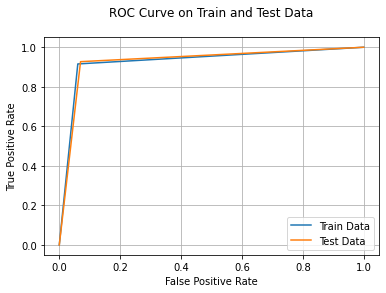

In [244]:
train_fpr_non_smote_normalized_ann1, train_tpr_non_smote_normalized_ann1, _ = roc_curve(y_train_non_smote_normalized_ann1, y_train_pred_non_smote_normalized_ann1)
test_fpr_non_smote_normalized_ann1, test_tpr_non_smote_normalized_ann1, _ = roc_curve(y_test_non_smote_normalized_ann1, y_test_pred_non_smote_normalized_ann1)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_ann1, y_train_pred_non_smote_normalized_ann1))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_ann1, y_test_pred_non_smote_normalized_ann1))

plt.plot(train_fpr_non_smote_normalized_ann1, train_tpr_non_smote_normalized_ann1, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_ann1, test_tpr_non_smote_normalized_ann1, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


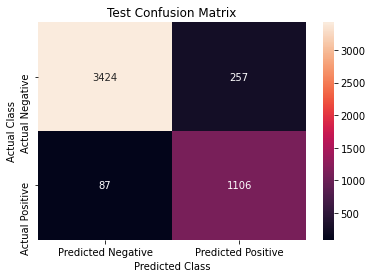

                 Predicted Negative  Predicted Positive
Actual Negative                3424                 257
Actual Positive                  87                1106


In [245]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_ann1 = confusion_matrix(y_test_non_smote_normalized_ann1, y_test_pred_non_smote_normalized_ann1)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_ann1_df = pd.DataFrame(cm_test_non_smote_normalized_ann1, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_ann1_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_ann1_df)

In [246]:
_, _, false_negative_non_smote_normalized_ann1, true_positive_non_smote_normalized_ann1 = cm_test_non_smote_normalized_ann1.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_ann1/(false_negative_non_smote_normalized_ann1+true_positive_non_smote_normalized_ann1)) * 100, "%")

False Negative Rate =  7.292539815590946 %


In [247]:
print(classification_report(y_test_non_smote_normalized_ann1, y_test_pred_non_smote_normalized_ann1))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3681
           1       0.81      0.93      0.87      1193

    accuracy                           0.93      4874
   macro avg       0.89      0.93      0.91      4874
weighted avg       0.94      0.93      0.93      4874



# 17 DL Algorithms 2 - Artificial Neural Networks 2 (ANN-2) (ANN-1 + Dropout + BatchNormalization)

## 17.1 ANN-2 On SMOTE Standardized Data

In [271]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [272]:
x_smote_standardized_ann2 = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_ann2 = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [273]:
# splitting into train & test set..
x_train_smote_standardized_ann2, x_test_smote_standardized_ann2, y_train_smote_standardized_ann2, y_test_smote_standardized_ann2 = train_test_split(x_smote_standardized_ann2, y_smote_standardized_ann2, test_size = 0.20, random_state=21, stratify=y_smote_standardized_ann2)

print("len(x_train_smote_standardized_ann2) = ", len(x_train_smote_standardized_ann2))
print("len(y_train_smote_standardized_ann2) = ", len(y_train_smote_standardized_ann2))

print("\nlen(x_test_smote_standardized_ann2) = ", len(x_test_smote_standardized_ann2))
print("len(y_test_smote_standardized_ann2) = ", len(y_test_smote_standardized_ann2))

len(x_train_smote_standardized_ann2) =  29444
len(y_train_smote_standardized_ann2) =  29444

len(x_test_smote_standardized_ann2) =  7362
len(y_test_smote_standardized_ann2) =  7362


In [274]:
y_train_smote_standardized_ann2_to_cateogrical = to_categorical(y_train_smote_standardized_ann2, num_classes=2)
print(y_train_smote_standardized_ann2_to_cateogrical.shape)

y_test_smote_standardized_ann2_to_cateogrical = to_categorical(y_test_smote_standardized_ann2, num_classes=2)
print(y_test_smote_standardized_ann2_to_cateogrical.shape)

(29444, 2)
(7362, 2)


In [275]:
# model params:
input_dim, output_dim, n_epochs = x_train_smote_standardized_ann2.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [276]:
ann2_model_smote_standardized = Sequential()
ann2_model_smote_standardized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann2_model_smote_standardized.add(BatchNormalization())
ann2_model_smote_standardized.add(Dense(170, activation='relu'))
ann2_model_smote_standardized.add(Dropout(0.25))
ann2_model_smote_standardized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann2_model_smote_standardized.add(BatchNormalization())
ann2_model_smote_standardized.add(Dropout(0.25))
ann2_model_smote_standardized.add(Dense(40, activation='relu'))
ann2_model_smote_standardized.add(Dense(output_dim, activation='sigmoid'))

ann2_model_smote_standardized.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 680)               12240     
_________________________________________________________________
batch_normalization_4 (Batch (None, 680)               2720      
_________________________________________________________________
dense_148 (Dense)            (None, 170)               115770    
_________________________________________________________________
dropout_10 (Dropout)         (None, 170)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 80)                13680     
_________________________________________________________________
batch_normalization_5 (Batch (None, 80)                320       
_________________________________________________________________
dropout_11 (Dropout)         (None, 80)              

In [277]:
adam_optimizer = Adam(learning_rate=0.01)
ann2_model_smote_standardized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [278]:
ann2_model_fit_smote_standardized = ann2_model_smote_standardized.fit(x_train_smote_standardized_ann2, y_train_smote_standardized_ann2_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
617/617 [==============================] - 13s 12ms/step - loss: 2.1496 - tp: 17890.8932 - fp: 1737.6359 - tn: 17883.2573 - fn: 1730.0000 - accuracy: 0.9130 - precision: 0.9129 - recall: 0.9133 - auc: 0.9605 - val_loss: 0.3371 - val_tp: 8981.0000 - val_fp: 746.0000 - val_tn: 8971.0000 - val_fn: 736.0000 - val_accuracy: 0.9237 - val_precision: 0.9233 - val_recall: 0.9243 - val_auc: 0.9683
Epoch 2/50
617/617 [==============================] - 6s 9ms/step - loss: 0.3831 - tp: 8991.3026 - fp: 927.0502 - tn: 8976.8430 - fn: 912.5906 - accuracy: 0.9052 - precision: 0.9046 - recall: 0.9061 - auc: 0.9525 - val_loss: 0.3378 - val_tp: 8909.0000 - val_fp: 789.0000 - val_tn: 8928.0000 - val_fn: 808.0000 - val_accuracy: 0.9178 - val_precision: 0.9186 - val_recall: 0.9168 - val_auc: 0.9604
Epoch 3/50
617/617 [==============================] - 6s 9ms/step - loss: 0.3310 - tp: 9077.2087 - fp: 824.3867 - tn: 9079.5065 - fn: 826.6845 - accuracy: 0.9163 - precision: 0.9164 - recall: 0.9161 - a

In [279]:
y_train_pred_smote_standardized_ann2 = np.argmax(ann2_model_smote_standardized.predict(x_train_smote_standardized_ann2), axis=1)
y_test_pred_smote_standardized_ann2 = np.argmax(ann2_model_smote_standardized.predict(x_test_smote_standardized_ann2), axis=1)


AUC_train =  0.9272517321016167
AUC_test =  0.9208095626188536


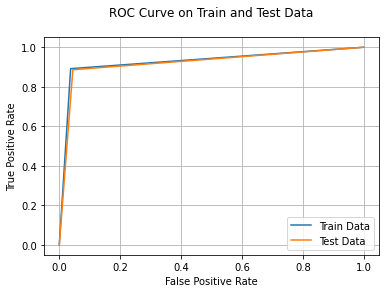

In [280]:
train_fpr_smote_standardized_ann2, train_tpr_smote_standardized_ann2, _ = roc_curve(y_train_smote_standardized_ann2, y_train_pred_smote_standardized_ann2)
test_fpr_smote_standardized_ann2, test_tpr_smote_standardized_ann2, _ = roc_curve(y_test_smote_standardized_ann2, y_test_pred_smote_standardized_ann2)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_ann2, y_train_pred_smote_standardized_ann2))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_ann2, y_test_pred_smote_standardized_ann2))

plt.plot(train_fpr_smote_standardized_ann2, train_tpr_smote_standardized_ann2, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_ann2, test_tpr_smote_standardized_ann2, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


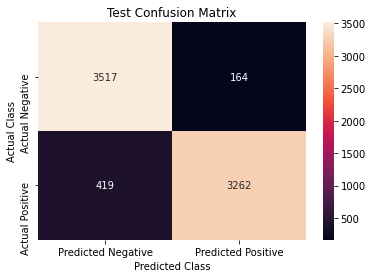

                 Predicted Negative  Predicted Positive
Actual Negative                3517                 164
Actual Positive                 419                3262


In [281]:
print("Test confusion matrix :")
cm_test_smote_standardized_ann2 = confusion_matrix(y_test_smote_standardized_ann2, y_test_pred_smote_standardized_ann2)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_ann2_df = pd.DataFrame(cm_test_smote_standardized_ann2, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_ann2_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_ann2_df)

In [282]:
_, _, false_negative_smote_standardized_ann2, true_positive_smote_standardized_ann2 = cm_test_smote_standardized_ann2.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_ann2/(false_negative_smote_standardized_ann2+true_positive_smote_standardized_ann2)) * 100, "%")

False Negative Rate =  11.382776419451236 %


In [283]:
print(classification_report(y_test_smote_standardized_ann2, y_test_pred_smote_standardized_ann2))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3681
           1       0.95      0.89      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362



## 17.2 ANN-2 On SMOTE Normalized Data

In [284]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [285]:
x_smote_normalized_ann2 = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_ann2 = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [286]:
# splitting into train & test set..
x_train_smote_normalized_ann2, x_test_smote_normalized_ann2, y_train_smote_normalized_ann2, y_test_smote_normalized_ann2 = train_test_split(x_smote_normalized_ann2, y_smote_normalized_ann2, test_size = 0.20, random_state=21, stratify=y_smote_normalized_ann2)

print("len(x_train_smote_normalized_ann2) = ", len(x_train_smote_normalized_ann2))
print("len(y_train_smote_normalized_ann2) = ", len(y_train_smote_normalized_ann2))

print("\nlen(x_test_smote_normalized_ann2) = ", len(x_test_smote_normalized_ann2))
print("len(y_test_smote_normalized_ann2) = ", len(y_test_smote_normalized_ann2))

len(x_train_smote_normalized_ann2) =  29444
len(y_train_smote_normalized_ann2) =  29444

len(x_test_smote_normalized_ann2) =  7362
len(y_test_smote_normalized_ann2) =  7362


In [287]:
y_train_smote_normalized_ann2_to_cateogrical = to_categorical(y_train_smote_normalized_ann2, num_classes=2)
print(y_train_smote_normalized_ann2_to_cateogrical.shape)

y_test_smote_normalized_ann2_to_cateogrical = to_categorical(y_test_smote_normalized_ann2, num_classes=2)
print(y_test_smote_normalized_ann2_to_cateogrical.shape)

(29444, 2)
(7362, 2)


In [288]:
# model params:
input_dim, output_dim, n_epochs = x_train_smote_normalized_ann2.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [289]:
ann2_model_smote_normalized = Sequential()
ann2_model_smote_normalized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann2_model_smote_normalized.add(BatchNormalization())
ann2_model_smote_normalized.add(Dense(170, activation='relu'))
ann2_model_smote_normalized.add(Dropout(0.25))
ann2_model_smote_normalized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann2_model_smote_normalized.add(BatchNormalization())
ann2_model_smote_normalized.add(Dropout(0.25))
ann2_model_smote_normalized.add(Dense(40, activation='relu'))
ann2_model_smote_normalized.add(Dense(output_dim, activation='sigmoid'))

ann2_model_smote_normalized.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 680)               12240     
_________________________________________________________________
batch_normalization_6 (Batch (None, 680)               2720      
_________________________________________________________________
dense_153 (Dense)            (None, 170)               115770    
_________________________________________________________________
dropout_12 (Dropout)         (None, 170)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 80)                13680     
_________________________________________________________________
batch_normalization_7 (Batch (None, 80)                320       
_________________________________________________________________
dropout_13 (Dropout)         (None, 80)              

In [290]:
adam_optimizer = Adam(learning_rate=0.01)
ann2_model_smote_normalized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [291]:
ann2_model_fit_normalized = ann2_model_smote_normalized.fit(x_train_smote_normalized_ann2, y_train_smote_normalized_ann2_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
617/617 [==============================] - 12s 12ms/step - loss: 2.2550 - tp: 17409.4773 - fp: 2238.0227 - tn: 17382.8706 - fn: 2211.4159 - accuracy: 0.8893 - precision: 0.8888 - recall: 0.8899 - auc: 0.9502 - val_loss: 0.4393 - val_tp: 8671.0000 - val_fp: 1025.0000 - val_tn: 8692.0000 - val_fn: 1046.0000 - val_accuracy: 0.8934 - val_precision: 0.8943 - val_recall: 0.8924 - val_auc: 0.9510
Epoch 2/50
617/617 [==============================] - 5s 8ms/step - loss: 0.4479 - tp: 8732.5906 - fp: 1167.7282 - tn: 8736.1650 - fn: 1171.3026 - accuracy: 0.8792 - precision: 0.8794 - recall: 0.8789 - auc: 0.9353 - val_loss: 0.3608 - val_tp: 8890.0000 - val_fp: 829.0000 - val_tn: 8888.0000 - val_fn: 827.0000 - val_accuracy: 0.9148 - val_precision: 0.9147 - val_recall: 0.9149 - val_auc: 0.9567
Epoch 3/50
617/617 [==============================] - 6s 9ms/step - loss: 0.3668 - tp: 8884.8528 - fp: 1018.2006 - tn: 8885.6926 - fn: 1019.0405 - accuracy: 0.8972 - precision: 0.8973 - recall: 0.89

In [292]:
y_train_pred_smote_normalized_ann2 = np.argmax(ann2_model_smote_normalized.predict(x_train_smote_normalized_ann2), axis=1)
y_test_pred_smote_normalized_ann2 = np.argmax(ann2_model_smote_normalized.predict(x_test_smote_normalized_ann2), axis=1)


AUC_train =  0.9215799483765792
AUC_test =  0.9168704156479218


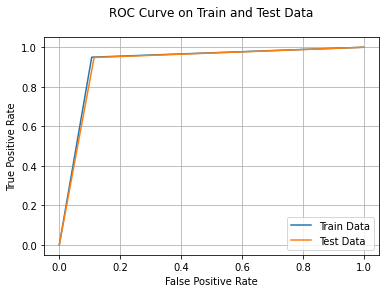

In [293]:
train_fpr_smote_normalized_ann2, train_tpr_smote_normalized_ann2, _ = roc_curve(y_train_smote_normalized_ann2, y_train_pred_smote_normalized_ann2)
test_fpr_smote_normalized_ann2, test_tpr_smote_normalized_ann2, _ = roc_curve(y_test_smote_normalized_ann2, y_test_pred_smote_normalized_ann2)

print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_ann2, y_train_pred_smote_normalized_ann2))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_ann2, y_test_pred_smote_normalized_ann2))

plt.plot(train_fpr_smote_normalized_ann2, train_tpr_smote_normalized_ann2, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_ann2, test_tpr_smote_normalized_ann2, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


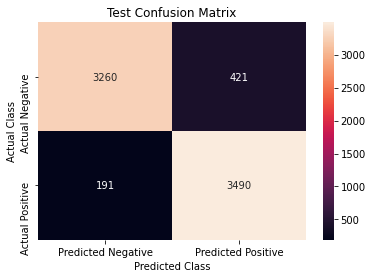

                 Predicted Negative  Predicted Positive
Actual Negative                3260                 421
Actual Positive                 191                3490


In [294]:
print("Test confusion matrix :")
cm_test_smote_normalized_ann2 = confusion_matrix(y_test_smote_normalized_ann2, y_test_pred_smote_normalized_ann2)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_ann2_df = pd.DataFrame(cm_test_smote_normalized_ann2, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_ann2_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_ann2_df)

In [295]:
_, _, false_negative_smote_normalized_ann2, true_positive_smote_normalized_ann2 = cm_test_smote_normalized_ann2.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_ann2/(false_negative_smote_normalized_ann2+true_positive_smote_normalized_ann2)) * 100, "%")

False Negative Rate =  5.188807389296387 %


In [296]:
print(classification_report(y_test_smote_normalized_ann2, y_test_pred_smote_normalized_ann2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3681
           1       0.89      0.95      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362



## 17.3 ANN-2 On NON-SMOTE Standardized Data

In [297]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [298]:
x_non_smote_standardized_ann2 = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_ann2 = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [299]:
# splitting into train & test set..
x_train_non_smote_standardized_ann2, x_test_non_smote_standardized_ann2, y_train_non_smote_standardized_ann2, y_test_non_smote_standardized_ann2 = train_test_split(x_non_smote_standardized_ann2, y_non_smote_standardized_ann2, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_ann2)

print("len(x_train_non_smote_standardized_ann2) = ", len(x_train_non_smote_standardized_ann2))
print("len(y_train_non_smote_standardized_ann2) = ", len(y_train_non_smote_standardized_ann2))

print("\nlen(x_test_non_smote_standardized_ann2) = ", len(x_test_non_smote_standardized_ann2))
print("len(y_test_non_smote_standardized_ann2) = ", len(y_test_non_smote_standardized_ann2))

len(x_train_non_smote_standardized_ann2) =  19493
len(y_train_non_smote_standardized_ann2) =  19493

len(x_test_non_smote_standardized_ann2) =  4874
len(y_test_non_smote_standardized_ann2) =  4874


In [300]:
y_train_non_smote_standardized_ann2_to_cateogrical = to_categorical(y_train_non_smote_standardized_ann2, num_classes=2)
print(y_train_non_smote_standardized_ann2_to_cateogrical.shape)

y_test_non_smote_standardized_ann2_to_cateogrical = to_categorical(y_test_non_smote_standardized_ann2, num_classes=2)
print(y_test_non_smote_standardized_ann2_to_cateogrical.shape)

(19493, 2)
(4874, 2)


In [301]:
# model params:
input_dim, output_dim, n_epochs = x_train_non_smote_standardized_ann2.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [302]:
ann2_model_non_smote_standardized = Sequential()
ann2_model_non_smote_standardized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann2_model_non_smote_standardized.add(BatchNormalization())
ann2_model_non_smote_standardized.add(Dense(170, activation='relu'))
ann2_model_non_smote_standardized.add(Dropout(0.25))
ann2_model_non_smote_standardized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann2_model_non_smote_standardized.add(BatchNormalization())
ann2_model_non_smote_standardized.add(Dropout(0.25))
ann2_model_non_smote_standardized.add(Dense(40, activation='relu'))
ann2_model_non_smote_standardized.add(Dense(output_dim, activation='sigmoid'))

ann2_model_non_smote_standardized.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 680)               12240     
_________________________________________________________________
batch_normalization_8 (Batch (None, 680)               2720      
_________________________________________________________________
dense_158 (Dense)            (None, 170)               115770    
_________________________________________________________________
dropout_14 (Dropout)         (None, 170)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 80)                13680     
_________________________________________________________________
batch_normalization_9 (Batch (None, 80)                320       
_________________________________________________________________
dropout_15 (Dropout)         (None, 80)              

In [303]:
adam_optimizer = Adam(learning_rate=0.01)
ann2_model_non_smote_standardized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [304]:
ann2_model_fit_non_smote_standardized = ann2_model_non_smote_standardized.fit(x_train_non_smote_standardized_ann2, y_train_non_smote_standardized_ann2_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
409/409 [==============================] - 10s 13ms/step - loss: 2.7259 - tp: 14816.5707 - fp: 1470.8122 - tn: 14821.9732 - fn: 1476.2146 - accuracy: 0.9105 - precision: 0.9107 - recall: 0.9102 - auc: 0.9633 - val_loss: 0.5451 - val_tp: 5325.0000 - val_fp: 1126.0000 - val_tn: 5307.0000 - val_fn: 1108.0000 - val_accuracy: 0.8264 - val_precision: 0.8255 - val_recall: 0.8278 - val_auc: 0.9211
Epoch 2/50
409/409 [==============================] - 4s 9ms/step - loss: 0.3832 - tp: 5950.2634 - fp: 622.3220 - tn: 5953.4634 - fn: 625.5220 - accuracy: 0.9029 - precision: 0.9031 - recall: 0.9028 - auc: 0.9557 - val_loss: 0.3144 - val_tp: 6010.0000 - val_fp: 443.0000 - val_tn: 5990.0000 - val_fn: 423.0000 - val_accuracy: 0.9327 - val_precision: 0.9313 - val_recall: 0.9342 - val_auc: 0.9729
Epoch 3/50
409/409 [==============================] - 4s 9ms/step - loss: 0.3594 - tp: 5972.7951 - fp: 604.4098 - tn: 5971.3756 - fn: 602.9902 - accuracy: 0.9043 - precision: 0.9044 - recall: 0.9043 -

In [305]:
y_train_pred_non_smote_standardized_ann2 = np.argmax(ann2_model_non_smote_standardized.predict(x_train_non_smote_standardized_ann2), axis=1)
y_test_pred_non_smote_standardized_ann2 = np.argmax(ann2_model_non_smote_standardized.predict(x_test_non_smote_standardized_ann2), axis=1)


AUC_train =  0.9349504408270192
AUC_test =  0.932734599389311


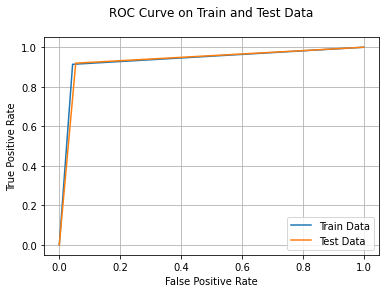

In [306]:
train_fpr_non_smote_standardized_ann2, train_tpr_non_smote_standardized_ann2, _ = roc_curve(y_train_non_smote_standardized_ann2, y_train_pred_non_smote_standardized_ann2)
test_fpr_non_smote_standardized_ann2, test_tpr_non_smote_standardized_ann2, _ = roc_curve(y_test_non_smote_standardized_ann2, y_test_pred_non_smote_standardized_ann2)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_ann2, y_train_pred_non_smote_standardized_ann2))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_ann2, y_test_pred_non_smote_standardized_ann2))

plt.plot(train_fpr_non_smote_standardized_ann2, train_tpr_non_smote_standardized_ann2, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_ann2, test_tpr_non_smote_standardized_ann2, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


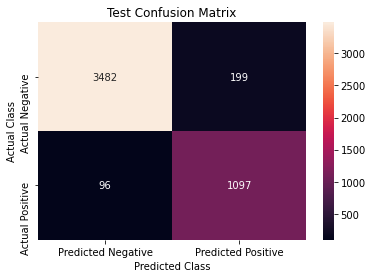

                 Predicted Negative  Predicted Positive
Actual Negative                3482                 199
Actual Positive                  96                1097


In [307]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_ann2 = confusion_matrix(y_test_non_smote_standardized_ann2, y_test_pred_non_smote_standardized_ann2)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_ann2_df = pd.DataFrame(cm_test_non_smote_standardized_ann2, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_ann2_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_ann2_df)

In [308]:
_, _, false_negative_non_smote_standardized_ann2, true_positive_non_smote_standardized_ann2 = cm_test_non_smote_standardized_ann2.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_ann2/(false_negative_non_smote_standardized_ann2+true_positive_non_smote_standardized_ann2)) * 100, "%")

False Negative Rate =  8.046940486169321 %


In [309]:
print(classification_report(y_test_non_smote_standardized_ann2, y_test_pred_non_smote_standardized_ann2))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3681
           1       0.85      0.92      0.88      1193

    accuracy                           0.94      4874
   macro avg       0.91      0.93      0.92      4874
weighted avg       0.94      0.94      0.94      4874



## 17.4 ANN-2 On NON-SMOTE Normalized Data

In [332]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [311]:
x_non_smote_normalized_ann2 = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_ann2 = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [313]:
# splitting into train & test set..
x_train_non_smote_normalized_ann2, x_test_non_smote_normalized_ann2, y_train_non_smote_normalized_ann2, y_test_non_smote_normalized_ann2 = train_test_split(x_non_smote_normalized_ann2, y_non_smote_normalized_ann2, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_ann2)

print("len(x_train_non_smote_normalized_ann2) = ", len(x_train_non_smote_normalized_ann2))
print("len(y_train_non_smote_normalized_ann2) = ", len(y_train_non_smote_normalized_ann2))

print("\nlen(x_test_non_smote_normalized_ann2) = ", len(x_test_non_smote_normalized_ann2))
print("len(y_test_non_smote_normalized_ann2) = ", len(y_test_non_smote_normalized_ann2))

len(x_train_non_smote_normalized_ann2) =  19493
len(y_train_non_smote_normalized_ann2) =  19493

len(x_test_non_smote_normalized_ann2) =  4874
len(y_test_non_smote_normalized_ann2) =  4874


In [314]:
y_train_non_smote_normalized_ann2_to_cateogrical = to_categorical(y_train_non_smote_normalized_ann2, num_classes=2)
print(y_train_non_smote_normalized_ann2_to_cateogrical.shape)

y_test_non_smote_normalized_ann2_to_cateogrical = to_categorical(y_test_non_smote_normalized_ann2, num_classes=2)
print(y_test_non_smote_normalized_ann2_to_cateogrical.shape)

(19493, 2)
(4874, 2)


In [315]:
# model params:
input_dim, output_dim, n_epochs = x_train_non_smote_normalized_ann2.shape[1], 2, 50
print("input_dim = ", input_dim)
print("output_dim = ", output_dim)
print("n_epochs = ", n_epochs)

input_dim =  17
output_dim =  2
n_epochs =  50


In [316]:
ann2_model_non_smote_normalized = Sequential()
ann2_model_non_smote_normalized.add(Dense(680, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
ann2_model_non_smote_normalized.add(BatchNormalization())
ann2_model_non_smote_normalized.add(Dense(170, activation='relu'))
ann2_model_non_smote_normalized.add(Dropout(0.25))
ann2_model_non_smote_normalized.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
ann2_model_non_smote_normalized.add(BatchNormalization())
ann2_model_non_smote_normalized.add(Dropout(0.25))
ann2_model_non_smote_normalized.add(Dense(40, activation='relu'))
ann2_model_non_smote_normalized.add(Dense(output_dim, activation='sigmoid'))

ann2_model_non_smote_normalized.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 680)               12240     
_________________________________________________________________
batch_normalization_10 (Batc (None, 680)               2720      
_________________________________________________________________
dense_163 (Dense)            (None, 170)               115770    
_________________________________________________________________
dropout_16 (Dropout)         (None, 170)               0         
_________________________________________________________________
dense_164 (Dense)            (None, 80)                13680     
_________________________________________________________________
batch_normalization_11 (Batc (None, 80)                320       
_________________________________________________________________
dropout_17 (Dropout)         (None, 80)              

In [317]:
adam_optimizer = Adam(learning_rate=0.01)
ann2_model_non_smote_normalized.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=ALL_METRICS)

In [319]:
ann2_model_fit_non_smote_normalized = ann2_model_non_smote_normalized.fit(x_train_non_smote_normalized_ann2, y_train_non_smote_normalized_ann2_to_cateogrical, validation_split=0.33, epochs=n_epochs, verbose=1)

Epoch 1/50
409/409 [==============================] - 3s 8ms/step - loss: 0.2711 - tp: 11980.0000 - fp: 1080.0000 - tn: 11980.0000 - fn: 1080.0000 - accuracy: 0.9173 - precision: 0.9173 - recall: 0.9173 - auc: 0.9647 - val_loss: 0.2468 - val_tp: 5959.0000 - val_fp: 474.0000 - val_tn: 5959.0000 - val_fn: 474.0000 - val_accuracy: 0.9263 - val_precision: 0.9263 - val_recall: 0.9263 - val_auc: 0.9718
Epoch 2/50
409/409 [==============================] - 4s 9ms/step - loss: 0.3327 - tp: 11716.0000 - fp: 1344.0000 - tn: 11716.0000 - fn: 1344.0000 - accuracy: 0.8971 - precision: 0.8971 - recall: 0.8971 - auc: 0.9540 - val_loss: 0.2897 - val_tp: 5875.0000 - val_fp: 558.0000 - val_tn: 5875.0000 - val_fn: 558.0000 - val_accuracy: 0.9133 - val_precision: 0.9133 - val_recall: 0.9133 - val_auc: 0.9635
Epoch 3/50
409/409 [==============================] - 4s 9ms/step - loss: 0.2952 - tp: 11872.0000 - fp: 1188.0000 - tn: 11872.0000 - fn: 1188.0000 - accuracy: 0.9090 - precision: 0.9090 - recall: 0.90

In [320]:
y_train_pred_non_smote_normalized_ann2 = np.argmax(ann2_model_non_smote_normalized.predict(x_train_non_smote_normalized_ann2), axis=1)
y_test_pred_non_smote_normalized_ann2 = np.argmax(ann2_model_non_smote_normalized.predict(x_test_non_smote_normalized_ann2), axis=1)


AUC_train =  0.7435413704207521
AUC_test =  0.7520581550487051


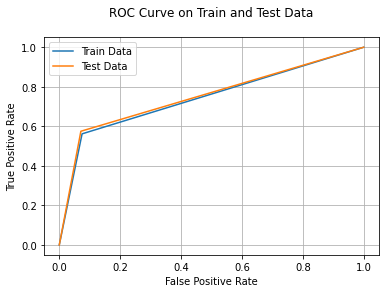

In [321]:
train_fpr_non_smote_normalized_ann2, train_tpr_non_smote_normalized_ann2, _ = roc_curve(y_train_non_smote_normalized_ann2, y_train_pred_non_smote_normalized_ann2)
test_fpr_non_smote_normalized_ann2, test_tpr_non_smote_normalized_ann2, _ = roc_curve(y_test_non_smote_normalized_ann2, y_test_pred_non_smote_normalized_ann2)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_ann2, y_train_pred_non_smote_normalized_ann2))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_ann2, y_test_pred_non_smote_normalized_ann2))

plt.plot(train_fpr_non_smote_normalized_ann2, train_tpr_non_smote_normalized_ann2, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_ann2, test_tpr_non_smote_normalized_ann2, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Test confusion matrix :


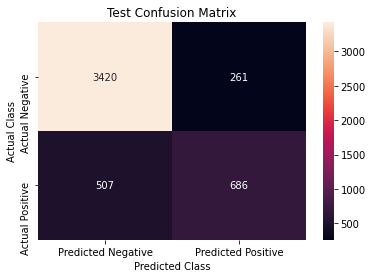

                 Predicted Negative  Predicted Positive
Actual Negative                3420                 261
Actual Positive                 507                 686


In [322]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_ann2 = confusion_matrix(y_test_non_smote_normalized_ann2, y_test_pred_non_smote_normalized_ann2)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_ann2_df = pd.DataFrame(cm_test_non_smote_normalized_ann2, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_ann2_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_ann2_df)

In [323]:
_, _, false_negative_non_smote_normalized_ann2, true_positive_non_smote_normalized_ann2 = cm_test_non_smote_normalized_ann2.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_ann2/(false_negative_non_smote_normalized_ann2+true_positive_non_smote_normalized_ann2)) * 100, "%")

False Negative Rate =  42.49790444258173 %


In [324]:
print(classification_report(y_test_non_smote_normalized_ann2, y_test_pred_non_smote_normalized_ann2))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3681
           1       0.72      0.58      0.64      1193

    accuracy                           0.84      4874
   macro avg       0.80      0.75      0.77      4874
weighted avg       0.84      0.84      0.84      4874



#                                   --------------------------End OF Final-Sem--------------------------

In [333]:
# dill_dump_session('17_all_models_trained')

In [ ]:
# dill_load_session('17_all_models_trained')